##  Hebrew NER using Bi-LSTM 

In [5]:
import pandas as pd
import numpy as np
from conlleval import evaluate

In [6]:
x = pd.read_csv('joint_corpus_with_pos_gazet.csv')

In [7]:
gazet_cols = ['is_in_gazet_loc', 'is_in_gazet_loc', 'is_in_gazet_loc', 
              'is_in_gazet_loc_fuzzy', 'is_in_gazet_org_fuzzy', 'is_in_gazet_per_fuzzy']
x['gazet_bits'] = np.packbits(x[gazet_cols], axis=-1).reshape(x.shape[0], )
x.head()

sent  WORD orig_form POS_CONC     NER corpus_form  is_in_gazet_loc  \
0     1     1      נראה       VB       O        נראה            False   
1     1     2    שאביטל  REL|NNP  I_PERS      שאביטל            False   
2     1     3   אברג'יל      NNP  I_PERS     אברג'יל            False   
3     1     4         (    yyLRB       O           (            False   
4     1     5     לשעבר       RB       O       לשעבר            False   

   is_in_gazet_org  is_in_gazet_per  is_in_gazet_loc_fuzzy  \
0            False            False                  False   
1            False            False                  False   
2            False            False                  False   
3            False            False                  False   
4            False            False                  False   

   is_in_gazet_org_fuzzy  is_in_gazet_per_fuzzy  gazet_bits  
0                  False                  False           0  
1                  False                   True           4  
2                  False                   True           4  
3                  False                  False           0  
4                  False                  False           0

In [8]:
sents = x.groupby('sent')[['corpus_form', 'POS_CONC', 'NER', 'gazet_bits']].apply(lambda x: x.values.tolist())
sents[:5]

sent
1    [[נראה, VB, O, 0], [שאביטל, REL|NNP, I_PERS, 4...
2    [[תורג'מן, NNP, I_PERS, 4], [,, yyCM, O, 0], [...
3    [[הפגישה, VB, O, 0], [המרגשת, DEF|JJ, O, 0], [...
4    [[בשלב, PREPOSITION|DEF|NN, O, 0], [מאוחר, RB,...
5    [[אברג'יל, NNP, I_PERS, 4], [,, yyCM, O, 0], [...
dtype: object

In [9]:
words = list(set(x["corpus_form"].values))
n_words = len(words); n_words

18755

In [10]:
tags = list(set(x["NER"].values))
n_tags = len(tags); n_tags

18

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

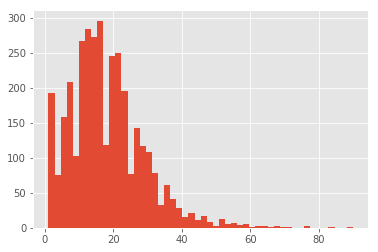

In [12]:
plt.hist([len(s) for s in list(sents)], bins=50)
plt.show()

In [13]:
max_len = 80
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [14]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sents]

C:\Users\dbare\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
X = pad_sequences(maxlen=max_len, sequences=X, value=word2idx["PAD"], padding='post', truncating='post')

In [16]:
X[1]

array([ 4979,  2215,  4771,  5566,  4580,  4122,  6135, 16836,  2434,
        5435,  2356,   259,  9609,  2215, 16557,  3801,  3121, 16867,
       13744, 15139,  9885, 10424,  9885, 17644,  2215,   342,  1011,
        3599,  9496, 13490, 17954,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0])

## Add features

### POS

In [17]:
pos = list(set(x["POS_CONC"].values))
n_pos = len(pos); n_pos

276

In [18]:
pos2idx = {w: i+1 for i, w in enumerate(pos)}
pos2idx["PAD"] = 0
X_pos = [[pos2idx[w[1]] for w in s] for s in sents]
X_pos = pad_sequences(maxlen=max_len, sequences=X_pos, value=pos2idx["PAD"], padding='post', truncating='post')
X_pos[0]

array([153, 271, 108, 142,   8, 108,  51, 117, 223,   8,   8, 153, 148,
       108, 108, 142, 256, 199, 122, 167, 199,  51, 117,  41,   8,  53,
        43,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])

### Dictionary

### Fuzzy Dictionary

In [19]:
np.array(x[gazet_cols].astype(int))

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [20]:
gaz = list(set(x["gazet_bits"].values))
n_gaz = len(gaz)
gaz2idx = {g: i+1 for i, g in enumerate(gaz)}
gaz2idx["PAD"] = 0
X_gaz = [[gaz2idx[w[3]] for w in s] for s in sents]
X_gaz = pad_sequences(maxlen=max_len, sequences=X_gaz, value=gaz2idx["PAD"], padding='post', truncating='post')
X_gaz[0]

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## True tags

In [21]:
y = [[tag2idx[w[2]] for w in s] for s in sents]
y_numer = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [22]:
y_numer[1]

array([18, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 18, 18, 14, 14, 17, 17,
       14, 14, 14, 14, 16, 14,  8, 14, 14, 14, 14, 18, 14, 14,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [23]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags+1) for i in y_numer]
y[1]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Perform train test splits

In [24]:
from sklearn.model_selection import train_test_split

splits = [train_test_split(X, y, X_pos, X_gaz, test_size=0.25, random_state=42+i) for i in range(3)]

## Bi-LSTM on words

In [25]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Flatten, Concatenate
from keras.layers.merge import concatenate

In [51]:
def plot_histories(histories):
    for h in histories:
        plt.figure(figsize=(12,12))
        plt.plot(h["acc"])
        plt.plot(h["val_acc"])
        plt.show()
        
def predict_test_sentence(splits, models, words, i, use_word=True, use_pos=True, use_gazet=True, use_char=False):
    for split, model in zip(splits, models):
        if use_char:
            split, char_split = split
            X_char_tr, X_char_te, _, _ = char_split
        X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = split
        params = []
        if use_word:
            params.append(np.array([X_te[i]]))
        if use_pos:
            params.append(np.array([pos_te[i]]))
        if use_gazet:
            params.append(np.array([gazet_te[i]]))
        if use_char:
            params.append(np.array([X_char_te[i]]))
        p = model.predict(params)
        p = np.argmax(p, axis=-1)
        t = np.argmax(y_te[i], axis=-1)
        print("{:15} ({:5}): {}".format("Word", "True", "Pred"))
        for w, pred, tr in zip(X_te[i], p[0], t):
            if idx2word[w]!="PAD":
                print("{:15} ({:5}): {}".format(idx2word[w], idx2tag[tr], idx2tag[pred]))
                
def predict_on_splits(splits, models, words, use_word=True, use_pos=True, use_gazet=True, use_char=False, predict_on_train=False):
    all_cat_preds = []
    all_cat_y_te = []
    all_words_flat = []
    for split, model in zip(splits, models):
        if use_char:
            split, char_split = split
            X_char_tr, X_char_te, _, _ = char_split
        X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = split
        
        if predict_on_train:
            X_te, y_te, pos_te, gazet_te = X_tr, y_tr, pos_tr, gazet_tr 
        params = []
        if use_word:
            params.append(np.array(X_te))
        if use_pos:
            params.append(np.array(pos_te))
        if use_gazet:
            params.append(np.array(gazet_te))
        if use_char:
            params.append(np.array(X_char_te))
        preds = model.predict(params)
        preds = np.argmax(preds, axis=-1)
        cat_preds = []
        cat_y_te = []
        words_flat = []
        y_te_num = np.argmax(y_te, axis=-1)
        for ws, s, t in zip(X_te, preds, y_te_num):
            for w, pred, tr in zip(ws, s, t):
                if idx2word[w]!="PAD":
                    words_flat.append(idx2word[w])
                    cat_preds.append(idx2tag[pred].replace('_', '-'))
                    cat_y_te.append(idx2tag[tr].replace('_', '-'))

        all_cat_preds.append(cat_preds)
        all_cat_y_te.append(cat_y_te)
        all_words_flat.append(words_flat)
        
    return (all_cat_preds, all_cat_y_te, all_words_flat)
    
def replace_pad_with_o(ll):
    new_ll = ['O' if label=='PAD' else label for label in ll]
    return new_ll

In [27]:
def create_models(splits, use_pos=True, use_gaz=True, embedding_matrix=None, 
                  embed_dim=70, trainable=True, input_dropout=False, stack_lstm=1, epochs=12,
                  stack_cross=False, stack_double=False, rec_dropout=0.1):
    models = []
    histories = []
    for X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te in splits:
        all_input_embeds = []
        all_inputs = []
        input = Input(shape=(max_len,))
        if embedding_matrix is not None:
            input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len, 
                                weights=[embedding_matrix], trainable=trainable)(input)
        else:
            input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len)(input)
        all_input_embeds.append(input_embed)
        all_inputs.append(input)
        train_data = [X_tr]
        if use_pos:
            pos_input = Input(shape=(max_len,))
            pos_embed = Embedding(input_dim=n_pos+1, output_dim=10, input_length=max_len)(pos_input)
            all_input_embeds.append(pos_embed)
            all_inputs.append(pos_input)
            train_data.append(pos_tr)
        if use_gaz:
            gaz_input = Input(shape=(max_len,))
            gaz_embed = Embedding(input_dim=n_gaz+1, output_dim=10, input_length=max_len)(gaz_input)
            all_input_embeds.append(gaz_embed)
            all_inputs.append(gaz_input)
            train_data.append(gazet_tr)
        if len(all_inputs)>1:
            model = Concatenate()(all_input_embeds)
        else: 
            model = input_embed
            all_input_embeds = input_embed
            all_inputs = input
            train_data = X_tr
        if input_dropout:
            model = Dropout(0.1)(model)
        if stack_double:
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(model)
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(front)
            back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(model)
            model = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(back)
        if stack_cross:
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(model)
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(front)
            back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(model)
            back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(back)
            model = concatenate([back, front])
        for i in range(stack_lstm):
            model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout))(model)
        
        out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer
        model = Model(all_inputs, out)
        model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
        history = model.fit(train_data, np.array(y_tr), batch_size=32, epochs=epochs, 
                            validation_split=0.1, verbose=1)
        models.append(model)
        hist = pd.DataFrame(history.history)
        histories.append(hist)
        
    return models, histories


In [112]:
models, histories = create_models(splits, use_pos=False, use_gaz=False, embed_dim=70)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 29s 12ms/step - loss: 0.3889 - acc: 0.9189 - val_loss: 0.1816 - val_acc: 0.9645
Epoch 2/12
2349/2349 [==============================] - 18s 7ms/step - loss: 0.1528 - acc: 0.9688 - val_loss: 0.1520 - val_acc: 0.9661
Epoch 3/12
2349/2349 [==============================] - 18s 8ms/step - loss: 0.1224 - acc: 0.9697 - val_loss: 0.1250 - val_acc: 0.9678
Epoch 4/12
2349/2349 [==============================] - 18s 8ms/step - loss: 0.0955 - acc: 0.9726 - val_loss: 0.1107 - val_acc: 0.9715
Epoch 5/12
2349/2349 [==============================] - 20s 8ms/step - loss: 0.0774 - acc: 0.9764 - val_loss: 0.1051 - val_acc: 0.9739
Epoch 6/12
2349/2349 [==============================] - 17s 7ms/step - loss: 0.0648 - acc: 0.9802 - val_loss: 0.1028 - val_acc: 0.9746
Epoch 7/12
2349/2349 [==============================] - 20s 9ms/step - loss: 0.0536 - acc: 0.9845 - val_loss: 0.0964 - val_acc: 0.9776
Epoch 8

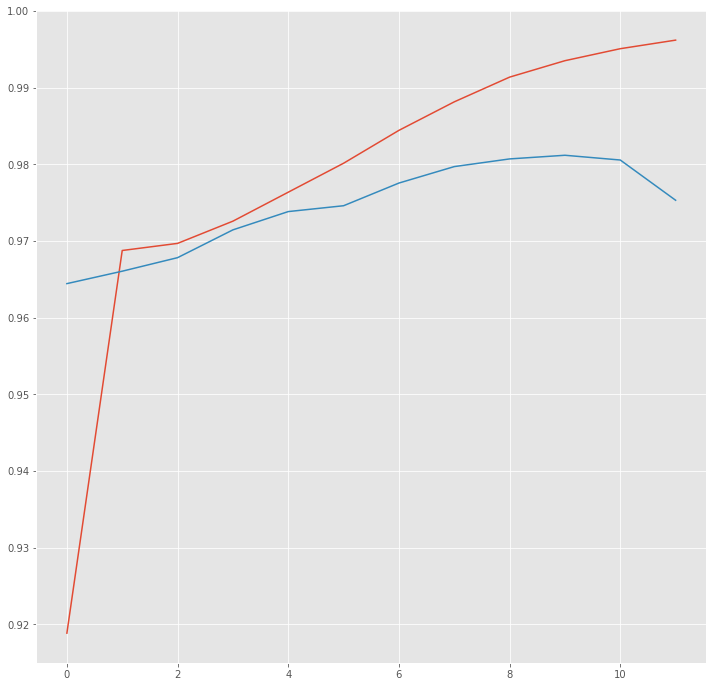

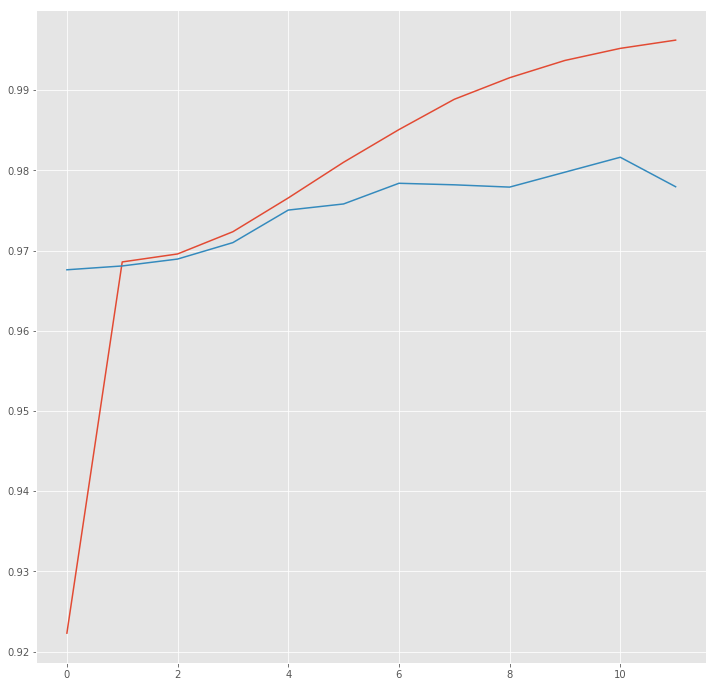

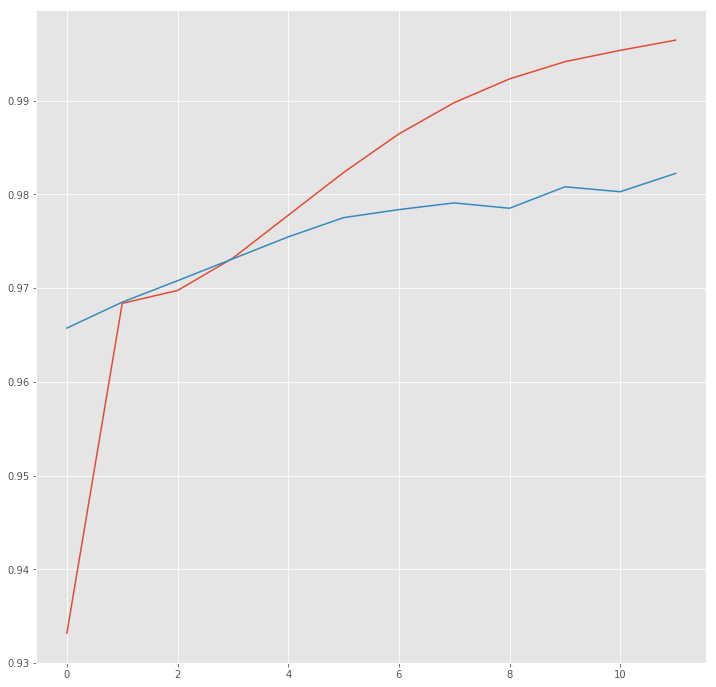

In [113]:
plot_histories(histories)

In [114]:
predict_test_sentence(splits, models, words, 33, use_pos=False, use_gazet=False)

Word            (True ): Pred
הדולר           (I_MONEY): I_MISC__AFF
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): I_ORG
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ):

In [115]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words, use_pos=False, use_gazet=False)

In [117]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1402 phrases; correct: 602.
accuracy:  58.19%; (non-O)
accuracy:  90.42%; precision:  42.94%; recall:  46.96%; FB1:  44.86
             DATE: precision:  15.35%; recall:  32.35%; FB1:  20.82  215
              LOC: precision:  55.78%; recall:  47.46%; FB1:  51.28  251
        MISC--AFF: precision:  61.80%; recall:  65.87%; FB1:  63.77  178
        MISC--ENT: precision:   2.08%; recall:  14.29%; FB1:   3.64  96
       MISC-EVENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  18
            MONEY: precision:  72.50%; recall:  61.70%; FB1:  66.67  40
              ORG: precision:  34.97%; recall:  39.37%; FB1:  37.04  286
          PERCENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  1
             PERS: precision:  59.31%; recall:  57.14%; FB1:  58.20  317
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 15256 tokens with 1282 phrases; found: 1321 phrases; correct: 628.
accuracy:  58.92%; (non-O)
a

## LSTM + POS

In [118]:
models, histories = create_models(splits, use_pos=True, use_gaz=False, embed_dim=70)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 19s 8ms/step - loss: 0.3763 - acc: 0.9220 - val_loss: 0.1789 - val_acc: 0.9655
Epoch 2/12
2349/2349 [==============================] - 14s 6ms/step - loss: 0.1501 - acc: 0.9689 - val_loss: 0.1445 - val_acc: 0.9661
Epoch 3/12
2349/2349 [==============================] - 15s 6ms/step - loss: 0.1120 - acc: 0.9705 - val_loss: 0.1095 - val_acc: 0.9703
Epoch 4/12
2349/2349 [==============================] - 14s 6ms/step - loss: 0.0839 - acc: 0.9759 - val_loss: 0.0965 - val_acc: 0.9743
Epoch 5/12
2349/2349 [==============================] - 14s 6ms/step - loss: 0.0676 - acc: 0.9801 - val_loss: 0.0902 - val_acc: 0.9762
Epoch 6/12
2349/2349 [==============================] - 15s 6ms/step - loss: 0.0542 - acc: 0.9844 - val_loss: 0.0826 - val_acc: 0.9794
Epoch 7/12
2349/2349 [==============================] - 15s 6ms/step - loss: 0.0424 - acc: 0.9885 - val_loss: 0.0795 - val_acc: 0.9804
Epoch 8/

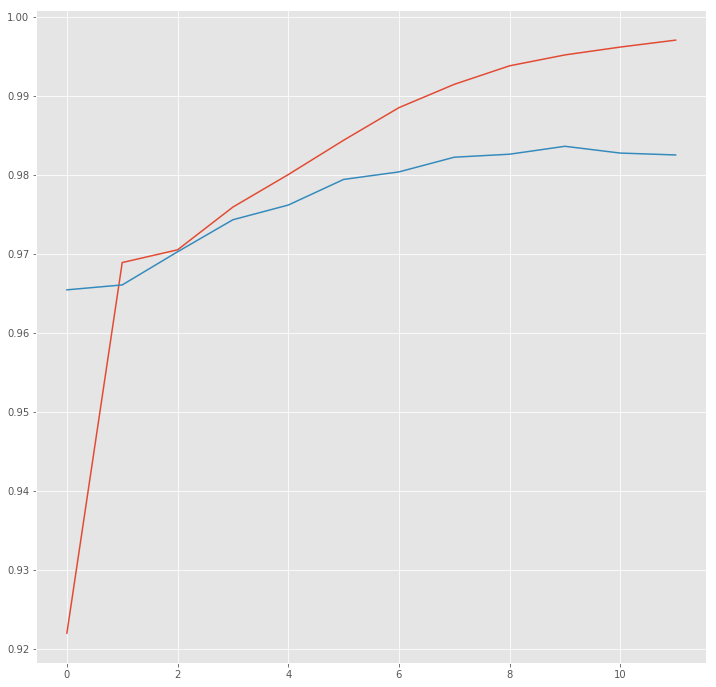

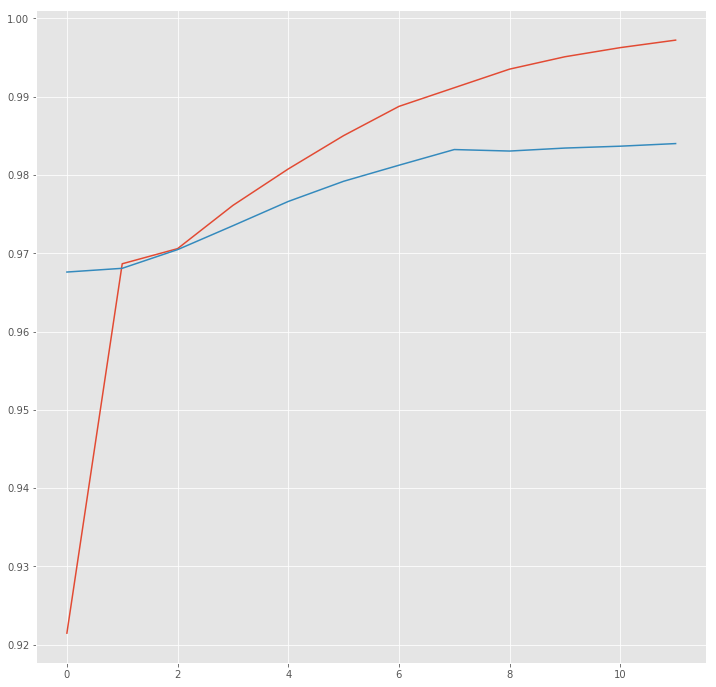

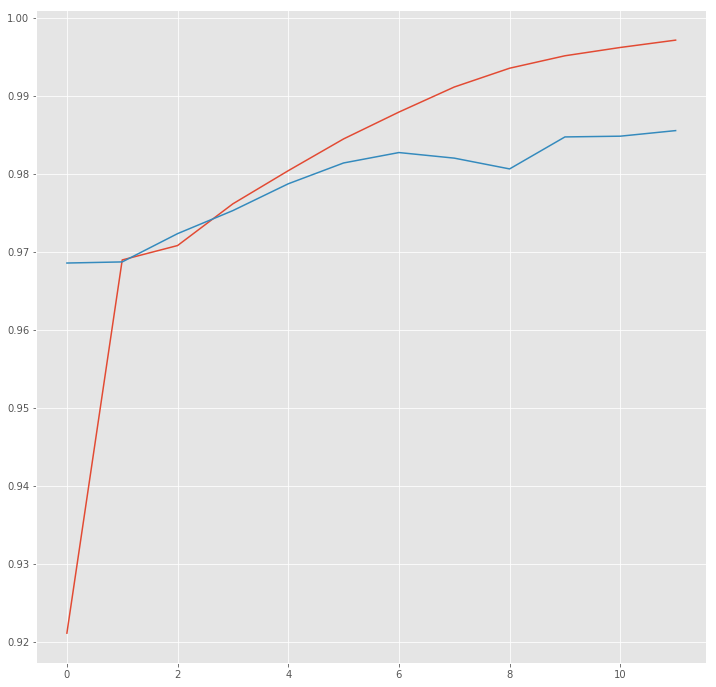

In [119]:
plot_histories(histories)

In [120]:
predict_test_sentence(splits, models, words, 33, use_pos=True, use_gazet=False)

Word            (True ): Pred
הדולר           (I_MONEY): I_PERS
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [121]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words, use_pos=True, use_gazet=False)

In [122]:
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1324 phrases; correct: 726.
accuracy:  65.65%; (non-O)
accuracy:  93.48%; precision:  54.83%; recall:  56.63%; FB1:  55.72
             DATE: precision:  54.26%; recall:  50.00%; FB1:  52.04  94
              LOC: precision:  54.33%; recall:  55.25%; FB1:  54.79  300
        MISC--AFF: precision:  72.03%; recall:  61.68%; FB1:  66.45  143
        MISC--ENT: precision:  11.11%; recall:   7.14%; FB1:   8.70  9
       MISC-EVENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
            MONEY: precision:  70.45%; recall:  65.96%; FB1:  68.13  44
              ORG: precision:  32.44%; recall:  47.64%; FB1:  38.60  373
          PERCENT: precision:  62.26%; recall:  61.11%; FB1:  61.68  53
             PERS: precision:  72.40%; recall:  67.78%; FB1:  70.02  308
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 15256 tokens with 1282 phrases; found: 1293 phrases; correct: 733.
accuracy:  63.56%; (non-O)
acc

## Bi-LSTM + POS + Gazetteer

In [50]:
models, histories = create_models(splits, use_pos=True, use_gaz=True, embed_dim=70)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 17s 7ms/step - loss: 0.3702 - acc: 0.9230 - val_loss: 0.1759 - val_acc: 0.9659
Epoch 2/12
2349/2349 [==============================] - 14s 6ms/step - loss: 0.1436 - acc: 0.9692 - val_loss: 0.1297 - val_acc: 0.9670
Epoch 3/12
2349/2349 [==============================] - 13s 6ms/step - loss: 0.0988 - acc: 0.9729 - val_loss: 0.1014 - val_acc: 0.9728
Epoch 4/12
2349/2349 [==============================] - 14s 6ms/step - loss: 0.0753 - acc: 0.9783 - val_loss: 0.0892 - val_acc: 0.9762
Epoch 5/12
2349/2349 [==============================] - 14s 6ms/step - loss: 0.0603 - acc: 0.9830 - val_loss: 0.0827 - val_acc: 0.9792
Epoch 6/12
2349/2349 [==============================] - 13s 5ms/step - loss: 0.0471 - acc: 0.9870 - val_loss: 0.0735 - val_acc: 0.9823
Epoch 7/12
2349/2349 [==============================] - 13s 5ms/step - loss: 0.0366 - acc: 0.9905 - val_loss: 0.0723 - val_acc: 0.9827
Epoch 8/

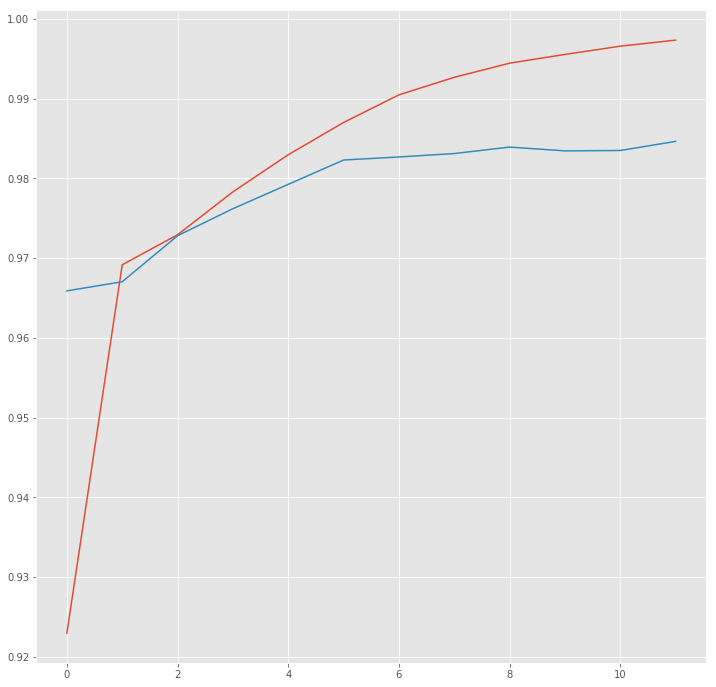

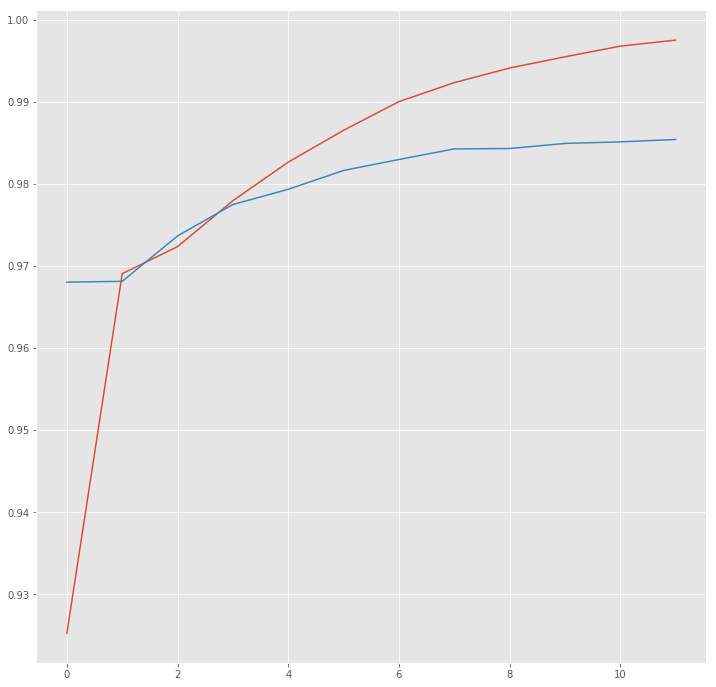

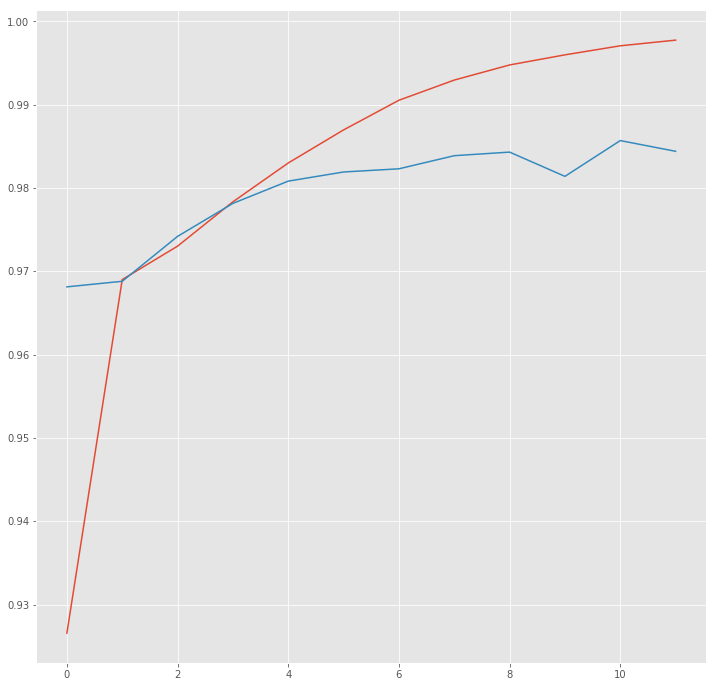

In [51]:
plot_histories(histories)

In [52]:
predict_test_sentence(splits, models, words, 33)

Word            (True ): Pred
הדולר           (I_MONEY): I_PERS
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [53]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words)

In [54]:
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1164 phrases; correct: 706.
accuracy:  62.00%; (non-O)
accuracy:  94.18%; precision:  60.65%; recall:  55.07%; FB1:  57.73
             DATE: precision:  59.15%; recall:  41.18%; FB1:  48.55  71
              LOC: precision:  62.06%; recall:  59.32%; FB1:  60.66  282
        MISC--AFF: precision:  82.03%; recall:  62.87%; FB1:  71.19  128
        MISC--ENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  12
       MISC-EVENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  12
            MONEY: precision:  51.16%; recall:  46.81%; FB1:  48.89  43
              ORG: precision:  42.61%; recall:  48.82%; FB1:  45.50  291
          PERCENT: precision:  59.32%; recall:  64.81%; FB1:  61.95  59
             PERS: precision:  76.32%; recall:  61.70%; FB1:  68.24  266
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 15256 tokens with 1282 phrases; found: 1235 phrases; correct: 762.
accuracy:  64.74%; (non-O)
a

## Bi-LSTM on Words + fastText

In [28]:
!ls '../../fasttext/'

wiki.he.vec


In [29]:
#load embeddings
print('loading word embeddings...')
embeddings_index = {}
with open('../../fasttext/wiki.he.vec', encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 488937 word vectors


In [30]:
MAX_NB_WORDS = 100000
embed_dim = 300

In [31]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word2idx))
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word2idx.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 1721


In [32]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['הבסט' 'שמועמדם' '2004/5' 'סנ"א' '1959' '770' 'ראפידיה' 'ובוזזי'
 'ושערבים' 'מהישראליות']


In [ ]:
models, histories = create_models(splits, use_pos=False, use_gaz=False, embedding_matrix=embedding_matrix, 
                                  embed_dim=embed_dim)

In [ ]:
plot_histories(histories)

In [ ]:
predict_test_sentence(splits, models, words, 33, use_pos=False, use_gazet=False)

In [ ]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words, use_pos=False, use_gazet=False)

In [ ]:
from collections import Counter
[Counter(cat_preds) for cat_preds in all_cat_preds]

In [ ]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]
Counter(all_cat_preds[0])

In [ ]:
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

In [ ]:
from seqeval.metrics import classification_report
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    print(classification_report(cat_y_te, cat_preds))

## Bi-LSTM + POS + fastText

In [102]:
models, histories = create_models(splits, use_pos=True, use_gaz=False, embedding_matrix=embedding_matrix, 
                                  embed_dim=embed_dim)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 33s 14ms/step - loss: 0.2861 - acc: 0.9500 - val_loss: 0.0977 - val_acc: 0.9742
Epoch 2/12
2349/2349 [==============================] - 34s 14ms/step - loss: 0.0646 - acc: 0.9821 - val_loss: 0.0622 - val_acc: 0.9841
Epoch 3/12
2349/2349 [==============================] - 26s 11ms/step - loss: 0.0391 - acc: 0.9890 - val_loss: 0.0465 - val_acc: 0.9874
Epoch 4/12
2349/2349 [==============================] - 29s 12ms/step - loss: 0.0273 - acc: 0.9920 - val_loss: 0.0455 - val_acc: 0.9877
Epoch 5/12
2349/2349 [==============================] - 34s 15ms/step - loss: 0.0195 - acc: 0.9944 - val_loss: 0.0390 - val_acc: 0.9893
Epoch 6/12
2349/2349 [==============================] - 30s 13ms/step - loss: 0.0138 - acc: 0.9960 - val_loss: 0.0398 - val_acc: 0.9899
Epoch 7/12
2349/2349 [==============================] - 30s 13ms/step - loss: 0.0094 - acc: 0.9974 - val_loss: 0.0388 - val_acc: 0.9885
E

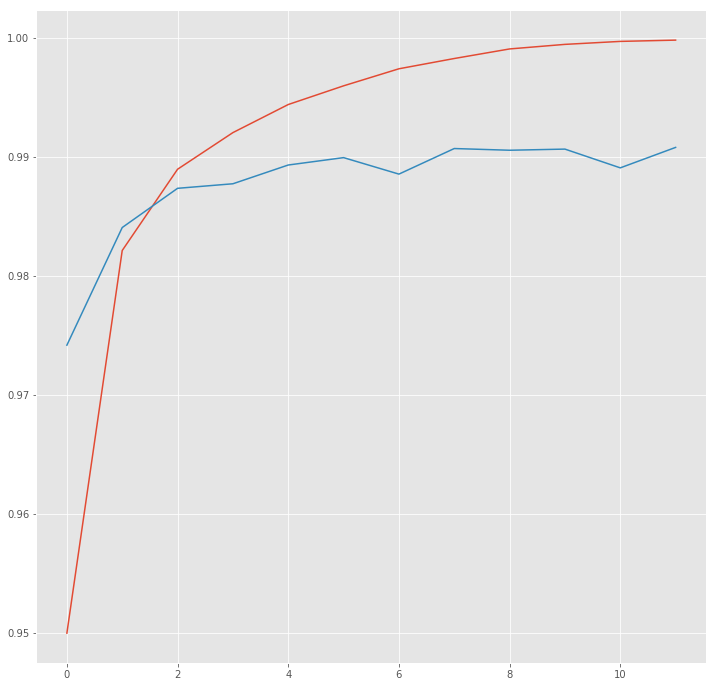

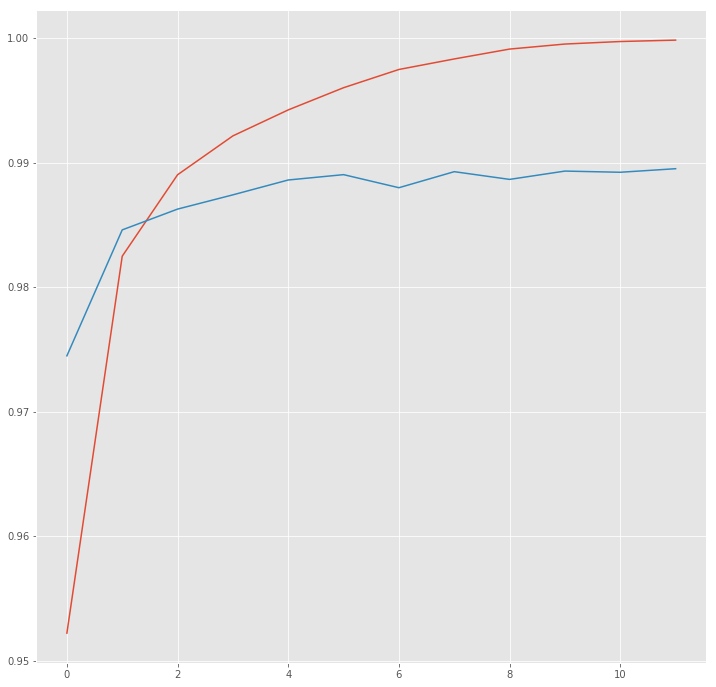

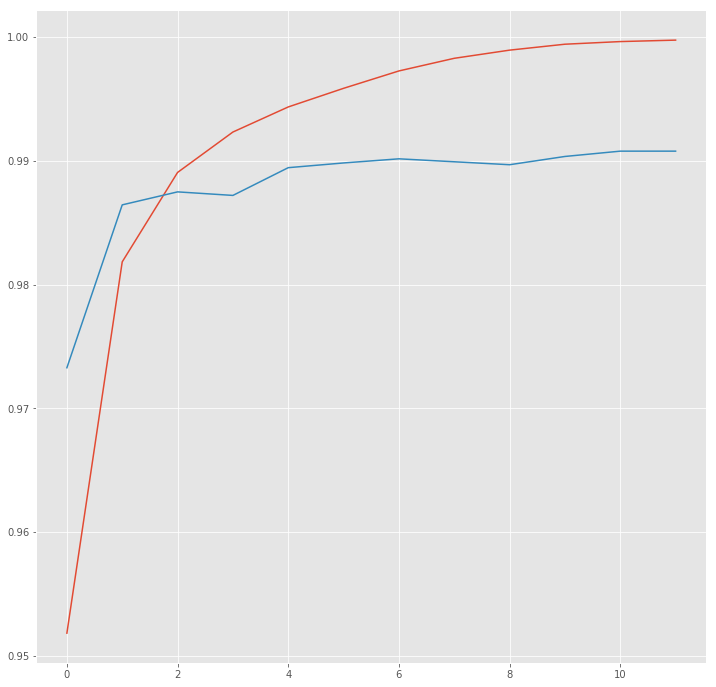

In [103]:
plot_histories(histories)

In [104]:
predict_test_sentence(splits, models, words, 33, use_gazet=False)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [105]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words, use_gazet=False)

In [106]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1280 phrases; correct: 933.
accuracy:  80.64%; (non-O)
accuracy:  96.54%; precision:  72.89%; recall:  72.78%; FB1:  72.83
             DATE: precision:  62.00%; recall:  60.78%; FB1:  61.39  100
              LOC: precision:  72.61%; recall:  74.58%; FB1:  73.58  303
        MISC--AFF: precision:  88.27%; recall:  85.63%; FB1:  86.93  162
        MISC--ENT: precision:  28.57%; recall:  28.57%; FB1:  28.57  14
       MISC-EVENT: precision:  45.45%; recall:  55.56%; FB1:  50.00  11
            MONEY: precision:  84.91%; recall:  95.74%; FB1:  90.00  53
              ORG: precision:  60.66%; recall:  58.27%; FB1:  59.44  244
          PERCENT: precision:  91.49%; recall:  79.63%; FB1:  85.15  47
             PERS: precision:  77.51%; recall:  79.64%; FB1:  78.56  338
             TIME: precision:  12.50%; recall:   9.09%; FB1:  10.53  8
processed 15256 tokens with 1282 phrases; found: 1414 phrases; correct: 950.
accuracy:  83.51%; (non-O)


## Bi-LSTM + POS + Gazetteer + fastText

In [107]:
models, histories = create_models(splits, use_pos=True, use_gaz=True, embedding_matrix=embedding_matrix, 
                                  embed_dim=embed_dim)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 48s 21ms/step - loss: 0.2782 - acc: 0.9607 - val_loss: 0.1025 - val_acc: 0.9773
Epoch 2/12
2349/2349 [==============================] - 40s 17ms/step - loss: 0.0630 - acc: 0.9826 - val_loss: 0.0607 - val_acc: 0.9835
Epoch 3/12
2349/2349 [==============================] - 35s 15ms/step - loss: 0.0383 - acc: 0.9892 - val_loss: 0.0504 - val_acc: 0.9856
Epoch 4/12
2349/2349 [==============================] - 34s 14ms/step - loss: 0.0272 - acc: 0.9921 - val_loss: 0.0439 - val_acc: 0.9874
Epoch 5/12
2349/2349 [==============================] - 34s 14ms/step - loss: 0.0199 - acc: 0.9942 - val_loss: 0.0395 - val_acc: 0.9895
Epoch 6/12
2349/2349 [==============================] - 33s 14ms/step - loss: 0.0139 - acc: 0.9959 - val_loss: 0.0382 - val_acc: 0.9899
Epoch 7/12
2349/2349 [==============================] - 40s 17ms/step - loss: 0.0096 - acc: 0.9972 - val_loss: 0.0406 - val_acc: 0.9881
E

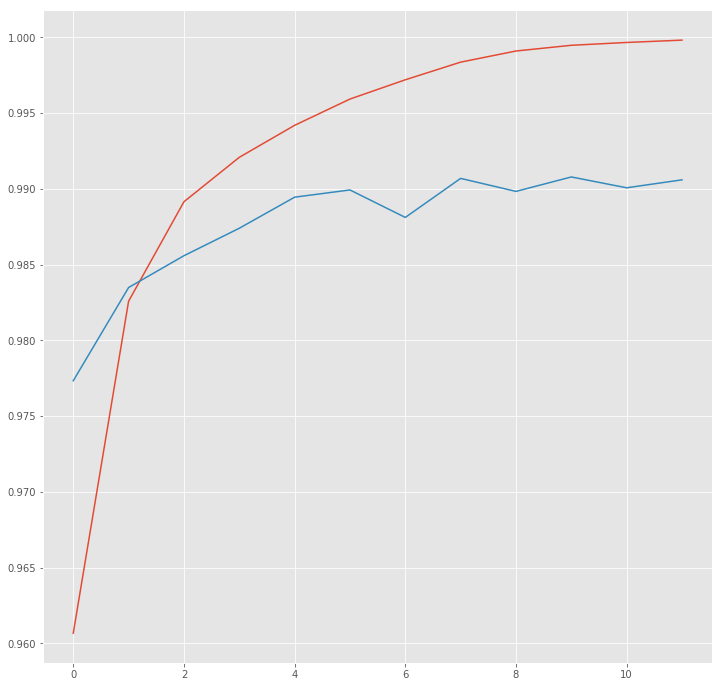

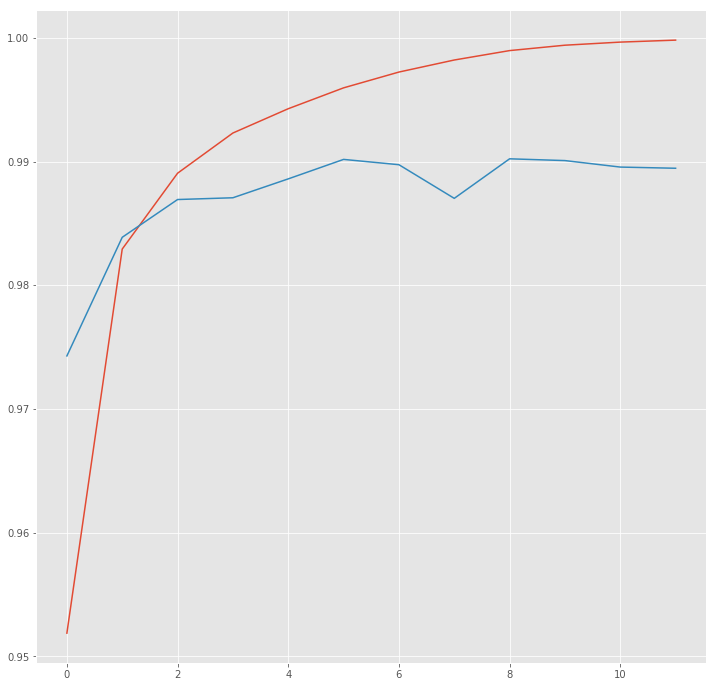

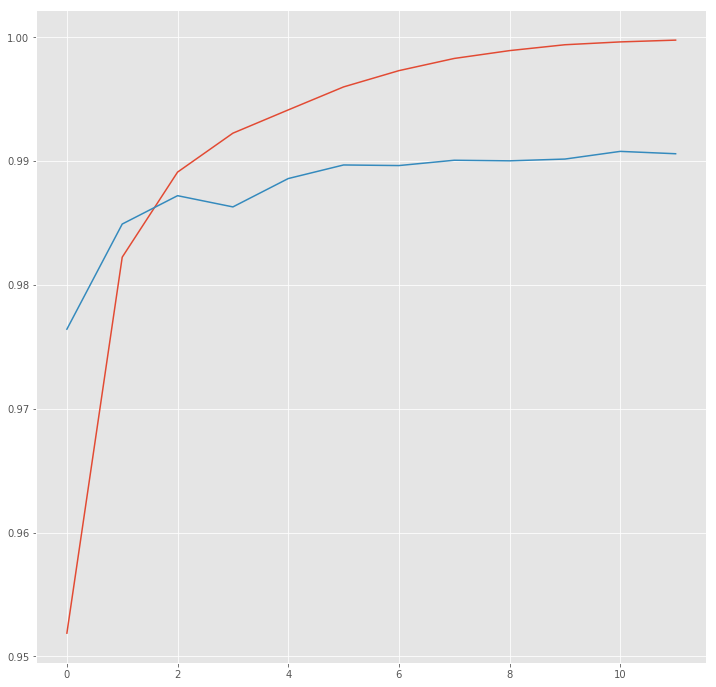

In [108]:
plot_histories(histories)

In [109]:
predict_test_sentence(splits, models, words, 33)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [110]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words)

In [111]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1211 phrases; correct: 919.
accuracy:  77.60%; (non-O)
accuracy:  96.58%; precision:  75.89%; recall:  71.68%; FB1:  73.73
             DATE: precision:  69.57%; recall:  62.75%; FB1:  65.98  92
              LOC: precision:  77.17%; recall:  72.20%; FB1:  74.61  276
        MISC--AFF: precision:  88.34%; recall:  86.23%; FB1:  87.27  163
        MISC--ENT: precision:  71.43%; recall:  35.71%; FB1:  47.62  7
       MISC-EVENT: precision:  50.00%; recall:  66.67%; FB1:  57.14  12
            MONEY: precision:  80.00%; recall:  85.11%; FB1:  82.47  50
              ORG: precision:  60.73%; recall:  59.06%; FB1:  59.88  247
          PERCENT: precision:  92.11%; recall:  64.81%; FB1:  76.09  38
             PERS: precision:  81.31%; recall:  79.33%; FB1:  80.31  321
             TIME: precision:  20.00%; recall:   9.09%; FB1:  12.50  5
processed 15256 tokens with 1282 phrases; found: 1196 phrases; correct: 886.
accuracy:  75.46%; (non-O)
ac

## Stacked

In [135]:
models, histories = create_models(splits, use_pos=True, use_gaz=False, embedding_matrix=embedding_matrix, 
                                  embed_dim=embed_dim, stack_lstm=1, stack_cross=True, epochs=20, 
                                  rec_dropout=0.35)

Train on 2349 samples, validate on 262 samples
Epoch 1/20
2349/2349 [==============================] - ETA: 18:37 - loss: 2.9456 - acc: 0.03 - ETA: 10:15 - loss: 2.8124 - acc: 0.47 - ETA: 7:27 - loss: 2.4129 - acc: 0.6267 - ETA: 6:01 - loss: 1.9662 - acc: 0.668 - ETA: 5:09 - loss: 1.9591 - acc: 0.576 - ETA: 4:34 - loss: 1.7116 - acc: 0.619 - ETA: 4:08 - loss: 1.5280 - acc: 0.657 - ETA: 3:49 - loss: 1.3752 - acc: 0.694 - ETA: 3:33 - loss: 1.2547 - acc: 0.723 - ETA: 3:20 - loss: 1.1564 - acc: 0.746 - ETA: 3:09 - loss: 1.0726 - acc: 0.765 - ETA: 3:00 - loss: 1.0009 - acc: 0.780 - ETA: 2:52 - loss: 0.9422 - acc: 0.794 - ETA: 2:44 - loss: 0.8933 - acc: 0.805 - ETA: 2:38 - loss: 0.8497 - acc: 0.815 - ETA: 2:32 - loss: 0.8120 - acc: 0.824 - ETA: 2:26 - loss: 0.7754 - acc: 0.832 - ETA: 2:21 - loss: 0.7454 - acc: 0.838 - ETA: 2:17 - loss: 0.7179 - acc: 0.844 - ETA: 2:13 - loss: 0.6942 - acc: 0.848 - ETA: 2:08 - loss: 0.6699 - acc: 0.853 - ETA: 2:04 - loss: 0.6500 - acc: 0.858 - ETA: 2:01 - loss

2349/2349 [==============================] - ETA: 2:12 - loss: 0.1404 - acc: 0.960 - ETA: 2:11 - loss: 0.1231 - acc: 0.966 - ETA: 2:09 - loss: 0.1153 - acc: 0.968 - ETA: 2:07 - loss: 0.1122 - acc: 0.969 - ETA: 2:06 - loss: 0.1144 - acc: 0.967 - ETA: 2:04 - loss: 0.1139 - acc: 0.968 - ETA: 2:02 - loss: 0.1113 - acc: 0.969 - ETA: 1:59 - loss: 0.1103 - acc: 0.969 - ETA: 1:58 - loss: 0.1099 - acc: 0.970 - ETA: 1:55 - loss: 0.1058 - acc: 0.971 - ETA: 1:52 - loss: 0.1080 - acc: 0.970 - ETA: 1:50 - loss: 0.1048 - acc: 0.971 - ETA: 1:47 - loss: 0.1060 - acc: 0.971 - ETA: 1:45 - loss: 0.1067 - acc: 0.971 - ETA: 1:43 - loss: 0.1088 - acc: 0.970 - ETA: 1:41 - loss: 0.1068 - acc: 0.971 - ETA: 1:39 - loss: 0.1049 - acc: 0.972 - ETA: 1:37 - loss: 0.1049 - acc: 0.971 - ETA: 1:35 - loss: 0.1065 - acc: 0.971 - ETA: 1:33 - loss: 0.1079 - acc: 0.971 - ETA: 1:31 - loss: 0.1068 - acc: 0.971 - ETA: 1:29 - loss: 0.1067 - acc: 0.971 - ETA: 1:27 - loss: 0.1047 - acc: 0.971 - ETA: 1:25 - loss: 0.1054 - acc: 0.9

2349/2349 [==============================] - ETA: 2:07 - loss: 0.0341 - acc: 0.988 - ETA: 2:06 - loss: 0.0344 - acc: 0.990 - ETA: 2:05 - loss: 0.0342 - acc: 0.990 - ETA: 2:03 - loss: 0.0341 - acc: 0.990 - ETA: 2:00 - loss: 0.0374 - acc: 0.989 - ETA: 1:58 - loss: 0.0402 - acc: 0.988 - ETA: 1:56 - loss: 0.0467 - acc: 0.986 - ETA: 1:54 - loss: 0.0477 - acc: 0.986 - ETA: 1:52 - loss: 0.0481 - acc: 0.986 - ETA: 1:50 - loss: 0.0476 - acc: 0.986 - ETA: 1:48 - loss: 0.0473 - acc: 0.986 - ETA: 1:47 - loss: 0.0457 - acc: 0.986 - ETA: 1:45 - loss: 0.0461 - acc: 0.986 - ETA: 1:44 - loss: 0.0455 - acc: 0.986 - ETA: 1:43 - loss: 0.0465 - acc: 0.986 - ETA: 1:41 - loss: 0.0458 - acc: 0.986 - ETA: 1:39 - loss: 0.0454 - acc: 0.987 - ETA: 1:37 - loss: 0.0464 - acc: 0.986 - ETA: 1:35 - loss: 0.0479 - acc: 0.986 - ETA: 1:33 - loss: 0.0485 - acc: 0.986 - ETA: 1:31 - loss: 0.0475 - acc: 0.986 - ETA: 1:29 - loss: 0.0468 - acc: 0.986 - ETA: 1:27 - loss: 0.0470 - acc: 0.986 - ETA: 1:25 - loss: 0.0464 - acc: 0.9

2349/2349 [==============================] - ETA: 2:00 - loss: 0.0287 - acc: 0.990 - ETA: 1:58 - loss: 0.0253 - acc: 0.992 - ETA: 1:56 - loss: 0.0234 - acc: 0.992 - ETA: 1:54 - loss: 0.0240 - acc: 0.993 - ETA: 1:53 - loss: 0.0259 - acc: 0.992 - ETA: 1:51 - loss: 0.0270 - acc: 0.991 - ETA: 1:50 - loss: 0.0265 - acc: 0.991 - ETA: 1:48 - loss: 0.0260 - acc: 0.992 - ETA: 1:46 - loss: 0.0250 - acc: 0.992 - ETA: 1:45 - loss: 0.0252 - acc: 0.992 - ETA: 1:43 - loss: 0.0251 - acc: 0.992 - ETA: 1:41 - loss: 0.0246 - acc: 0.992 - ETA: 1:39 - loss: 0.0236 - acc: 0.992 - ETA: 1:38 - loss: 0.0241 - acc: 0.992 - ETA: 1:36 - loss: 0.0237 - acc: 0.992 - ETA: 1:35 - loss: 0.0233 - acc: 0.992 - ETA: 1:33 - loss: 0.0232 - acc: 0.992 - ETA: 1:31 - loss: 0.0225 - acc: 0.993 - ETA: 1:30 - loss: 0.0234 - acc: 0.992 - ETA: 1:28 - loss: 0.0229 - acc: 0.993 - ETA: 1:26 - loss: 0.0233 - acc: 0.992 - ETA: 1:25 - loss: 0.0235 - acc: 0.992 - ETA: 1:23 - loss: 0.0244 - acc: 0.992 - ETA: 1:21 - loss: 0.0244 - acc: 0.9

2349/2349 [==============================] - ETA: 2:07 - loss: 0.0210 - acc: 0.993 - ETA: 2:03 - loss: 0.0171 - acc: 0.994 - ETA: 2:01 - loss: 0.0152 - acc: 0.995 - ETA: 1:59 - loss: 0.0150 - acc: 0.995 - ETA: 1:57 - loss: 0.0146 - acc: 0.995 - ETA: 1:55 - loss: 0.0143 - acc: 0.995 - ETA: 1:53 - loss: 0.0132 - acc: 0.995 - ETA: 1:51 - loss: 0.0130 - acc: 0.995 - ETA: 1:49 - loss: 0.0142 - acc: 0.995 - ETA: 1:47 - loss: 0.0139 - acc: 0.995 - ETA: 1:45 - loss: 0.0134 - acc: 0.995 - ETA: 1:43 - loss: 0.0134 - acc: 0.996 - ETA: 1:42 - loss: 0.0138 - acc: 0.995 - ETA: 1:40 - loss: 0.0140 - acc: 0.995 - ETA: 1:38 - loss: 0.0136 - acc: 0.995 - ETA: 1:36 - loss: 0.0132 - acc: 0.996 - ETA: 1:34 - loss: 0.0128 - acc: 0.996 - ETA: 1:33 - loss: 0.0127 - acc: 0.996 - ETA: 1:31 - loss: 0.0126 - acc: 0.996 - ETA: 1:29 - loss: 0.0126 - acc: 0.996 - ETA: 1:27 - loss: 0.0124 - acc: 0.996 - ETA: 1:26 - loss: 0.0122 - acc: 0.996 - ETA: 1:24 - loss: 0.0121 - acc: 0.996 - ETA: 1:22 - loss: 0.0120 - acc: 0.9

2349/2349 [==============================] - ETA: 2:03 - loss: 0.0113 - acc: 0.996 - ETA: 2:04 - loss: 0.0101 - acc: 0.996 - ETA: 2:03 - loss: 0.0077 - acc: 0.997 - ETA: 2:02 - loss: 0.0073 - acc: 0.997 - ETA: 2:01 - loss: 0.0068 - acc: 0.998 - ETA: 1:59 - loss: 0.0064 - acc: 0.998 - ETA: 1:57 - loss: 0.0062 - acc: 0.998 - ETA: 1:54 - loss: 0.0059 - acc: 0.998 - ETA: 1:52 - loss: 0.0059 - acc: 0.998 - ETA: 1:50 - loss: 0.0058 - acc: 0.998 - ETA: 1:47 - loss: 0.0056 - acc: 0.998 - ETA: 1:45 - loss: 0.0057 - acc: 0.998 - ETA: 1:43 - loss: 0.0057 - acc: 0.998 - ETA: 1:41 - loss: 0.0055 - acc: 0.998 - ETA: 1:40 - loss: 0.0057 - acc: 0.998 - ETA: 1:38 - loss: 0.0063 - acc: 0.998 - ETA: 1:36 - loss: 0.0063 - acc: 0.998 - ETA: 1:34 - loss: 0.0062 - acc: 0.998 - ETA: 1:32 - loss: 0.0061 - acc: 0.998 - ETA: 1:31 - loss: 0.0061 - acc: 0.998 - ETA: 1:29 - loss: 0.0065 - acc: 0.998 - ETA: 1:27 - loss: 0.0066 - acc: 0.998 - ETA: 1:25 - loss: 0.0066 - acc: 0.998 - ETA: 1:23 - loss: 0.0069 - acc: 0.9

2349/2349 [==============================] - ETA: 1:58 - loss: 0.0036 - acc: 0.999 - ETA: 1:57 - loss: 0.0027 - acc: 0.999 - ETA: 1:55 - loss: 0.0026 - acc: 0.999 - ETA: 1:54 - loss: 0.0025 - acc: 0.999 - ETA: 1:53 - loss: 0.0024 - acc: 0.999 - ETA: 1:51 - loss: 0.0029 - acc: 0.999 - ETA: 1:49 - loss: 0.0028 - acc: 0.999 - ETA: 1:48 - loss: 0.0036 - acc: 0.998 - ETA: 1:46 - loss: 0.0034 - acc: 0.999 - ETA: 1:44 - loss: 0.0035 - acc: 0.998 - ETA: 1:43 - loss: 0.0034 - acc: 0.999 - ETA: 1:41 - loss: 0.0032 - acc: 0.999 - ETA: 1:39 - loss: 0.0032 - acc: 0.999 - ETA: 1:38 - loss: 0.0032 - acc: 0.999 - ETA: 1:37 - loss: 0.0034 - acc: 0.999 - ETA: 1:36 - loss: 0.0033 - acc: 0.999 - ETA: 1:34 - loss: 0.0033 - acc: 0.999 - ETA: 1:33 - loss: 0.0034 - acc: 0.999 - ETA: 1:31 - loss: 0.0034 - acc: 0.999 - ETA: 1:30 - loss: 0.0036 - acc: 0.999 - ETA: 1:28 - loss: 0.0035 - acc: 0.999 - ETA: 1:27 - loss: 0.0035 - acc: 0.999 - ETA: 1:25 - loss: 0.0037 - acc: 0.999 - ETA: 1:24 - loss: 0.0037 - acc: 0.9

2349/2349 [==============================] - ETA: 2:28 - loss: 0.0032 - acc: 0.998 - ETA: 2:24 - loss: 0.0027 - acc: 0.999 - ETA: 2:22 - loss: 0.0031 - acc: 0.999 - ETA: 2:19 - loss: 0.0028 - acc: 0.999 - ETA: 2:17 - loss: 0.0024 - acc: 0.999 - ETA: 2:14 - loss: 0.0025 - acc: 0.999 - ETA: 2:12 - loss: 0.0023 - acc: 0.999 - ETA: 2:10 - loss: 0.0021 - acc: 0.999 - ETA: 2:08 - loss: 0.0024 - acc: 0.999 - ETA: 2:06 - loss: 0.0022 - acc: 0.999 - ETA: 2:04 - loss: 0.0021 - acc: 0.999 - ETA: 2:03 - loss: 0.0023 - acc: 0.999 - ETA: 2:01 - loss: 0.0022 - acc: 0.999 - ETA: 1:59 - loss: 0.0021 - acc: 0.999 - ETA: 1:57 - loss: 0.0020 - acc: 0.999 - ETA: 1:55 - loss: 0.0020 - acc: 0.999 - ETA: 1:53 - loss: 0.0021 - acc: 0.999 - ETA: 1:52 - loss: 0.0022 - acc: 0.999 - ETA: 1:49 - loss: 0.0021 - acc: 0.999 - ETA: 1:47 - loss: 0.0021 - acc: 0.999 - ETA: 1:45 - loss: 0.0020 - acc: 0.999 - ETA: 1:43 - loss: 0.0020 - acc: 0.999 - ETA: 1:41 - loss: 0.0019 - acc: 0.999 - ETA: 1:39 - loss: 0.0021 - acc: 0.9

2349/2349 [==============================] - ETA: 2:24 - loss: 4.0632e-04 - acc: 1.000 - ETA: 2:25 - loss: 3.0630e-04 - acc: 1.000 - ETA: 2:21 - loss: 0.0014 - acc: 0.9996    - ETA: 2:18 - loss: 0.0011 - acc: 0.999 - ETA: 2:17 - loss: 0.0011 - acc: 0.999 - ETA: 2:16 - loss: 0.0012 - acc: 0.999 - ETA: 2:14 - loss: 0.0011 - acc: 0.999 - ETA: 2:12 - loss: 0.0011 - acc: 0.999 - ETA: 2:09 - loss: 0.0010 - acc: 0.999 - ETA: 2:07 - loss: 0.0011 - acc: 0.999 - ETA: 2:05 - loss: 0.0010 - acc: 0.999 - ETA: 2:04 - loss: 9.5851e-04 - acc: 0.999 - ETA: 2:02 - loss: 0.0011 - acc: 0.9997    - ETA: 2:00 - loss: 0.0010 - acc: 0.999 - ETA: 1:57 - loss: 9.5273e-04 - acc: 0.999 - ETA: 1:55 - loss: 9.2512e-04 - acc: 0.999 - ETA: 1:53 - loss: 9.4023e-04 - acc: 0.999 - ETA: 1:51 - loss: 8.9868e-04 - acc: 0.999 - ETA: 1:49 - loss: 8.7332e-04 - acc: 0.999 - ETA: 1:47 - loss: 8.3901e-04 - acc: 0.999 - ETA: 1:45 - loss: 8.1432e-04 - acc: 0.999 - ETA: 1:43 - loss: 7.9734e-04 - acc: 0.999 - ETA: 1:41 - loss: 8.023

2349/2349 [==============================] - ETA: 2:19 - loss: 6.0978e-04 - acc: 1.000 - ETA: 2:20 - loss: 3.5002e-04 - acc: 1.000 - ETA: 2:19 - loss: 2.8825e-04 - acc: 1.000 - ETA: 2:17 - loss: 4.3609e-04 - acc: 1.000 - ETA: 2:15 - loss: 3.7720e-04 - acc: 1.000 - ETA: 2:13 - loss: 3.3820e-04 - acc: 1.000 - ETA: 2:11 - loss: 3.0050e-04 - acc: 1.000 - ETA: 2:09 - loss: 5.8197e-04 - acc: 0.999 - ETA: 2:07 - loss: 5.3776e-04 - acc: 0.999 - ETA: 2:05 - loss: 8.3100e-04 - acc: 0.999 - ETA: 2:03 - loss: 8.3752e-04 - acc: 0.999 - ETA: 2:01 - loss: 8.1615e-04 - acc: 0.999 - ETA: 1:59 - loss: 7.8519e-04 - acc: 0.999 - ETA: 1:57 - loss: 7.4632e-04 - acc: 0.999 - ETA: 1:55 - loss: 7.0269e-04 - acc: 0.999 - ETA: 1:53 - loss: 6.7225e-04 - acc: 0.999 - ETA: 1:51 - loss: 6.4141e-04 - acc: 0.999 - ETA: 1:49 - loss: 6.1320e-04 - acc: 0.999 - ETA: 1:47 - loss: 5.8832e-04 - acc: 0.999 - ETA: 1:45 - loss: 5.9442e-04 - acc: 0.999 - ETA: 1:43 - loss: 5.8398e-04 - acc: 0.999 - ETA: 1:41 - loss: 5.6187e-04 - 

2349/2349 [==============================] - ETA: 21:52 - loss: 2.9485 - acc: 0.01 - ETA: 12:00 - loss: 2.8200 - acc: 0.45 - ETA: 8:40 - loss: 2.4668 - acc: 0.6130 - ETA: 6:59 - loss: 1.9812 - acc: 0.670 - ETA: 5:58 - loss: 1.9662 - acc: 0.589 - ETA: 5:16 - loss: 1.7187 - acc: 0.635 - ETA: 4:46 - loss: 1.5141 - acc: 0.679 - ETA: 4:22 - loss: 1.3621 - acc: 0.713 - ETA: 4:03 - loss: 1.2376 - acc: 0.740 - ETA: 3:49 - loss: 1.1450 - acc: 0.760 - ETA: 3:36 - loss: 1.0608 - acc: 0.777 - ETA: 3:26 - loss: 0.9911 - acc: 0.792 - ETA: 3:16 - loss: 0.9295 - acc: 0.805 - ETA: 3:08 - loss: 0.8804 - acc: 0.816 - ETA: 3:00 - loss: 0.8318 - acc: 0.826 - ETA: 2:53 - loss: 0.7931 - acc: 0.835 - ETA: 2:47 - loss: 0.7591 - acc: 0.842 - ETA: 2:41 - loss: 0.7268 - acc: 0.848 - ETA: 2:35 - loss: 0.6985 - acc: 0.854 - ETA: 2:30 - loss: 0.6767 - acc: 0.858 - ETA: 2:25 - loss: 0.6542 - acc: 0.863 - ETA: 2:21 - loss: 0.6372 - acc: 0.866 - ETA: 2:17 - loss: 0.6192 - acc: 0.869 - ETA: 2:12 - loss: 0.5998 - acc: 0.

2349/2349 [==============================] - ETA: 2:28 - loss: 0.0900 - acc: 0.975 - ETA: 2:27 - loss: 0.1103 - acc: 0.968 - ETA: 2:23 - loss: 0.1078 - acc: 0.969 - ETA: 2:22 - loss: 0.1132 - acc: 0.968 - ETA: 2:19 - loss: 0.1079 - acc: 0.970 - ETA: 2:16 - loss: 0.1123 - acc: 0.969 - ETA: 2:14 - loss: 0.1091 - acc: 0.970 - ETA: 2:13 - loss: 0.1085 - acc: 0.971 - ETA: 2:11 - loss: 0.1094 - acc: 0.971 - ETA: 2:09 - loss: 0.1081 - acc: 0.971 - ETA: 2:07 - loss: 0.1074 - acc: 0.971 - ETA: 2:05 - loss: 0.1089 - acc: 0.971 - ETA: 2:03 - loss: 0.1072 - acc: 0.971 - ETA: 2:01 - loss: 0.1056 - acc: 0.972 - ETA: 1:59 - loss: 0.1043 - acc: 0.972 - ETA: 1:57 - loss: 0.1062 - acc: 0.972 - ETA: 1:55 - loss: 0.1085 - acc: 0.971 - ETA: 1:53 - loss: 0.1083 - acc: 0.971 - ETA: 1:51 - loss: 0.1081 - acc: 0.971 - ETA: 1:49 - loss: 0.1074 - acc: 0.971 - ETA: 1:47 - loss: 0.1061 - acc: 0.971 - ETA: 1:44 - loss: 0.1073 - acc: 0.971 - ETA: 1:42 - loss: 0.1072 - acc: 0.971 - ETA: 1:40 - loss: 0.1058 - acc: 0.9

2349/2349 [==============================] - ETA: 2:26 - loss: 0.0675 - acc: 0.980 - ETA: 2:24 - loss: 0.0578 - acc: 0.983 - ETA: 2:24 - loss: 0.0583 - acc: 0.984 - ETA: 2:21 - loss: 0.0554 - acc: 0.985 - ETA: 2:19 - loss: 0.0532 - acc: 0.985 - ETA: 2:17 - loss: 0.0531 - acc: 0.985 - ETA: 2:15 - loss: 0.0511 - acc: 0.986 - ETA: 2:13 - loss: 0.0519 - acc: 0.985 - ETA: 2:10 - loss: 0.0488 - acc: 0.986 - ETA: 2:09 - loss: 0.0477 - acc: 0.986 - ETA: 2:07 - loss: 0.0474 - acc: 0.986 - ETA: 2:05 - loss: 0.0460 - acc: 0.987 - ETA: 2:02 - loss: 0.0454 - acc: 0.987 - ETA: 2:00 - loss: 0.0462 - acc: 0.987 - ETA: 1:58 - loss: 0.0458 - acc: 0.987 - ETA: 1:56 - loss: 0.0463 - acc: 0.987 - ETA: 1:54 - loss: 0.0489 - acc: 0.986 - ETA: 1:52 - loss: 0.0486 - acc: 0.986 - ETA: 1:50 - loss: 0.0486 - acc: 0.986 - ETA: 1:48 - loss: 0.0486 - acc: 0.986 - ETA: 1:46 - loss: 0.0482 - acc: 0.986 - ETA: 1:44 - loss: 0.0480 - acc: 0.986 - ETA: 1:42 - loss: 0.0476 - acc: 0.986 - ETA: 1:40 - loss: 0.0469 - acc: 0.9

2349/2349 [==============================] - ETA: 2:25 - loss: 0.0197 - acc: 0.994 - ETA: 2:21 - loss: 0.0192 - acc: 0.993 - ETA: 2:20 - loss: 0.0184 - acc: 0.993 - ETA: 2:19 - loss: 0.0187 - acc: 0.993 - ETA: 2:17 - loss: 0.0205 - acc: 0.993 - ETA: 2:16 - loss: 0.0232 - acc: 0.992 - ETA: 2:14 - loss: 0.0242 - acc: 0.992 - ETA: 2:11 - loss: 0.0257 - acc: 0.992 - ETA: 2:09 - loss: 0.0245 - acc: 0.992 - ETA: 2:07 - loss: 0.0238 - acc: 0.993 - ETA: 2:05 - loss: 0.0228 - acc: 0.993 - ETA: 2:03 - loss: 0.0226 - acc: 0.993 - ETA: 2:01 - loss: 0.0222 - acc: 0.993 - ETA: 1:59 - loss: 0.0225 - acc: 0.993 - ETA: 1:57 - loss: 0.0224 - acc: 0.993 - ETA: 1:55 - loss: 0.0233 - acc: 0.993 - ETA: 1:53 - loss: 0.0233 - acc: 0.993 - ETA: 1:51 - loss: 0.0242 - acc: 0.993 - ETA: 1:49 - loss: 0.0241 - acc: 0.993 - ETA: 1:47 - loss: 0.0234 - acc: 0.993 - ETA: 1:45 - loss: 0.0236 - acc: 0.993 - ETA: 1:43 - loss: 0.0236 - acc: 0.993 - ETA: 1:41 - loss: 0.0241 - acc: 0.993 - ETA: 1:39 - loss: 0.0237 - acc: 0.9

2349/2349 [==============================] - ETA: 2:27 - loss: 0.0129 - acc: 0.997 - ETA: 2:25 - loss: 0.0127 - acc: 0.997 - ETA: 2:23 - loss: 0.0104 - acc: 0.998 - ETA: 2:20 - loss: 0.0090 - acc: 0.998 - ETA: 2:18 - loss: 0.0104 - acc: 0.997 - ETA: 2:15 - loss: 0.0109 - acc: 0.997 - ETA: 2:13 - loss: 0.0108 - acc: 0.997 - ETA: 2:11 - loss: 0.0104 - acc: 0.997 - ETA: 2:09 - loss: 0.0105 - acc: 0.997 - ETA: 2:07 - loss: 0.0103 - acc: 0.997 - ETA: 2:05 - loss: 0.0101 - acc: 0.997 - ETA: 2:04 - loss: 0.0103 - acc: 0.997 - ETA: 2:02 - loss: 0.0107 - acc: 0.997 - ETA: 2:00 - loss: 0.0112 - acc: 0.997 - ETA: 1:58 - loss: 0.0116 - acc: 0.996 - ETA: 1:56 - loss: 0.0115 - acc: 0.996 - ETA: 1:54 - loss: 0.0116 - acc: 0.996 - ETA: 1:52 - loss: 0.0116 - acc: 0.996 - ETA: 1:50 - loss: 0.0116 - acc: 0.996 - ETA: 1:48 - loss: 0.0113 - acc: 0.997 - ETA: 1:46 - loss: 0.0112 - acc: 0.997 - ETA: 1:44 - loss: 0.0113 - acc: 0.996 - ETA: 1:42 - loss: 0.0114 - acc: 0.996 - ETA: 1:40 - loss: 0.0112 - acc: 0.9

2349/2349 [==============================] - ETA: 2:28 - loss: 0.0050 - acc: 0.998 - ETA: 2:25 - loss: 0.0049 - acc: 0.997 - ETA: 2:24 - loss: 0.0060 - acc: 0.997 - ETA: 2:20 - loss: 0.0052 - acc: 0.998 - ETA: 2:17 - loss: 0.0049 - acc: 0.998 - ETA: 2:14 - loss: 0.0047 - acc: 0.998 - ETA: 2:12 - loss: 0.0050 - acc: 0.998 - ETA: 2:09 - loss: 0.0053 - acc: 0.998 - ETA: 2:07 - loss: 0.0052 - acc: 0.998 - ETA: 2:11 - loss: 0.0052 - acc: 0.998 - ETA: 2:13 - loss: 0.0049 - acc: 0.998 - ETA: 2:12 - loss: 0.0050 - acc: 0.998 - ETA: 2:10 - loss: 0.0049 - acc: 0.998 - ETA: 2:07 - loss: 0.0053 - acc: 0.998 - ETA: 2:04 - loss: 0.0054 - acc: 0.998 - ETA: 2:02 - loss: 0.0053 - acc: 0.998 - ETA: 1:59 - loss: 0.0056 - acc: 0.998 - ETA: 1:57 - loss: 0.0061 - acc: 0.998 - ETA: 1:56 - loss: 0.0066 - acc: 0.998 - ETA: 1:53 - loss: 0.0064 - acc: 0.998 - ETA: 1:51 - loss: 0.0066 - acc: 0.998 - ETA: 1:49 - loss: 0.0065 - acc: 0.998 - ETA: 1:47 - loss: 0.0065 - acc: 0.998 - ETA: 1:45 - loss: 0.0064 - acc: 0.9

2349/2349 [==============================] - ETA: 2:29 - loss: 0.0072 - acc: 0.997 - ETA: 2:32 - loss: 0.0074 - acc: 0.996 - ETA: 2:39 - loss: 0.0066 - acc: 0.997 - ETA: 2:34 - loss: 0.0069 - acc: 0.997 - ETA: 2:30 - loss: 0.0059 - acc: 0.998 - ETA: 2:26 - loss: 0.0057 - acc: 0.998 - ETA: 2:23 - loss: 0.0052 - acc: 0.998 - ETA: 2:20 - loss: 0.0047 - acc: 0.998 - ETA: 2:17 - loss: 0.0045 - acc: 0.998 - ETA: 2:14 - loss: 0.0044 - acc: 0.998 - ETA: 2:12 - loss: 0.0040 - acc: 0.998 - ETA: 2:10 - loss: 0.0037 - acc: 0.998 - ETA: 2:07 - loss: 0.0036 - acc: 0.998 - ETA: 2:05 - loss: 0.0035 - acc: 0.999 - ETA: 2:03 - loss: 0.0034 - acc: 0.999 - ETA: 2:00 - loss: 0.0032 - acc: 0.999 - ETA: 1:58 - loss: 0.0031 - acc: 0.999 - ETA: 1:56 - loss: 0.0030 - acc: 0.999 - ETA: 1:54 - loss: 0.0029 - acc: 0.999 - ETA: 1:52 - loss: 0.0029 - acc: 0.999 - ETA: 1:49 - loss: 0.0030 - acc: 0.999 - ETA: 1:47 - loss: 0.0029 - acc: 0.999 - ETA: 1:45 - loss: 0.0029 - acc: 0.999 - ETA: 1:43 - loss: 0.0032 - acc: 0.9

2349/2349 [==============================] - ETA: 2:30 - loss: 2.8934e-04 - acc: 1.000 - ETA: 2:22 - loss: 0.0013 - acc: 0.9998    - ETA: 2:22 - loss: 0.0012 - acc: 0.999 - ETA: 2:24 - loss: 0.0010 - acc: 0.999 - ETA: 2:23 - loss: 0.0010 - acc: 0.999 - ETA: 2:24 - loss: 9.9916e-04 - acc: 0.999 - ETA: 2:23 - loss: 9.4679e-04 - acc: 0.999 - ETA: 2:20 - loss: 9.3861e-04 - acc: 0.999 - ETA: 2:17 - loss: 8.8015e-04 - acc: 0.999 - ETA: 2:15 - loss: 9.5386e-04 - acc: 0.999 - ETA: 2:12 - loss: 0.0011 - acc: 0.9997    - ETA: 2:10 - loss: 0.0010 - acc: 0.999 - ETA: 2:07 - loss: 9.6912e-04 - acc: 0.999 - ETA: 2:05 - loss: 0.0010 - acc: 0.9997    - ETA: 2:02 - loss: 0.0011 - acc: 0.999 - ETA: 2:00 - loss: 0.0011 - acc: 0.999 - ETA: 1:57 - loss: 0.0012 - acc: 0.999 - ETA: 1:55 - loss: 0.0012 - acc: 0.999 - ETA: 1:53 - loss: 0.0012 - acc: 0.999 - ETA: 1:51 - loss: 0.0012 - acc: 0.999 - ETA: 1:49 - loss: 0.0012 - acc: 0.999 - ETA: 1:46 - loss: 0.0012 - acc: 0.999 - ETA: 1:44 - loss: 0.0013 - acc: 0.9

2349/2349 [==============================] - ETA: 2:26 - loss: 9.7811e-05 - acc: 1.000 - ETA: 2:23 - loss: 5.8294e-04 - acc: 0.999 - ETA: 2:20 - loss: 7.4672e-04 - acc: 0.999 - ETA: 2:18 - loss: 6.4294e-04 - acc: 0.999 - ETA: 2:18 - loss: 0.0010 - acc: 0.9997    - ETA: 2:17 - loss: 9.9351e-04 - acc: 0.999 - ETA: 2:15 - loss: 0.0011 - acc: 0.9997    - ETA: 2:13 - loss: 0.0012 - acc: 0.999 - ETA: 2:11 - loss: 0.0011 - acc: 0.999 - ETA: 2:09 - loss: 0.0011 - acc: 0.999 - ETA: 2:07 - loss: 0.0011 - acc: 0.999 - ETA: 2:05 - loss: 9.8273e-04 - acc: 0.999 - ETA: 2:03 - loss: 9.2156e-04 - acc: 0.999 - ETA: 2:01 - loss: 9.1347e-04 - acc: 0.999 - ETA: 1:59 - loss: 9.0514e-04 - acc: 0.999 - ETA: 1:57 - loss: 8.5360e-04 - acc: 0.999 - ETA: 1:55 - loss: 8.3847e-04 - acc: 0.999 - ETA: 1:53 - loss: 8.2934e-04 - acc: 0.999 - ETA: 1:50 - loss: 8.2923e-04 - acc: 0.999 - ETA: 1:48 - loss: 8.4260e-04 - acc: 0.999 - ETA: 1:46 - loss: 8.7332e-04 - acc: 0.999 - ETA: 1:44 - loss: 8.4670e-04 - acc: 0.999 - ETA

2349/2349 [==============================] - ETA: 2:23 - loss: 8.6875e-05 - acc: 1.000 - ETA: 2:24 - loss: 7.5136e-05 - acc: 1.000 - ETA: 2:22 - loss: 2.2853e-04 - acc: 1.000 - ETA: 2:20 - loss: 6.7414e-04 - acc: 0.999 - ETA: 2:18 - loss: 6.6096e-04 - acc: 0.999 - ETA: 2:18 - loss: 6.6926e-04 - acc: 0.999 - ETA: 2:16 - loss: 6.2550e-04 - acc: 0.999 - ETA: 2:14 - loss: 5.5808e-04 - acc: 0.999 - ETA: 2:12 - loss: 5.2570e-04 - acc: 0.999 - ETA: 2:09 - loss: 4.9511e-04 - acc: 0.999 - ETA: 2:07 - loss: 4.5425e-04 - acc: 0.999 - ETA: 2:05 - loss: 5.9748e-04 - acc: 0.999 - ETA: 2:03 - loss: 5.6051e-04 - acc: 0.999 - ETA: 2:01 - loss: 5.2678e-04 - acc: 0.999 - ETA: 1:59 - loss: 5.2094e-04 - acc: 0.999 - ETA: 1:57 - loss: 5.2563e-04 - acc: 0.999 - ETA: 1:55 - loss: 5.1783e-04 - acc: 0.999 - ETA: 1:53 - loss: 5.0311e-04 - acc: 0.999 - ETA: 1:51 - loss: 4.8912e-04 - acc: 0.999 - ETA: 1:48 - loss: 4.6986e-04 - acc: 0.999 - ETA: 1:47 - loss: 4.4970e-04 - acc: 0.999 - ETA: 1:45 - loss: 4.4427e-04 - 

2349/2349 [==============================] - ETA: 23:27 - loss: 2.9425 - acc: 0.01 - ETA: 12:48 - loss: 2.7936 - acc: 0.45 - ETA: 9:15 - loss: 2.4340 - acc: 0.5878 - ETA: 7:30 - loss: 2.0439 - acc: 0.630 - ETA: 6:23 - loss: 1.9081 - acc: 0.553 - ETA: 5:38 - loss: 1.6845 - acc: 0.600 - ETA: 5:06 - loss: 1.4984 - acc: 0.647 - ETA: 4:41 - loss: 1.3429 - acc: 0.686 - ETA: 4:21 - loss: 1.2281 - acc: 0.713 - ETA: 4:05 - loss: 1.1302 - acc: 0.737 - ETA: 3:51 - loss: 1.0500 - acc: 0.756 - ETA: 3:39 - loss: 0.9867 - acc: 0.771 - ETA: 3:29 - loss: 0.9304 - acc: 0.784 - ETA: 3:19 - loss: 0.8811 - acc: 0.796 - ETA: 3:11 - loss: 0.8356 - acc: 0.807 - ETA: 3:04 - loss: 0.7989 - acc: 0.816 - ETA: 2:57 - loss: 0.7645 - acc: 0.824 - ETA: 2:51 - loss: 0.7337 - acc: 0.831 - ETA: 2:45 - loss: 0.7062 - acc: 0.837 - ETA: 2:39 - loss: 0.6828 - acc: 0.842 - ETA: 2:34 - loss: 0.6624 - acc: 0.846 - ETA: 2:29 - loss: 0.6413 - acc: 0.851 - ETA: 2:25 - loss: 0.6219 - acc: 0.856 - ETA: 2:21 - loss: 0.6045 - acc: 0.

2349/2349 [==============================] - ETA: 2:33 - loss: 0.1260 - acc: 0.967 - ETA: 2:29 - loss: 0.1192 - acc: 0.971 - ETA: 2:27 - loss: 0.1175 - acc: 0.971 - ETA: 2:26 - loss: 0.1138 - acc: 0.972 - ETA: 2:23 - loss: 0.1130 - acc: 0.971 - ETA: 2:21 - loss: 0.1122 - acc: 0.971 - ETA: 2:19 - loss: 0.1103 - acc: 0.970 - ETA: 2:19 - loss: 0.1074 - acc: 0.971 - ETA: 2:17 - loss: 0.1058 - acc: 0.971 - ETA: 2:15 - loss: 0.1051 - acc: 0.971 - ETA: 2:12 - loss: 0.1041 - acc: 0.971 - ETA: 2:10 - loss: 0.1027 - acc: 0.971 - ETA: 2:07 - loss: 0.0990 - acc: 0.972 - ETA: 2:05 - loss: 0.0983 - acc: 0.973 - ETA: 2:03 - loss: 0.0971 - acc: 0.973 - ETA: 2:01 - loss: 0.0971 - acc: 0.973 - ETA: 1:59 - loss: 0.0974 - acc: 0.973 - ETA: 1:57 - loss: 0.0992 - acc: 0.972 - ETA: 1:57 - loss: 0.0978 - acc: 0.973 - ETA: 1:55 - loss: 0.0962 - acc: 0.973 - ETA: 1:53 - loss: 0.0966 - acc: 0.973 - ETA: 1:51 - loss: 0.0977 - acc: 0.973 - ETA: 1:49 - loss: 0.0976 - acc: 0.973 - ETA: 1:46 - loss: 0.0972 - acc: 0.9

2349/2349 [==============================] - ETA: 2:35 - loss: 0.0424 - acc: 0.987 - ETA: 2:33 - loss: 0.0438 - acc: 0.987 - ETA: 2:31 - loss: 0.0409 - acc: 0.988 - ETA: 2:29 - loss: 0.0465 - acc: 0.986 - ETA: 2:27 - loss: 0.0466 - acc: 0.986 - ETA: 2:25 - loss: 0.0446 - acc: 0.986 - ETA: 2:23 - loss: 0.0424 - acc: 0.987 - ETA: 2:21 - loss: 0.0418 - acc: 0.987 - ETA: 2:19 - loss: 0.0415 - acc: 0.987 - ETA: 2:16 - loss: 0.0418 - acc: 0.987 - ETA: 2:14 - loss: 0.0421 - acc: 0.987 - ETA: 2:12 - loss: 0.0425 - acc: 0.987 - ETA: 2:10 - loss: 0.0424 - acc: 0.987 - ETA: 2:08 - loss: 0.0415 - acc: 0.987 - ETA: 2:06 - loss: 0.0413 - acc: 0.987 - ETA: 2:04 - loss: 0.0402 - acc: 0.988 - ETA: 2:02 - loss: 0.0409 - acc: 0.988 - ETA: 1:59 - loss: 0.0415 - acc: 0.988 - ETA: 1:57 - loss: 0.0417 - acc: 0.988 - ETA: 1:55 - loss: 0.0413 - acc: 0.988 - ETA: 1:53 - loss: 0.0418 - acc: 0.988 - ETA: 1:51 - loss: 0.0411 - acc: 0.988 - ETA: 1:49 - loss: 0.0407 - acc: 0.988 - ETA: 1:46 - loss: 0.0407 - acc: 0.9

2349/2349 [==============================] - ETA: 2:36 - loss: 0.0163 - acc: 0.995 - ETA: 2:32 - loss: 0.0160 - acc: 0.996 - ETA: 2:31 - loss: 0.0167 - acc: 0.995 - ETA: 2:27 - loss: 0.0214 - acc: 0.993 - ETA: 2:26 - loss: 0.0221 - acc: 0.992 - ETA: 2:24 - loss: 0.0208 - acc: 0.993 - ETA: 2:21 - loss: 0.0211 - acc: 0.993 - ETA: 2:20 - loss: 0.0199 - acc: 0.993 - ETA: 2:19 - loss: 0.0198 - acc: 0.993 - ETA: 2:17 - loss: 0.0191 - acc: 0.994 - ETA: 2:15 - loss: 0.0192 - acc: 0.994 - ETA: 2:12 - loss: 0.0183 - acc: 0.994 - ETA: 2:10 - loss: 0.0179 - acc: 0.994 - ETA: 2:08 - loss: 0.0181 - acc: 0.994 - ETA: 2:06 - loss: 0.0184 - acc: 0.994 - ETA: 2:03 - loss: 0.0181 - acc: 0.994 - ETA: 2:01 - loss: 0.0184 - acc: 0.994 - ETA: 1:59 - loss: 0.0188 - acc: 0.994 - ETA: 1:56 - loss: 0.0194 - acc: 0.993 - ETA: 1:54 - loss: 0.0192 - acc: 0.993 - ETA: 1:52 - loss: 0.0189 - acc: 0.994 - ETA: 1:50 - loss: 0.0185 - acc: 0.994 - ETA: 1:47 - loss: 0.0188 - acc: 0.994 - ETA: 1:46 - loss: 0.0189 - acc: 0.9

2349/2349 [==============================] - ETA: 2:30 - loss: 0.0110 - acc: 0.996 - ETA: 2:29 - loss: 0.0105 - acc: 0.996 - ETA: 2:28 - loss: 0.0095 - acc: 0.997 - ETA: 2:25 - loss: 0.0108 - acc: 0.996 - ETA: 2:23 - loss: 0.0098 - acc: 0.997 - ETA: 2:22 - loss: 0.0094 - acc: 0.997 - ETA: 2:20 - loss: 0.0094 - acc: 0.997 - ETA: 2:18 - loss: 0.0094 - acc: 0.997 - ETA: 2:16 - loss: 0.0098 - acc: 0.997 - ETA: 2:14 - loss: 0.0102 - acc: 0.997 - ETA: 2:12 - loss: 0.0102 - acc: 0.997 - ETA: 2:10 - loss: 0.0102 - acc: 0.997 - ETA: 2:08 - loss: 0.0102 - acc: 0.996 - ETA: 2:06 - loss: 0.0102 - acc: 0.997 - ETA: 2:04 - loss: 0.0102 - acc: 0.996 - ETA: 2:02 - loss: 0.0099 - acc: 0.997 - ETA: 1:59 - loss: 0.0101 - acc: 0.997 - ETA: 1:57 - loss: 0.0101 - acc: 0.997 - ETA: 1:55 - loss: 0.0099 - acc: 0.997 - ETA: 1:53 - loss: 0.0100 - acc: 0.997 - ETA: 1:51 - loss: 0.0099 - acc: 0.997 - ETA: 1:49 - loss: 0.0099 - acc: 0.997 - ETA: 1:47 - loss: 0.0097 - acc: 0.997 - ETA: 1:45 - loss: 0.0096 - acc: 0.9

2349/2349 [==============================] - ETA: 2:29 - loss: 0.0040 - acc: 0.998 - ETA: 2:28 - loss: 0.0046 - acc: 0.998 - ETA: 2:27 - loss: 0.0054 - acc: 0.998 - ETA: 2:27 - loss: 0.0055 - acc: 0.998 - ETA: 2:26 - loss: 0.0051 - acc: 0.998 - ETA: 2:24 - loss: 0.0050 - acc: 0.998 - ETA: 2:28 - loss: 0.0052 - acc: 0.998 - ETA: 2:28 - loss: 0.0053 - acc: 0.998 - ETA: 2:25 - loss: 0.0052 - acc: 0.998 - ETA: 2:22 - loss: 0.0067 - acc: 0.998 - ETA: 2:20 - loss: 0.0066 - acc: 0.998 - ETA: 2:17 - loss: 0.0063 - acc: 0.998 - ETA: 2:15 - loss: 0.0064 - acc: 0.998 - ETA: 2:12 - loss: 0.0066 - acc: 0.998 - ETA: 2:10 - loss: 0.0070 - acc: 0.998 - ETA: 2:07 - loss: 0.0072 - acc: 0.998 - ETA: 2:05 - loss: 0.0070 - acc: 0.998 - ETA: 2:02 - loss: 0.0073 - acc: 0.997 - ETA: 2:00 - loss: 0.0073 - acc: 0.997 - ETA: 1:58 - loss: 0.0072 - acc: 0.997 - ETA: 1:55 - loss: 0.0070 - acc: 0.998 - ETA: 1:53 - loss: 0.0070 - acc: 0.997 - ETA: 1:51 - loss: 0.0069 - acc: 0.997 - ETA: 1:48 - loss: 0.0067 - acc: 0.9

2349/2349 [==============================] - ETA: 2:33 - loss: 0.0055 - acc: 0.997 - ETA: 2:31 - loss: 0.0042 - acc: 0.998 - ETA: 2:28 - loss: 0.0049 - acc: 0.998 - ETA: 2:28 - loss: 0.0044 - acc: 0.998 - ETA: 2:26 - loss: 0.0046 - acc: 0.998 - ETA: 2:25 - loss: 0.0050 - acc: 0.998 - ETA: 2:22 - loss: 0.0051 - acc: 0.998 - ETA: 2:20 - loss: 0.0048 - acc: 0.998 - ETA: 2:18 - loss: 0.0045 - acc: 0.998 - ETA: 2:16 - loss: 0.0042 - acc: 0.998 - ETA: 2:14 - loss: 0.0040 - acc: 0.998 - ETA: 2:12 - loss: 0.0039 - acc: 0.998 - ETA: 2:10 - loss: 0.0037 - acc: 0.998 - ETA: 2:07 - loss: 0.0035 - acc: 0.998 - ETA: 2:05 - loss: 0.0037 - acc: 0.998 - ETA: 2:03 - loss: 0.0038 - acc: 0.998 - ETA: 2:01 - loss: 0.0038 - acc: 0.998 - ETA: 1:58 - loss: 0.0037 - acc: 0.998 - ETA: 1:56 - loss: 0.0037 - acc: 0.998 - ETA: 1:54 - loss: 0.0037 - acc: 0.998 - ETA: 1:52 - loss: 0.0037 - acc: 0.998 - ETA: 1:49 - loss: 0.0035 - acc: 0.998 - ETA: 1:47 - loss: 0.0034 - acc: 0.998 - ETA: 1:45 - loss: 0.0036 - acc: 0.9

2349/2349 [==============================] - ETA: 2:37 - loss: 0.0063 - acc: 0.998 - ETA: 2:33 - loss: 0.0097 - acc: 0.996 - ETA: 2:34 - loss: 0.0071 - acc: 0.997 - ETA: 2:37 - loss: 0.0057 - acc: 0.998 - ETA: 2:36 - loss: 0.0046 - acc: 0.998 - ETA: 2:34 - loss: 0.0041 - acc: 0.998 - ETA: 2:31 - loss: 0.0036 - acc: 0.998 - ETA: 2:28 - loss: 0.0034 - acc: 0.998 - ETA: 2:25 - loss: 0.0031 - acc: 0.999 - ETA: 2:22 - loss: 0.0030 - acc: 0.999 - ETA: 2:20 - loss: 0.0030 - acc: 0.999 - ETA: 2:17 - loss: 0.0029 - acc: 0.999 - ETA: 2:14 - loss: 0.0035 - acc: 0.999 - ETA: 2:12 - loss: 0.0033 - acc: 0.999 - ETA: 2:09 - loss: 0.0032 - acc: 0.999 - ETA: 2:07 - loss: 0.0031 - acc: 0.999 - ETA: 2:05 - loss: 0.0029 - acc: 0.999 - ETA: 2:03 - loss: 0.0028 - acc: 0.999 - ETA: 2:00 - loss: 0.0028 - acc: 0.999 - ETA: 1:58 - loss: 0.0028 - acc: 0.999 - ETA: 1:56 - loss: 0.0027 - acc: 0.999 - ETA: 1:53 - loss: 0.0026 - acc: 0.999 - ETA: 1:51 - loss: 0.0026 - acc: 0.999 - ETA: 1:49 - loss: 0.0025 - acc: 0.9

2349/2349 [==============================] - ETA: 2:31 - loss: 0.0011 - acc: 0.999 - ETA: 2:33 - loss: 6.4692e-04 - acc: 0.999 - ETA: 2:26 - loss: 0.0011 - acc: 0.9996    - ETA: 2:21 - loss: 0.0011 - acc: 0.999 - ETA: 2:18 - loss: 0.0012 - acc: 0.999 - ETA: 2:14 - loss: 0.0014 - acc: 0.999 - ETA: 2:11 - loss: 0.0013 - acc: 0.999 - ETA: 2:10 - loss: 0.0013 - acc: 0.999 - ETA: 2:08 - loss: 0.0012 - acc: 0.999 - ETA: 2:07 - loss: 0.0011 - acc: 0.999 - ETA: 2:05 - loss: 0.0011 - acc: 0.999 - ETA: 2:02 - loss: 0.0011 - acc: 0.999 - ETA: 1:59 - loss: 0.0010 - acc: 0.999 - ETA: 1:57 - loss: 0.0010 - acc: 0.999 - ETA: 1:56 - loss: 0.0010 - acc: 0.999 - ETA: 1:53 - loss: 0.0010 - acc: 0.999 - ETA: 1:51 - loss: 0.0011 - acc: 0.999 - ETA: 1:49 - loss: 0.0011 - acc: 0.999 - ETA: 1:46 - loss: 0.0010 - acc: 0.999 - ETA: 1:44 - loss: 0.0010 - acc: 0.999 - ETA: 1:42 - loss: 0.0013 - acc: 0.999 - ETA: 1:40 - loss: 0.0012 - acc: 0.999 - ETA: 1:39 - loss: 0.0012 - acc: 0.999 - ETA: 1:36 - loss: 0.0012 - 

2349/2349 [==============================] - ETA: 2:36 - loss: 8.8044e-04 - acc: 0.999 - ETA: 2:31 - loss: 8.4644e-04 - acc: 0.999 - ETA: 2:29 - loss: 6.2480e-04 - acc: 0.999 - ETA: 2:26 - loss: 4.8519e-04 - acc: 0.999 - ETA: 2:24 - loss: 6.1069e-04 - acc: 0.999 - ETA: 2:21 - loss: 5.9006e-04 - acc: 0.999 - ETA: 2:19 - loss: 8.2935e-04 - acc: 0.999 - ETA: 2:17 - loss: 0.0010 - acc: 0.9996    - ETA: 2:16 - loss: 9.5115e-04 - acc: 0.999 - ETA: 2:13 - loss: 9.1765e-04 - acc: 0.999 - ETA: 2:12 - loss: 9.3219e-04 - acc: 0.999 - ETA: 2:09 - loss: 9.0180e-04 - acc: 0.999 - ETA: 2:10 - loss: 8.6169e-04 - acc: 0.999 - ETA: 2:08 - loss: 8.3228e-04 - acc: 0.999 - ETA: 2:06 - loss: 7.8356e-04 - acc: 0.999 - ETA: 2:04 - loss: 7.5757e-04 - acc: 0.999 - ETA: 2:02 - loss: 7.2027e-04 - acc: 0.999 - ETA: 1:59 - loss: 6.8983e-04 - acc: 0.999 - ETA: 1:57 - loss: 6.8242e-04 - acc: 0.999 - ETA: 1:55 - loss: 7.3112e-04 - acc: 0.999 - ETA: 1:53 - loss: 7.9138e-04 - acc: 0.999 - ETA: 1:51 - loss: 9.0085e-04 - 

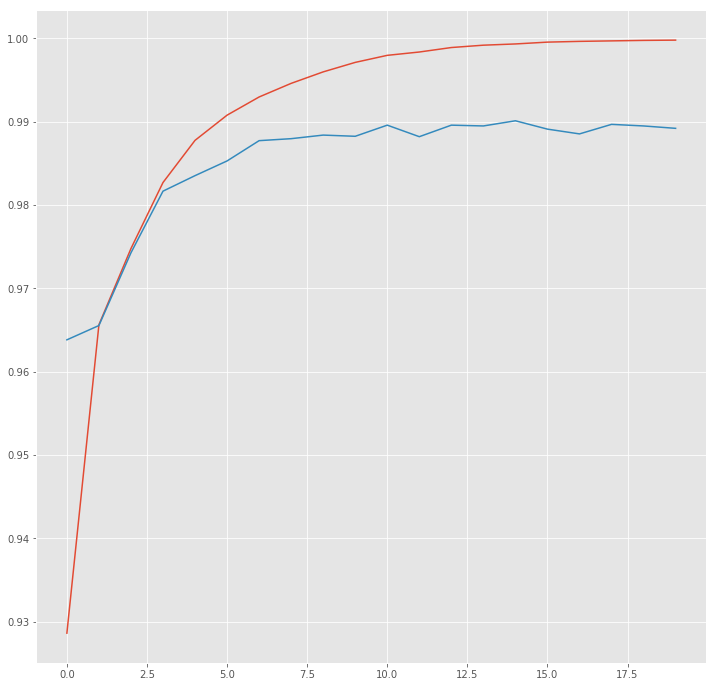

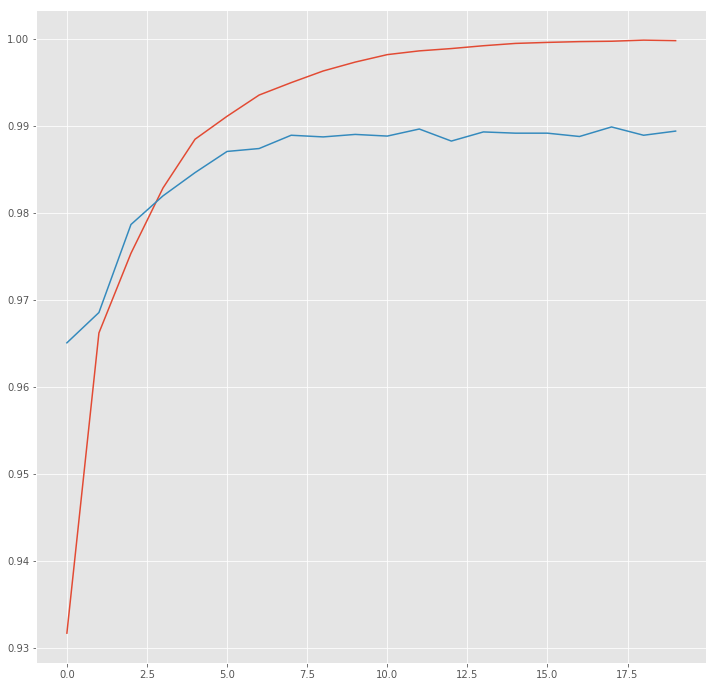

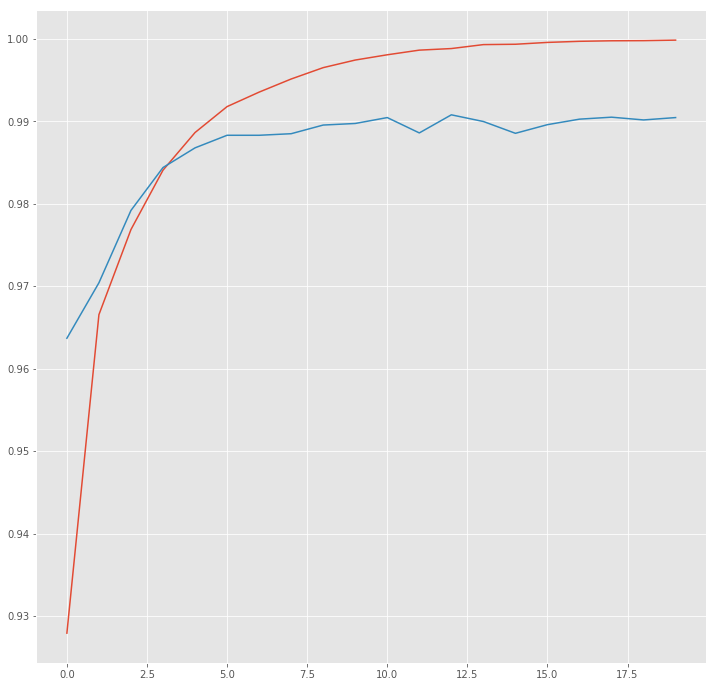

In [136]:
plot_histories(histories)

In [137]:
predict_test_sentence(splits, models, words, 33, use_gazet=False)


Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
ש

In [138]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words, use_gazet=False)

In [139]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1355 phrases; correct: 942.
accuracy:  83.01%; (non-O)
accuracy:  96.05%; precision:  69.52%; recall:  73.48%; FB1:  71.44
             DATE: precision:  73.00%; recall:  71.57%; FB1:  72.28  100
              LOC: precision:  74.66%; recall:  74.92%; FB1:  74.79  296
        MISC--AFF: precision:  86.75%; recall:  86.23%; FB1:  86.49  166
        MISC--ENT: precision:  25.00%; recall:  35.71%; FB1:  29.41  20
       MISC-EVENT: precision:  33.33%; recall:  55.56%; FB1:  41.67  15
            MONEY: precision:  80.00%; recall:  85.11%; FB1:  82.47  50
              ORG: precision:  50.66%; recall:  60.63%; FB1:  55.20  304
          PERCENT: precision:  77.55%; recall:  70.37%; FB1:  73.79  49
             PERS: precision:  74.57%; recall:  78.42%; FB1:  76.44  346
             TIME: precision:  44.44%; recall:  36.36%; FB1:  40.00  9
processed 15256 tokens with 1282 phrases; found: 1388 phrases; correct: 953.
accuracy:  80.57%; (non-O)


## Attention
https://arxiv.org/pdf/1810.13097.pdf
https://pdfs.semanticscholar.org/8785/efdad2abc384d38e76a84fb96d19bbe788c1.pdf?_ga=2.156364859.1813940814.1518068648-1853451355.1518068648

## Evaluate without MISC

In [ ]:
def remove_misc_flat(preds, trues):
    new_preds = []
    new_trues = []
    for pred, tr in zip(preds,trues):
        if pred.startswith('I-MISC') or pred.startswith('B-MISC'):
            new_preds.append('O')
        else:
            new_preds.append(pred)
            
        if tr.startswith('I-MISC') or tr.startswith('B-MISC'):
            new_trues.append('O')
        else:
            new_trues.append(tr)
            
    return new_preds, new_trues
        

In [ ]:
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(*remove_misc_flat(cat_y_te, cat_preds))

## Train without MISC

In [31]:
tag2idx_no_misc = {}
for key, value in tag2idx.items():
    if key.startswith('B_MISC') or key.startswith('I_MISC'):
        tag2idx_no_misc[key] = tag2idx['O']
    else:
        tag2idx_no_misc[key] = tag2idx[key]
        
tag2idx_no_misc

{'B_DATE': 10,
 'B_LOC': 0,
 'B_MISC__AFF': 11,
 'B_MISC__ENT': 11,
 'B_ORG': 1,
 'B_PERS': 6,
 'B_TIME': 13,
 'I_DATE': 9,
 'I_LOC': 15,
 'I_MISC_EVENT': 11,
 'I_MISC__AFF': 11,
 'I_MISC__ENT': 11,
 'I_MONEY': 5,
 'I_ORG': 16,
 'I_PERCENT': 8,
 'I_PERS': 7,
 'I_TIME': 14,
 'O': 11}

In [32]:
y_no_misc = [[tag2idx_no_misc[w[2]] for w in s] for s in sents]
y_no_misc = pad_sequences(maxlen=max_len, sequences=y_no_misc, padding="post", value=tag2idx["O"])
y_no_misc = [to_categorical(i, num_classes=n_tags) for i in y_no_misc]
y_no_misc[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
splits_no_misc = [train_test_split(X, y_no_misc, X_pos, X_gaz, test_size=0.25, random_state=42+i) for i in range(3)]

In [34]:
models, histories = create_models(splits_no_misc, use_pos=True, use_gaz=True, embedding_matrix=embedding_matrix, 
                                  embed_dim=embed_dim)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 24s 10ms/step - loss: 0.1837 - acc: 0.9571 - val_loss: 0.0910 - val_acc: 0.9730
Epoch 2/12
2349/2349 [==============================] - 21s 9ms/step - loss: 0.0612 - acc: 0.9817 - val_loss: 0.0536 - val_acc: 0.9846
Epoch 3/12
2349/2349 [==============================] - 21s 9ms/step - loss: 0.0368 - acc: 0.9888 - val_loss: 0.0465 - val_acc: 0.9864
Epoch 4/12
2349/2349 [==============================] - 23s 10ms/step - loss: 0.0261 - acc: 0.9920 - val_loss: 0.0406 - val_acc: 0.9882
Epoch 5/12
2349/2349 [==============================] - 23s 10ms/step - loss: 0.0192 - acc: 0.9944 - val_loss: 0.0379 - val_acc: 0.9890
Epoch 6/12
2349/2349 [==============================] - 22s 9ms/step - loss: 0.0137 - acc: 0.9957 - val_loss: 0.0389 - val_acc: 0.9894
Epoch 7/12
2349/2349 [==============================] - 21s 9ms/step - loss: 0.0094 - acc: 0.9973 - val_loss: 0.0388 - val_acc: 0.9896
Epoch

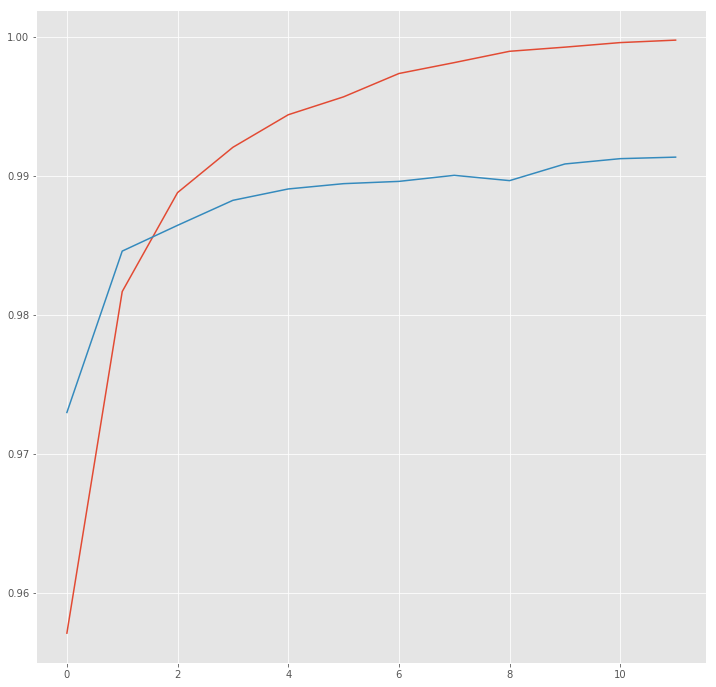

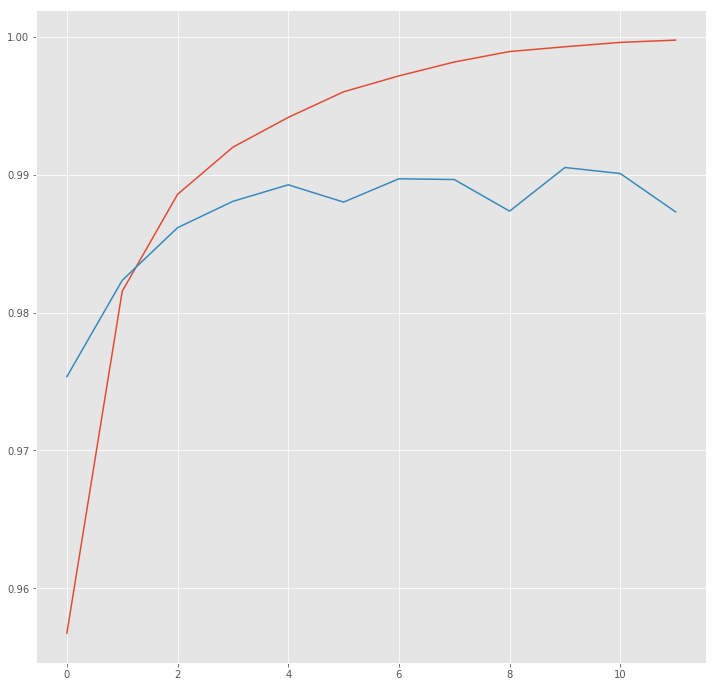

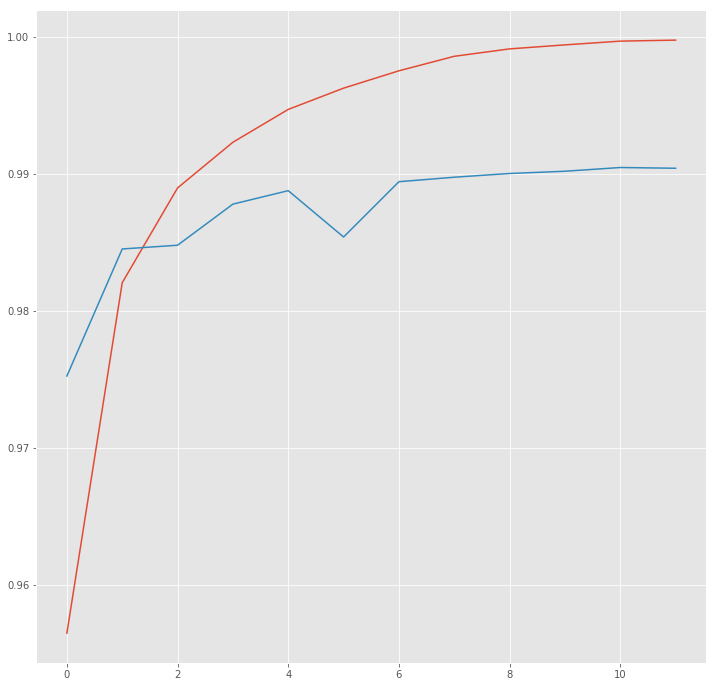

In [35]:
plot_histories(histories)

In [38]:
predict_test_sentence(splits_no_misc, models, words, 33)


Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
ש

In [39]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits_no_misc, models, words, )

In [40]:
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15593 tokens with 1092 phrases; found: 1118 phrases; correct: 818.
accuracy:  83.19%; (non-O)
accuracy:  97.03%; precision:  73.17%; recall:  74.91%; FB1:  74.03
             DATE: precision:  67.83%; recall:  76.47%; FB1:  71.89  115
              LOC: precision:  76.82%; recall:  78.38%; FB1:  77.59  302
            MONEY: precision:  83.02%; recall:  93.62%; FB1:  88.00  53
              ORG: precision:  57.89%; recall:  60.63%; FB1:  59.23  266
          PERCENT: precision:  94.00%; recall:  87.04%; FB1:  90.38  50
             PERS: precision:  79.82%; recall:  79.57%; FB1:  79.69  327
             TIME: precision:  40.00%; recall:  18.18%; FB1:  25.00  5
processed 15256 tokens with 1082 phrases; found: 1283 phrases; correct: 770.
accuracy:  82.95%; (non-O)
accuracy:  95.46%; precision:  60.02%; recall:  71.16%; FB1:  65.12
             DATE: precision:  63.83%; recall:  62.50%; FB1:  63.16  94
              LOC: precision:  74.81%; recall:  69.10%; FB1:  71.84  266
    

## Check conlleval on train

In [ ]:
train_cat_preds, train_cat_y_te, train_words_flat = predict_on_splits(splits, models, words, predict_on_train=True)

In [ ]:
for cat_y_te, cat_preds in zip(train_cat_preds, train_cat_y_te):
    evaluate(cat_y_te, cat_preds)

In [ ]:
for cat_y_te, cat_preds in zip(train_cat_preds, train_cat_y_te):
    evaluate(*remove_misc_flat(cat_y_te, cat_preds))

## LSTM-CRF

CRF impl. from https://github.com/keras-team/keras-contrib

In [33]:
from keras_contrib.layers import CRF
from keras_contrib.metrics import crf_accuracy
from keras_contrib.losses import crf_loss

In [34]:
def create_models_crf(splits, use_pos=True, use_gaz=True, embedding_matrix=None, 
                  embed_dim=70, trainable=True, input_dropout=False, stack_lstm=1, epochs=12,
                  crf=True):
    models = []
    histories = []
    for X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te in splits:
        all_input_embeds = []
        all_inputs = []
        input = Input(shape=(max_len,))
        if embedding_matrix is not None:
            input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len, 
                                weights=[embedding_matrix], trainable=trainable)(input)
        else:
            input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len)(input)
        all_input_embeds.append(input_embed)
        all_inputs.append(input)
        train_data = [X_tr]
        if use_pos:
            pos_input = Input(shape=(max_len,))
            pos_embed = Embedding(input_dim=n_pos+1, output_dim=10, input_length=max_len)(pos_input)
            all_input_embeds.append(pos_embed)
            all_inputs.append(pos_input)
            train_data.append(pos_tr)
        if use_gaz:
            gaz_input = Input(shape=(max_len,))
            gaz_embed = Embedding(input_dim=n_gaz+1, output_dim=10, input_length=max_len)(gaz_input)
            all_input_embeds.append(gaz_embed)
            all_inputs.append(gaz_input)
            train_data.append(gazet_tr)
        if len(all_inputs)>1:
            model = Concatenate()(all_input_embeds)
        else: 
            model = input_embed
            all_input_embeds = input_embed
            all_inputs = input
            train_data = X_tr
        if input_dropout:
            model = Dropout(0.1)(model)
        for i in range(stack_lstm):
            model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
        if crf:
            model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
            crf = CRF(n_tags+1)
            loss = crf_loss
            metric = crf_accuracy
            out = crf(model)
        else:
            out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer
            loss = "categorical_crossentropy"
            metric = 'accuracy'
            
        model = Model(all_inputs, out)
        
        model.compile(optimizer="rmsprop", loss=loss, metrics=[metric])
        history = model.fit(train_data, np.array(y_tr), batch_size=32, epochs=epochs, 
                            validation_split=0.1, verbose=1)
        models.append(model)
        hist = pd.DataFrame(history.history)
        histories.append(hist)
        
    return models, histories


In [127]:
models, histories = create_models_crf(splits, use_pos=True, use_gaz=False, embedding_matrix=embedding_matrix, 
                                  embed_dim=embed_dim)

C:\Users\dbare\Anaconda3\lib\site-packages\keras_contrib\layers\crf.py:344: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
C:\Users\dbare\Anaconda3\lib\site-packages\keras_contrib\layers\crf.py:351: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 44s 19ms/step - loss: 0.3415 - crf_viterbi_accuracy: 0.9178 - val_loss: 0.1255 - val_crf_viterbi_accuracy: 0.9658
Epoch 2/12
2349/2349 [==============================] - 33s 14ms/step - loss: 0.0718 - crf_viterbi_accuracy: 0.9796 - val_loss: 0.0619 - val_crf_viterbi_accuracy: 0.9835
Epoch 3/12
2349/2349 [==============================] - 35s 15ms/step - loss: 0.0405 - crf_viterbi_accuracy: 0.9883 - val_loss: 0.0495 - val_crf_viterbi_accuracy: 0.9857
Epoch 4/12
2349/2349 [==============================] - 37s 16ms/step - loss: 0.0265 - crf_viterbi_accuracy: 0.9917 - val_loss: 0.0407 - val_crf_viterbi_accuracy: 0.9883
Epoch 5/12
2349/2349 [==============================] - 40s 17ms/step - loss: 0.0175 - crf_viterbi_accuracy: 0.9938 - val_loss: 0.0465 - val_crf_viterbi_accuracy: 0.9842
Epoch 6/12
2349/2349 [==============================] - 42s 18ms/step - loss: 0.0105 - crf_viterbi_accu

In [35]:
def plot_histories_crf(histories):
    for h in histories:
        plt.figure(figsize=(12,12))
        plt.plot(h["crf_accuracy"])
        plt.plot(h["val_crf_accuracy"])
        plt.show()  

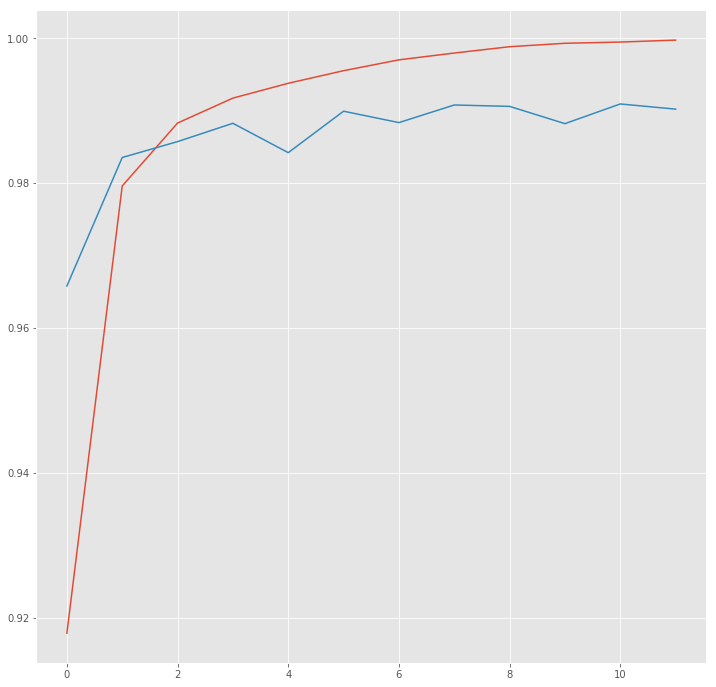

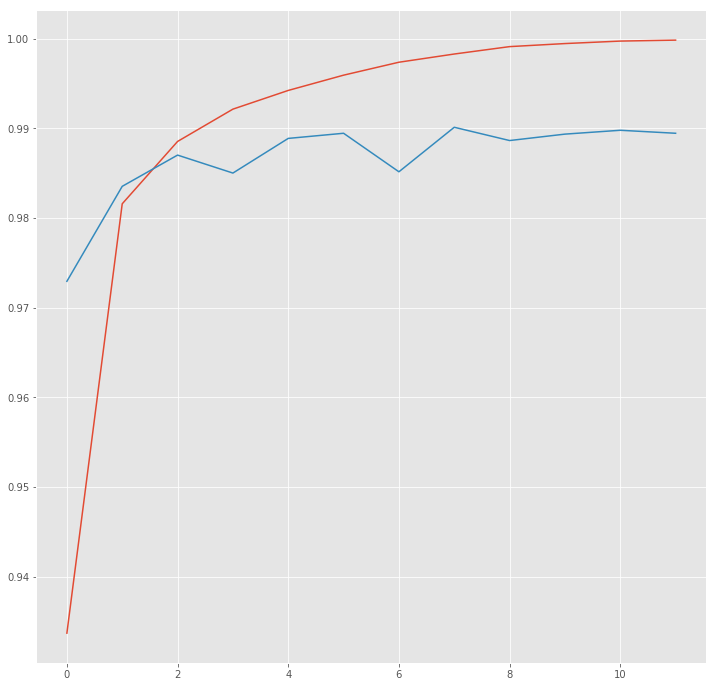

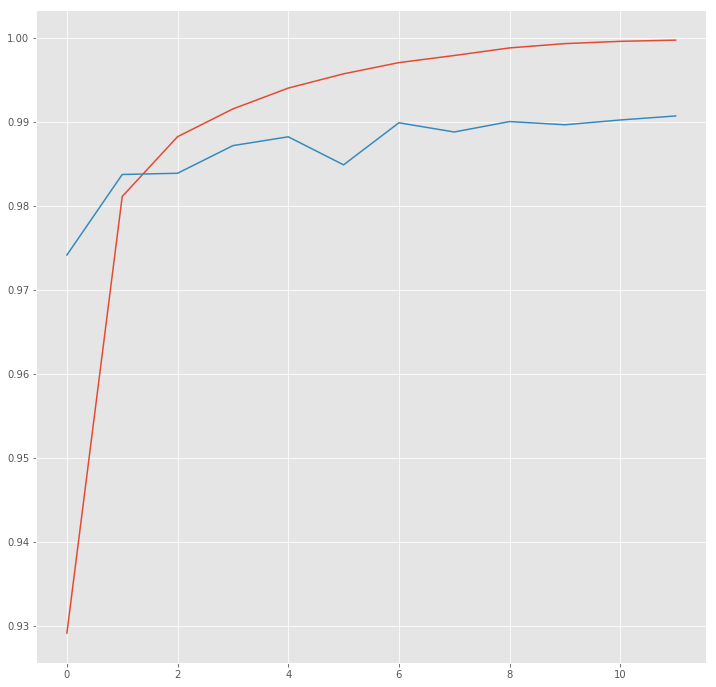

In [128]:
plot_histories_crf(histories)

In [129]:
predict_test_sentence(splits, models, words, 33, use_gazet=False)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של   

In [130]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(splits, models, words, use_gazet=False)

In [131]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1324 phrases; correct: 968.
accuracy:  83.93%; (non-O)
accuracy:  96.57%; precision:  73.11%; recall:  75.51%; FB1:  74.29
             DATE: precision:  70.54%; recall:  77.45%; FB1:  73.83  112
              LOC: precision:  72.30%; recall:  72.54%; FB1:  72.42  296
        MISC--AFF: precision:  92.17%; recall:  91.62%; FB1:  91.89  166
        MISC--ENT: precision:  53.33%; recall:  57.14%; FB1:  55.17  15
       MISC-EVENT: precision:  42.86%; recall:  66.67%; FB1:  52.17  14
            MONEY: precision:  86.27%; recall:  93.62%; FB1:  89.80  51
              ORG: precision:  58.33%; recall:  63.39%; FB1:  60.75  276
          PERCENT: precision:  92.86%; recall:  72.22%; FB1:  81.25  42
             PERS: precision:  75.72%; recall:  79.64%; FB1:  77.63  346
             TIME: precision:  33.33%; recall:  18.18%; FB1:  23.53  6
processed 15256 tokens with 1282 phrases; found: 1344 phrases; correct: 952.
accuracy:  79.33%; (non-O)


### seqeval
https://github.com/chakki-works/seqeval

In [132]:
from seqeval.metrics import classification_report
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    print(classification_report(cat_y_te, cat_preds))

             precision    recall  f1-score   support

        LOC       0.72      0.73      0.72       295
       DATE       0.71      0.77      0.74       102
        ORG       0.58      0.63      0.61       254
        ENT       0.53      0.57      0.55        14
       PERS       0.76      0.80      0.78       329
      MONEY       0.86      0.94      0.90        47
    PERCENT       0.93      0.72      0.81        54
      EVENT       0.43      0.67      0.52         9
        AFF       0.92      0.92      0.92       167
       TIME       0.33      0.18      0.24        11

avg / total       0.73      0.76      0.74      1282

             precision    recall  f1-score   support

        LOC       0.79      0.76      0.77       288
       PERS       0.76      0.80      0.78       304
        ORG       0.59      0.64      0.62       275
        AFF       0.78      0.80      0.79       172
    PERCENT       0.62      0.93      0.75        54
      MONEY       0.88      0.86      0.87

## Char Embeddings

### Prep input

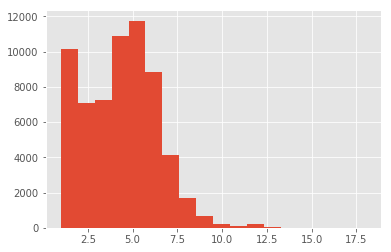

In [36]:
x.corpus_form.apply(len).hist(bins=18)

In [37]:
max_len_char = 10

In [38]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)

101


In [39]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [40]:
X_char = []
for sentence in sents:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

In [41]:
X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.25, random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42)


### Model

In [42]:
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D

In [43]:
def create_models_char(splits, use_word=True, use_pos=True, use_gaz=True, embedding_matrix=None, 
                       embed_dim=70, trainable=True, input_dropout=False, stack_lstm=1, epochs=12,
                       use_char=True, crf=False,
                       stack_cross=False, stack_double=False, rec_dropout=0.1):
    models = []
    histories = []
    for word_split, char_split in zip(splits, splits_char):
        X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
        X_char_tr, X_char_te, _, _ = char_split
        all_input_embeds = []
        all_inputs = []
        train_data = []
        if use_word:
            input = Input(shape=(max_len,))
            if embedding_matrix is not None:
                input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len, 
                                    weights=[embedding_matrix], trainable=trainable)(input)
            else:
                input_embed = Embedding(input_dim=n_words+2, output_dim=embed_dim, input_length=max_len)(input)
            all_input_embeds.append(input_embed)
            all_inputs.append(input)
            train_data.append(X_tr)
        if use_pos:
            pos_input = Input(shape=(max_len,))
            pos_embed = Embedding(input_dim=n_pos+1, output_dim=10, input_length=max_len)(pos_input)
            all_input_embeds.append(pos_embed)
            all_inputs.append(pos_input)
            train_data.append(pos_tr)
        if use_gaz:
            gaz_input = Input(shape=(max_len,))
            gaz_embed = Embedding(input_dim=n_gaz+1, output_dim=10, input_length=max_len)(gaz_input)
            all_input_embeds.append(gaz_embed)
            all_inputs.append(gaz_input)
            train_data.append(gazet_tr)
        if use_char:
            # input and embeddings for characters
            char_in = Input(shape=(max_len, max_len_char,))
            emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=20,
                                       input_length=max_len_char))(char_in)
            # character LSTM to get word encodings by characters
            char_enc = TimeDistributed(Bidirectional(LSTM(units=10, return_sequences=False,
                                            recurrent_dropout=0.5)))(emb_char)
            all_input_embeds.append(char_enc)
            all_inputs.append(char_in)
            train_data.append(np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char)))
        if len(all_inputs)>1:
            model = Concatenate()(all_input_embeds)
            if (use_char):
                model = SpatialDropout1D(0.3)(model)
        else: 
            model = all_input_embeds[0]
            all_input_embeds = all_input_embeds[0]
            all_inputs = all_inputs[0]
            train_data = train_data[0]

        if input_dropout:
            model = Dropout(0.1)(model)
        
        if stack_double:
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(model)
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(front)
            back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(model)
            model = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(back)
        if stack_cross:
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(model)
            front = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout)(front)
            back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(model)
            back = LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout, go_backwards=True)(back)
            model = concatenate([back, front])
        for i in range(stack_lstm):
            model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=rec_dropout))(model)
        
        if crf:
            model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
            crf = CRF(n_tags+1)
            loss = crf_loss
            metric = crf_accuracy
            out = crf(model)
        else:
            out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer
            loss = "categorical_crossentropy"
            metric = 'accuracy'
            
        model = Model(all_inputs, out)
        model.compile(optimizer="rmsprop", loss=loss, metrics=[metric])
        print(model.summary())
        history = model.fit(train_data, np.array(y_tr), batch_size=32, epochs=epochs, 
                            validation_split=0.1, verbose=1)
        models.append(model)
        hist = pd.DataFrame(history.history)
        histories.append(hist)
        
    return models, histories


In [44]:
splits_char = [train_test_split(X_char, y, test_size=0.25, random_state=42+i) for i in range(3)]

### Train - Char only

In [107]:
models, histories = create_models_char(splits, use_word=False, use_pos=False, use_gaz=False, use_char=True, embed_dim=70, epochs=10)

Train on 2349 samples, validate on 262 samples
Epoch 1/10
2349/2349 [==============================] - ETA: 6:41 - loss: 2.9384 - acc: 0.049 - ETA: 3:26 - loss: 2.8917 - acc: 0.424 - ETA: 2:21 - loss: 2.8306 - acc: 0.546 - ETA: 1:48 - loss: 2.7369 - acc: 0.591 - ETA: 1:28 - loss: 2.4971 - acc: 0.632 - ETA: 1:15 - loss: 2.2325 - acc: 0.660 - ETA: 1:05 - loss: 2.0374 - acc: 0.673 - ETA: 58s - loss: 1.8817 - acc: 0.684 - ETA: 52s - loss: 1.7606 - acc: 0.68 - ETA: 48s - loss: 1.6436 - acc: 0.70 - ETA: 44s - loss: 1.5532 - acc: 0.70 - ETA: 41s - loss: 1.4763 - acc: 0.70 - ETA: 38s - loss: 1.4028 - acc: 0.71 - ETA: 36s - loss: 1.3438 - acc: 0.72 - ETA: 34s - loss: 1.2906 - acc: 0.73 - ETA: 32s - loss: 1.2373 - acc: 0.74 - ETA: 30s - loss: 1.1944 - acc: 0.74 - ETA: 29s - loss: 1.1540 - acc: 0.75 - ETA: 28s - loss: 1.1179 - acc: 0.76 - ETA: 26s - loss: 1.0826 - acc: 0.76 - ETA: 25s - loss: 1.0540 - acc: 0.77 - ETA: 24s - loss: 1.0260 - acc: 0.77 - ETA: 23s - loss: 1.0011 - acc: 0.78 - ETA: 22s

2349/2349 [==============================] - ETA: 16s - loss: 0.1754 - acc: 0.96 - ETA: 16s - loss: 0.1770 - acc: 0.96 - ETA: 16s - loss: 0.1615 - acc: 0.96 - ETA: 15s - loss: 0.1715 - acc: 0.96 - ETA: 15s - loss: 0.1746 - acc: 0.96 - ETA: 15s - loss: 0.1653 - acc: 0.96 - ETA: 15s - loss: 0.1655 - acc: 0.96 - ETA: 15s - loss: 0.1735 - acc: 0.96 - ETA: 14s - loss: 0.1745 - acc: 0.96 - ETA: 14s - loss: 0.1736 - acc: 0.96 - ETA: 14s - loss: 0.1735 - acc: 0.96 - ETA: 14s - loss: 0.1735 - acc: 0.96 - ETA: 14s - loss: 0.1693 - acc: 0.96 - ETA: 13s - loss: 0.1692 - acc: 0.96 - ETA: 13s - loss: 0.1694 - acc: 0.96 - ETA: 13s - loss: 0.1686 - acc: 0.96 - ETA: 13s - loss: 0.1678 - acc: 0.96 - ETA: 12s - loss: 0.1663 - acc: 0.96 - ETA: 12s - loss: 0.1644 - acc: 0.96 - ETA: 12s - loss: 0.1629 - acc: 0.96 - ETA: 12s - loss: 0.1640 - acc: 0.96 - ETA: 11s - loss: 0.1670 - acc: 0.96 - ETA: 11s - loss: 0.1682 - acc: 0.96 - ETA: 11s - loss: 0.1675 - acc: 0.96 - ETA: 11s - loss: 0.1674 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 15s - loss: 0.1630 - acc: 0.96 - ETA: 15s - loss: 0.1489 - acc: 0.96 - ETA: 16s - loss: 0.1558 - acc: 0.96 - ETA: 15s - loss: 0.1525 - acc: 0.96 - ETA: 15s - loss: 0.1583 - acc: 0.96 - ETA: 15s - loss: 0.1658 - acc: 0.96 - ETA: 14s - loss: 0.1598 - acc: 0.96 - ETA: 14s - loss: 0.1655 - acc: 0.96 - ETA: 14s - loss: 0.1654 - acc: 0.96 - ETA: 14s - loss: 0.1603 - acc: 0.96 - ETA: 14s - loss: 0.1597 - acc: 0.96 - ETA: 13s - loss: 0.1592 - acc: 0.96 - ETA: 13s - loss: 0.1580 - acc: 0.96 - ETA: 13s - loss: 0.1574 - acc: 0.96 - ETA: 13s - loss: 0.1571 - acc: 0.96 - ETA: 12s - loss: 0.1538 - acc: 0.96 - ETA: 12s - loss: 0.1540 - acc: 0.96 - ETA: 12s - loss: 0.1536 - acc: 0.96 - ETA: 12s - loss: 0.1521 - acc: 0.96 - ETA: 12s - loss: 0.1495 - acc: 0.96 - ETA: 11s - loss: 0.1514 - acc: 0.96 - ETA: 11s - loss: 0.1509 - acc: 0.96 - ETA: 11s - loss: 0.1499 - acc: 0.96 - ETA: 11s - loss: 0.1489 - acc: 0.96 - ETA: 10s - loss: 0.1514 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 14s - loss: 0.1410 - acc: 0.96 - ETA: 15s - loss: 0.1619 - acc: 0.96 - ETA: 14s - loss: 0.1549 - acc: 0.96 - ETA: 14s - loss: 0.1531 - acc: 0.96 - ETA: 14s - loss: 0.1449 - acc: 0.96 - ETA: 14s - loss: 0.1406 - acc: 0.96 - ETA: 13s - loss: 0.1440 - acc: 0.96 - ETA: 13s - loss: 0.1435 - acc: 0.96 - ETA: 13s - loss: 0.1403 - acc: 0.96 - ETA: 12s - loss: 0.1396 - acc: 0.96 - ETA: 12s - loss: 0.1413 - acc: 0.96 - ETA: 12s - loss: 0.1427 - acc: 0.96 - ETA: 12s - loss: 0.1412 - acc: 0.96 - ETA: 12s - loss: 0.1406 - acc: 0.96 - ETA: 11s - loss: 0.1432 - acc: 0.96 - ETA: 11s - loss: 0.1421 - acc: 0.96 - ETA: 11s - loss: 0.1407 - acc: 0.96 - ETA: 11s - loss: 0.1381 - acc: 0.96 - ETA: 11s - loss: 0.1370 - acc: 0.96 - ETA: 10s - loss: 0.1375 - acc: 0.96 - ETA: 10s - loss: 0.1377 - acc: 0.96 - ETA: 10s - loss: 0.1394 - acc: 0.96 - ETA: 10s - loss: 0.1396 - acc: 0.96 - ETA: 10s - loss: 0.1408 - acc: 0.96 - ETA: 9s - loss: 0.1406 - acc: 0.9690 - ETA:

2349/2349 [==============================] - ETA: 16s - loss: 0.1172 - acc: 0.97 - ETA: 16s - loss: 0.1312 - acc: 0.97 - ETA: 16s - loss: 0.1232 - acc: 0.97 - ETA: 15s - loss: 0.1184 - acc: 0.97 - ETA: 15s - loss: 0.1188 - acc: 0.97 - ETA: 15s - loss: 0.1189 - acc: 0.97 - ETA: 14s - loss: 0.1194 - acc: 0.97 - ETA: 14s - loss: 0.1168 - acc: 0.97 - ETA: 14s - loss: 0.1182 - acc: 0.97 - ETA: 14s - loss: 0.1268 - acc: 0.97 - ETA: 13s - loss: 0.1266 - acc: 0.97 - ETA: 13s - loss: 0.1255 - acc: 0.97 - ETA: 13s - loss: 0.1260 - acc: 0.97 - ETA: 13s - loss: 0.1264 - acc: 0.97 - ETA: 13s - loss: 0.1286 - acc: 0.97 - ETA: 12s - loss: 0.1325 - acc: 0.96 - ETA: 12s - loss: 0.1313 - acc: 0.96 - ETA: 12s - loss: 0.1318 - acc: 0.96 - ETA: 12s - loss: 0.1312 - acc: 0.97 - ETA: 11s - loss: 0.1316 - acc: 0.96 - ETA: 11s - loss: 0.1318 - acc: 0.96 - ETA: 11s - loss: 0.1320 - acc: 0.96 - ETA: 11s - loss: 0.1311 - acc: 0.97 - ETA: 10s - loss: 0.1311 - acc: 0.97 - ETA: 10s - loss: 0.1309 - acc: 0.97 - ETA: 

2349/2349 [==============================] - ETA: 6:49 - loss: 2.9520 - acc: 0.001 - ETA: 3:29 - loss: 2.9131 - acc: 0.381 - ETA: 2:22 - loss: 2.8655 - acc: 0.514 - ETA: 1:49 - loss: 2.7755 - acc: 0.579 - ETA: 1:29 - loss: 2.5502 - acc: 0.618 - ETA: 1:15 - loss: 2.2964 - acc: 0.643 - ETA: 1:06 - loss: 2.1008 - acc: 0.659 - ETA: 58s - loss: 1.9201 - acc: 0.677 - ETA: 52s - loss: 1.7884 - acc: 0.68 - ETA: 48s - loss: 1.6810 - acc: 0.69 - ETA: 44s - loss: 1.5711 - acc: 0.70 - ETA: 41s - loss: 1.4943 - acc: 0.71 - ETA: 38s - loss: 1.4197 - acc: 0.72 - ETA: 36s - loss: 1.3482 - acc: 0.73 - ETA: 34s - loss: 1.2891 - acc: 0.74 - ETA: 32s - loss: 1.2417 - acc: 0.74 - ETA: 30s - loss: 1.1943 - acc: 0.75 - ETA: 29s - loss: 1.1493 - acc: 0.76 - ETA: 27s - loss: 1.1109 - acc: 0.77 - ETA: 26s - loss: 1.0812 - acc: 0.77 - ETA: 25s - loss: 1.0579 - acc: 0.77 - ETA: 24s - loss: 1.0281 - acc: 0.78 - ETA: 23s - loss: 1.0050 - acc: 0.78 - ETA: 22s - loss: 0.9850 - acc: 0.78 - ETA: 21s - loss: 0.9666 - ac

2349/2349 [==============================] - ETA: 18s - loss: 0.1971 - acc: 0.95 - ETA: 16s - loss: 0.1820 - acc: 0.95 - ETA: 16s - loss: 0.1777 - acc: 0.96 - ETA: 15s - loss: 0.1774 - acc: 0.96 - ETA: 15s - loss: 0.1694 - acc: 0.96 - ETA: 15s - loss: 0.1727 - acc: 0.96 - ETA: 15s - loss: 0.1920 - acc: 0.95 - ETA: 15s - loss: 0.1910 - acc: 0.95 - ETA: 15s - loss: 0.1893 - acc: 0.95 - ETA: 14s - loss: 0.1845 - acc: 0.96 - ETA: 14s - loss: 0.1824 - acc: 0.96 - ETA: 14s - loss: 0.1804 - acc: 0.96 - ETA: 13s - loss: 0.1792 - acc: 0.96 - ETA: 13s - loss: 0.1773 - acc: 0.96 - ETA: 13s - loss: 0.1773 - acc: 0.96 - ETA: 13s - loss: 0.1786 - acc: 0.96 - ETA: 12s - loss: 0.1774 - acc: 0.96 - ETA: 12s - loss: 0.1765 - acc: 0.96 - ETA: 12s - loss: 0.1742 - acc: 0.96 - ETA: 12s - loss: 0.1709 - acc: 0.96 - ETA: 11s - loss: 0.1704 - acc: 0.96 - ETA: 11s - loss: 0.1710 - acc: 0.96 - ETA: 11s - loss: 0.1701 - acc: 0.96 - ETA: 11s - loss: 0.1722 - acc: 0.96 - ETA: 10s - loss: 0.1722 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 15s - loss: 0.1102 - acc: 0.97 - ETA: 15s - loss: 0.1491 - acc: 0.96 - ETA: 15s - loss: 0.1518 - acc: 0.96 - ETA: 15s - loss: 0.1495 - acc: 0.96 - ETA: 14s - loss: 0.1484 - acc: 0.96 - ETA: 14s - loss: 0.1458 - acc: 0.96 - ETA: 14s - loss: 0.1467 - acc: 0.96 - ETA: 14s - loss: 0.1450 - acc: 0.96 - ETA: 14s - loss: 0.1447 - acc: 0.96 - ETA: 13s - loss: 0.1430 - acc: 0.96 - ETA: 13s - loss: 0.1413 - acc: 0.96 - ETA: 13s - loss: 0.1436 - acc: 0.96 - ETA: 13s - loss: 0.1451 - acc: 0.96 - ETA: 12s - loss: 0.1472 - acc: 0.96 - ETA: 12s - loss: 0.1456 - acc: 0.96 - ETA: 12s - loss: 0.1434 - acc: 0.96 - ETA: 12s - loss: 0.1436 - acc: 0.96 - ETA: 12s - loss: 0.1408 - acc: 0.96 - ETA: 11s - loss: 0.1421 - acc: 0.96 - ETA: 11s - loss: 0.1451 - acc: 0.96 - ETA: 11s - loss: 0.1428 - acc: 0.96 - ETA: 11s - loss: 0.1427 - acc: 0.96 - ETA: 10s - loss: 0.1419 - acc: 0.96 - ETA: 10s - loss: 0.1405 - acc: 0.96 - ETA: 10s - loss: 0.1409 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 15s - loss: 0.1321 - acc: 0.96 - ETA: 15s - loss: 0.1294 - acc: 0.97 - ETA: 15s - loss: 0.1336 - acc: 0.96 - ETA: 14s - loss: 0.1264 - acc: 0.97 - ETA: 14s - loss: 0.1229 - acc: 0.97 - ETA: 14s - loss: 0.1374 - acc: 0.96 - ETA: 13s - loss: 0.1401 - acc: 0.96 - ETA: 13s - loss: 0.1321 - acc: 0.96 - ETA: 13s - loss: 0.1314 - acc: 0.96 - ETA: 13s - loss: 0.1293 - acc: 0.97 - ETA: 13s - loss: 0.1311 - acc: 0.96 - ETA: 12s - loss: 0.1349 - acc: 0.96 - ETA: 12s - loss: 0.1388 - acc: 0.96 - ETA: 12s - loss: 0.1404 - acc: 0.96 - ETA: 12s - loss: 0.1397 - acc: 0.96 - ETA: 12s - loss: 0.1394 - acc: 0.96 - ETA: 11s - loss: 0.1380 - acc: 0.96 - ETA: 11s - loss: 0.1394 - acc: 0.96 - ETA: 11s - loss: 0.1377 - acc: 0.96 - ETA: 11s - loss: 0.1400 - acc: 0.96 - ETA: 10s - loss: 0.1411 - acc: 0.96 - ETA: 10s - loss: 0.1425 - acc: 0.96 - ETA: 10s - loss: 0.1418 - acc: 0.96 - ETA: 10s - loss: 0.1405 - acc: 0.96 - ETA: 10s - loss: 0.1400 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 14s - loss: 0.1066 - acc: 0.97 - ETA: 15s - loss: 0.0985 - acc: 0.97 - ETA: 14s - loss: 0.1182 - acc: 0.97 - ETA: 14s - loss: 0.1307 - acc: 0.96 - ETA: 14s - loss: 0.1337 - acc: 0.96 - ETA: 14s - loss: 0.1324 - acc: 0.96 - ETA: 13s - loss: 0.1342 - acc: 0.96 - ETA: 13s - loss: 0.1335 - acc: 0.96 - ETA: 13s - loss: 0.1317 - acc: 0.96 - ETA: 13s - loss: 0.1294 - acc: 0.96 - ETA: 13s - loss: 0.1298 - acc: 0.96 - ETA: 12s - loss: 0.1302 - acc: 0.96 - ETA: 12s - loss: 0.1318 - acc: 0.96 - ETA: 12s - loss: 0.1288 - acc: 0.97 - ETA: 12s - loss: 0.1269 - acc: 0.97 - ETA: 11s - loss: 0.1259 - acc: 0.97 - ETA: 11s - loss: 0.1290 - acc: 0.96 - ETA: 11s - loss: 0.1296 - acc: 0.96 - ETA: 11s - loss: 0.1275 - acc: 0.97 - ETA: 11s - loss: 0.1280 - acc: 0.97 - ETA: 10s - loss: 0.1298 - acc: 0.97 - ETA: 10s - loss: 0.1302 - acc: 0.96 - ETA: 10s - loss: 0.1305 - acc: 0.96 - ETA: 10s - loss: 0.1307 - acc: 0.96 - ETA: 10s - loss: 0.1301 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 7:40 - loss: 2.9313 - acc: 0.609 - ETA: 3:54 - loss: 2.8896 - acc: 0.680 - ETA: 2:39 - loss: 2.8300 - acc: 0.712 - ETA: 2:01 - loss: 2.6745 - acc: 0.731 - ETA: 1:38 - loss: 2.3785 - acc: 0.744 - ETA: 1:23 - loss: 2.1429 - acc: 0.748 - ETA: 1:12 - loss: 1.9432 - acc: 0.752 - ETA: 1:04 - loss: 1.7776 - acc: 0.758 - ETA: 58s - loss: 1.6509 - acc: 0.760 - ETA: 53s - loss: 1.5353 - acc: 0.76 - ETA: 49s - loss: 1.4411 - acc: 0.77 - ETA: 46s - loss: 1.3553 - acc: 0.78 - ETA: 43s - loss: 1.2909 - acc: 0.78 - ETA: 40s - loss: 1.2305 - acc: 0.79 - ETA: 38s - loss: 1.1879 - acc: 0.79 - ETA: 36s - loss: 1.1420 - acc: 0.80 - ETA: 34s - loss: 1.1015 - acc: 0.80 - ETA: 32s - loss: 1.0645 - acc: 0.81 - ETA: 31s - loss: 1.0372 - acc: 0.81 - ETA: 29s - loss: 1.0106 - acc: 0.81 - ETA: 28s - loss: 0.9864 - acc: 0.81 - ETA: 27s - loss: 0.9634 - acc: 0.81 - ETA: 25s - loss: 0.9426 - acc: 0.82 - ETA: 24s - loss: 0.9203 - acc: 0.82 - ETA: 23s - loss: 0.9039 - 

2349/2349 [==============================] - ETA: 16s - loss: 0.1629 - acc: 0.96 - ETA: 17s - loss: 0.1979 - acc: 0.95 - ETA: 16s - loss: 0.1683 - acc: 0.96 - ETA: 16s - loss: 0.1671 - acc: 0.96 - ETA: 16s - loss: 0.1576 - acc: 0.96 - ETA: 16s - loss: 0.1575 - acc: 0.96 - ETA: 16s - loss: 0.1596 - acc: 0.96 - ETA: 15s - loss: 0.1624 - acc: 0.96 - ETA: 15s - loss: 0.1620 - acc: 0.96 - ETA: 15s - loss: 0.1640 - acc: 0.96 - ETA: 15s - loss: 0.1674 - acc: 0.96 - ETA: 15s - loss: 0.1668 - acc: 0.96 - ETA: 14s - loss: 0.1643 - acc: 0.96 - ETA: 14s - loss: 0.1647 - acc: 0.96 - ETA: 14s - loss: 0.1703 - acc: 0.96 - ETA: 13s - loss: 0.1700 - acc: 0.96 - ETA: 13s - loss: 0.1678 - acc: 0.96 - ETA: 13s - loss: 0.1678 - acc: 0.96 - ETA: 12s - loss: 0.1699 - acc: 0.96 - ETA: 12s - loss: 0.1697 - acc: 0.96 - ETA: 12s - loss: 0.1697 - acc: 0.96 - ETA: 11s - loss: 0.1684 - acc: 0.96 - ETA: 11s - loss: 0.1656 - acc: 0.96 - ETA: 11s - loss: 0.1642 - acc: 0.96 - ETA: 11s - loss: 0.1612 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 15s - loss: 0.1353 - acc: 0.96 - ETA: 15s - loss: 0.1342 - acc: 0.97 - ETA: 15s - loss: 0.1396 - acc: 0.96 - ETA: 14s - loss: 0.1374 - acc: 0.97 - ETA: 14s - loss: 0.1390 - acc: 0.97 - ETA: 14s - loss: 0.1387 - acc: 0.97 - ETA: 14s - loss: 0.1331 - acc: 0.97 - ETA: 14s - loss: 0.1430 - acc: 0.96 - ETA: 13s - loss: 0.1422 - acc: 0.96 - ETA: 13s - loss: 0.1414 - acc: 0.96 - ETA: 13s - loss: 0.1413 - acc: 0.97 - ETA: 13s - loss: 0.1421 - acc: 0.97 - ETA: 13s - loss: 0.1407 - acc: 0.97 - ETA: 13s - loss: 0.1390 - acc: 0.97 - ETA: 12s - loss: 0.1389 - acc: 0.97 - ETA: 12s - loss: 0.1413 - acc: 0.97 - ETA: 12s - loss: 0.1426 - acc: 0.97 - ETA: 12s - loss: 0.1451 - acc: 0.96 - ETA: 12s - loss: 0.1441 - acc: 0.96 - ETA: 11s - loss: 0.1445 - acc: 0.96 - ETA: 11s - loss: 0.1439 - acc: 0.96 - ETA: 11s - loss: 0.1428 - acc: 0.96 - ETA: 11s - loss: 0.1458 - acc: 0.96 - ETA: 10s - loss: 0.1457 - acc: 0.96 - ETA: 10s - loss: 0.1449 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 16s - loss: 0.1318 - acc: 0.97 - ETA: 16s - loss: 0.1411 - acc: 0.96 - ETA: 15s - loss: 0.1433 - acc: 0.96 - ETA: 15s - loss: 0.1439 - acc: 0.96 - ETA: 15s - loss: 0.1379 - acc: 0.96 - ETA: 15s - loss: 0.1381 - acc: 0.96 - ETA: 15s - loss: 0.1386 - acc: 0.96 - ETA: 15s - loss: 0.1413 - acc: 0.96 - ETA: 14s - loss: 0.1372 - acc: 0.96 - ETA: 14s - loss: 0.1391 - acc: 0.96 - ETA: 14s - loss: 0.1371 - acc: 0.96 - ETA: 14s - loss: 0.1353 - acc: 0.96 - ETA: 14s - loss: 0.1332 - acc: 0.97 - ETA: 14s - loss: 0.1357 - acc: 0.96 - ETA: 13s - loss: 0.1360 - acc: 0.96 - ETA: 13s - loss: 0.1378 - acc: 0.96 - ETA: 13s - loss: 0.1388 - acc: 0.96 - ETA: 13s - loss: 0.1373 - acc: 0.96 - ETA: 12s - loss: 0.1357 - acc: 0.96 - ETA: 12s - loss: 0.1358 - acc: 0.96 - ETA: 12s - loss: 0.1368 - acc: 0.96 - ETA: 12s - loss: 0.1386 - acc: 0.96 - ETA: 11s - loss: 0.1393 - acc: 0.96 - ETA: 11s - loss: 0.1380 - acc: 0.96 - ETA: 11s - loss: 0.1369 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 15s - loss: 0.1718 - acc: 0.96 - ETA: 15s - loss: 0.1578 - acc: 0.96 - ETA: 15s - loss: 0.1435 - acc: 0.96 - ETA: 15s - loss: 0.1412 - acc: 0.96 - ETA: 15s - loss: 0.1312 - acc: 0.97 - ETA: 15s - loss: 0.1244 - acc: 0.97 - ETA: 15s - loss: 0.1245 - acc: 0.97 - ETA: 15s - loss: 0.1261 - acc: 0.97 - ETA: 14s - loss: 0.1280 - acc: 0.97 - ETA: 14s - loss: 0.1276 - acc: 0.97 - ETA: 14s - loss: 0.1303 - acc: 0.97 - ETA: 14s - loss: 0.1316 - acc: 0.97 - ETA: 14s - loss: 0.1312 - acc: 0.97 - ETA: 13s - loss: 0.1348 - acc: 0.96 - ETA: 13s - loss: 0.1351 - acc: 0.96 - ETA: 13s - loss: 0.1361 - acc: 0.96 - ETA: 12s - loss: 0.1350 - acc: 0.96 - ETA: 12s - loss: 0.1345 - acc: 0.96 - ETA: 12s - loss: 0.1349 - acc: 0.96 - ETA: 12s - loss: 0.1357 - acc: 0.96 - ETA: 12s - loss: 0.1362 - acc: 0.96 - ETA: 11s - loss: 0.1358 - acc: 0.96 - ETA: 11s - loss: 0.1344 - acc: 0.96 - ETA: 11s - loss: 0.1323 - acc: 0.97 - ETA: 11s - loss: 0.1322 - acc: 0.96 - ETA: 

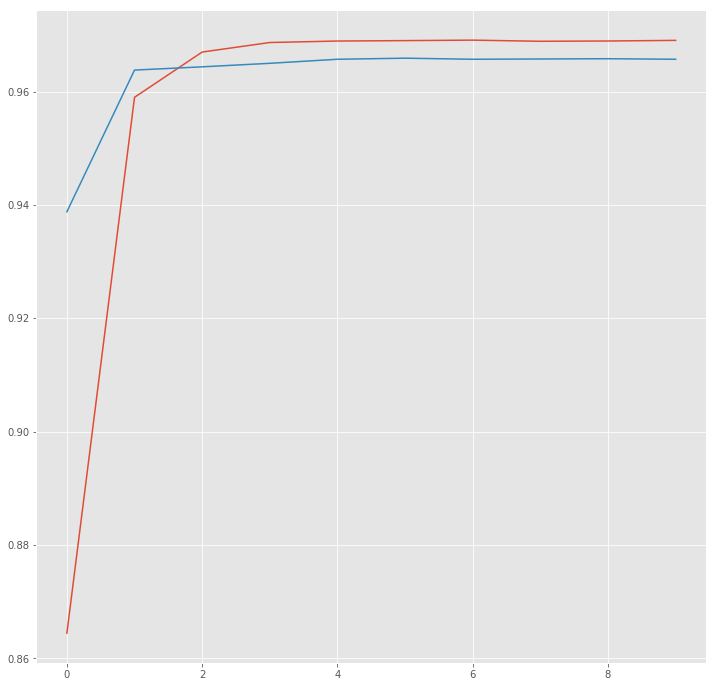

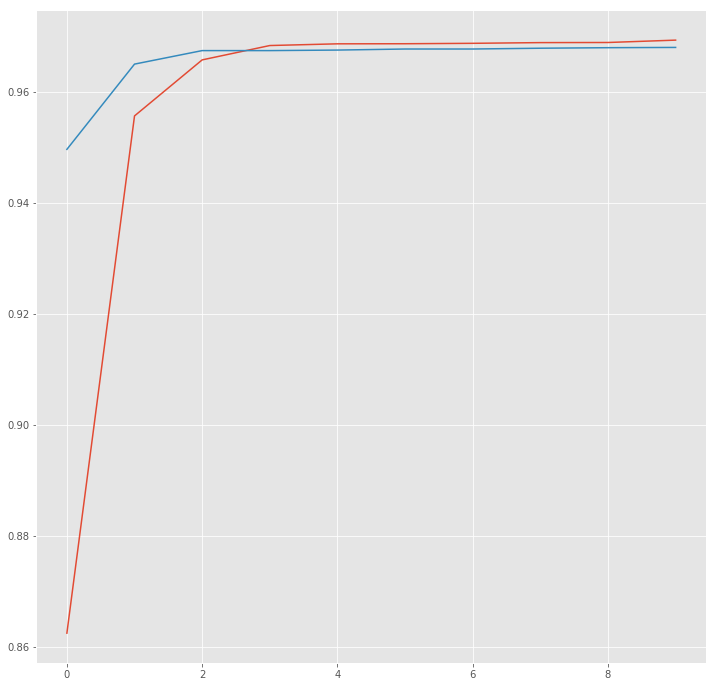

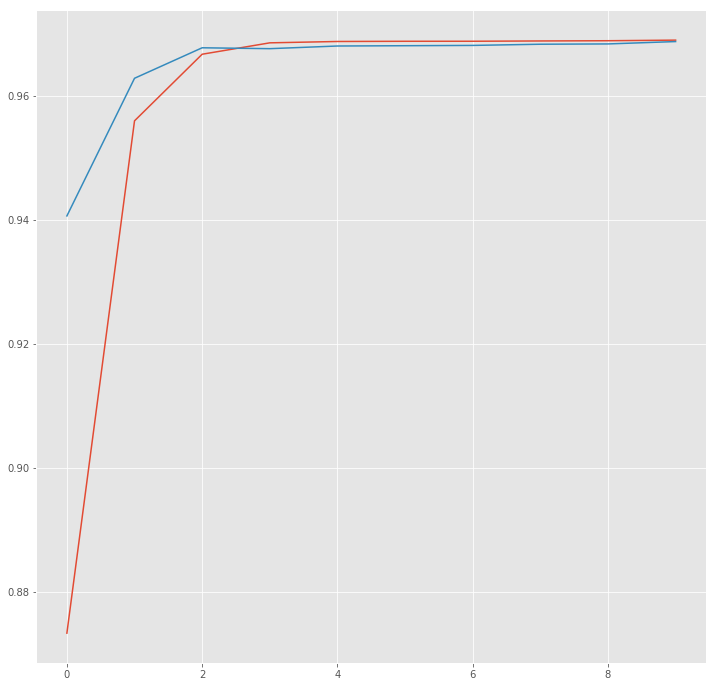

In [108]:
plot_histories(histories)

In [109]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_word=False, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): O
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): PAD
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): O
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של              (O

In [111]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_word=False, use_pos=False, use_gazet=False, use_char=True)

In [112]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 30 phrases; correct: 0.
accuracy:   0.67%; (non-O)
accuracy:  87.59%; precision:   0.00%; recall:   0.00%; FB1:   0.00
             DATE: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
              LOC: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
        MISC--AFF: precision:   0.00%; recall:   0.00%; FB1:   0.00  1
        MISC--ENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
       MISC-EVENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
            MONEY: precision:   0.00%; recall:   0.00%; FB1:   0.00  23
              ORG: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
          PERCENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  6
             PERS: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 15256 tokens with 1282 phrases; found: 44 phrases; correct: 8.
accuracy:   0.67%; (non-O)
accuracy:  87.34%; pr

### Train - Word + Char

In [116]:
models, histories = create_models_char(splits, use_word=True, use_pos=False, use_gaz=False, use_char=True, embed_dim=70, epochs=10)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 80, 10)       0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 80)           0                                            
__________________________________________________________________________________________________
time_distributed_37 (TimeDistri (None, 80, 10, 20)   2060        input_23[0][0]                   
__________________________________________________________________________________________________
embedding_22 (Embedding)        (None, 80, 70)       1312990     input_22[0][0]                   
__________________________________________________________________________________________________
time_distr

Epoch 3/10
2349/2349 [==============================] - ETA: 28s - loss: 0.1561 - acc: 0.96 - ETA: 27s - loss: 0.1268 - acc: 0.97 - ETA: 26s - loss: 0.1357 - acc: 0.96 - ETA: 26s - loss: 0.1333 - acc: 0.96 - ETA: 26s - loss: 0.1286 - acc: 0.97 - ETA: 25s - loss: 0.1366 - acc: 0.96 - ETA: 25s - loss: 0.1375 - acc: 0.96 - ETA: 24s - loss: 0.1411 - acc: 0.96 - ETA: 24s - loss: 0.1385 - acc: 0.96 - ETA: 24s - loss: 0.1400 - acc: 0.96 - ETA: 24s - loss: 0.1441 - acc: 0.96 - ETA: 24s - loss: 0.1458 - acc: 0.96 - ETA: 23s - loss: 0.1433 - acc: 0.96 - ETA: 23s - loss: 0.1427 - acc: 0.96 - ETA: 23s - loss: 0.1400 - acc: 0.96 - ETA: 22s - loss: 0.1399 - acc: 0.96 - ETA: 23s - loss: 0.1383 - acc: 0.96 - ETA: 22s - loss: 0.1370 - acc: 0.96 - ETA: 22s - loss: 0.1369 - acc: 0.96 - ETA: 22s - loss: 0.1377 - acc: 0.96 - ETA: 22s - loss: 0.1371 - acc: 0.96 - ETA: 22s - loss: 0.1368 - acc: 0.96 - ETA: 21s - loss: 0.1363 - acc: 0.96 - ETA: 21s - loss: 0.1347 - acc: 0.96 - ETA: 21s - loss: 0.1343 - acc: 0

2349/2349 [==============================] - ETA: 30s - loss: 0.0910 - acc: 0.97 - ETA: 27s - loss: 0.1158 - acc: 0.96 - ETA: 27s - loss: 0.1085 - acc: 0.96 - ETA: 27s - loss: 0.1062 - acc: 0.96 - ETA: 30s - loss: 0.1007 - acc: 0.96 - ETA: 30s - loss: 0.1000 - acc: 0.96 - ETA: 30s - loss: 0.0965 - acc: 0.97 - ETA: 30s - loss: 0.0951 - acc: 0.97 - ETA: 29s - loss: 0.0965 - acc: 0.97 - ETA: 28s - loss: 0.0956 - acc: 0.97 - ETA: 27s - loss: 0.0938 - acc: 0.97 - ETA: 27s - loss: 0.0917 - acc: 0.97 - ETA: 26s - loss: 0.0927 - acc: 0.97 - ETA: 25s - loss: 0.0943 - acc: 0.97 - ETA: 26s - loss: 0.0929 - acc: 0.97 - ETA: 25s - loss: 0.0937 - acc: 0.97 - ETA: 25s - loss: 0.0937 - acc: 0.97 - ETA: 25s - loss: 0.0945 - acc: 0.97 - ETA: 24s - loss: 0.0929 - acc: 0.97 - ETA: 23s - loss: 0.0928 - acc: 0.97 - ETA: 23s - loss: 0.0939 - acc: 0.97 - ETA: 22s - loss: 0.0944 - acc: 0.97 - ETA: 21s - loss: 0.0934 - acc: 0.97 - ETA: 21s - loss: 0.0938 - acc: 0.97 - ETA: 20s - loss: 0.0930 - acc: 0.97 - ETA: 

2349/2349 [==============================] - ETA: 27s - loss: 0.0659 - acc: 0.98 - ETA: 26s - loss: 0.0847 - acc: 0.97 - ETA: 26s - loss: 0.0767 - acc: 0.97 - ETA: 26s - loss: 0.0760 - acc: 0.97 - ETA: 25s - loss: 0.0760 - acc: 0.97 - ETA: 25s - loss: 0.0735 - acc: 0.98 - ETA: 24s - loss: 0.0705 - acc: 0.98 - ETA: 24s - loss: 0.0699 - acc: 0.98 - ETA: 24s - loss: 0.0713 - acc: 0.98 - ETA: 26s - loss: 0.0703 - acc: 0.98 - ETA: 28s - loss: 0.0693 - acc: 0.98 - ETA: 28s - loss: 0.0684 - acc: 0.98 - ETA: 29s - loss: 0.0685 - acc: 0.98 - ETA: 28s - loss: 0.0668 - acc: 0.98 - ETA: 27s - loss: 0.0654 - acc: 0.98 - ETA: 27s - loss: 0.0660 - acc: 0.98 - ETA: 26s - loss: 0.0665 - acc: 0.98 - ETA: 25s - loss: 0.0670 - acc: 0.98 - ETA: 24s - loss: 0.0665 - acc: 0.98 - ETA: 24s - loss: 0.0665 - acc: 0.98 - ETA: 24s - loss: 0.0677 - acc: 0.98 - ETA: 24s - loss: 0.0670 - acc: 0.98 - ETA: 24s - loss: 0.0669 - acc: 0.98 - ETA: 23s - loss: 0.0673 - acc: 0.98 - ETA: 22s - loss: 0.0671 - acc: 0.98 - ETA: 

2349/2349 [==============================] - ETA: 26s - loss: 0.0312 - acc: 0.99 - ETA: 25s - loss: 0.0370 - acc: 0.99 - ETA: 25s - loss: 0.0460 - acc: 0.98 - ETA: 25s - loss: 0.0516 - acc: 0.98 - ETA: 24s - loss: 0.0493 - acc: 0.98 - ETA: 24s - loss: 0.0518 - acc: 0.98 - ETA: 24s - loss: 0.0500 - acc: 0.98 - ETA: 23s - loss: 0.0495 - acc: 0.98 - ETA: 23s - loss: 0.0494 - acc: 0.98 - ETA: 23s - loss: 0.0488 - acc: 0.98 - ETA: 23s - loss: 0.0492 - acc: 0.98 - ETA: 22s - loss: 0.0490 - acc: 0.98 - ETA: 22s - loss: 0.0496 - acc: 0.98 - ETA: 22s - loss: 0.0514 - acc: 0.98 - ETA: 21s - loss: 0.0504 - acc: 0.98 - ETA: 21s - loss: 0.0504 - acc: 0.98 - ETA: 21s - loss: 0.0520 - acc: 0.98 - ETA: 20s - loss: 0.0513 - acc: 0.98 - ETA: 20s - loss: 0.0509 - acc: 0.98 - ETA: 20s - loss: 0.0504 - acc: 0.98 - ETA: 19s - loss: 0.0498 - acc: 0.98 - ETA: 19s - loss: 0.0496 - acc: 0.98 - ETA: 19s - loss: 0.0497 - acc: 0.98 - ETA: 18s - loss: 0.0495 - acc: 0.98 - ETA: 18s - loss: 0.0495 - acc: 0.98 - ETA: 

Train on 2349 samples, validate on 262 samples
Epoch 1/10
2349/2349 [==============================] - ETA: 10:09 - loss: 2.9493 - acc: 0.00 - ETA: 5:15 - loss: 2.8609 - acc: 0.3906 - ETA: 3:37 - loss: 2.7567 - acc: 0.525 - ETA: 2:47 - loss: 2.5549 - acc: 0.599 - ETA: 2:17 - loss: 2.2862 - acc: 0.631 - ETA: 1:58 - loss: 2.0358 - acc: 0.653 - ETA: 1:44 - loss: 1.8313 - acc: 0.674 - ETA: 1:32 - loss: 1.6652 - acc: 0.691 - ETA: 1:24 - loss: 1.5464 - acc: 0.698 - ETA: 1:17 - loss: 1.4274 - acc: 0.713 - ETA: 1:11 - loss: 1.3351 - acc: 0.723 - ETA: 1:06 - loss: 1.2558 - acc: 0.735 - ETA: 1:02 - loss: 1.1929 - acc: 0.746 - ETA: 58s - loss: 1.1309 - acc: 0.761 - ETA: 55s - loss: 1.0777 - acc: 0.77 - ETA: 52s - loss: 1.0344 - acc: 0.78 - ETA: 49s - loss: 0.9924 - acc: 0.78 - ETA: 47s - loss: 0.9590 - acc: 0.79 - ETA: 45s - loss: 0.9232 - acc: 0.80 - ETA: 43s - loss: 0.8898 - acc: 0.81 - ETA: 41s - loss: 0.8626 - acc: 0.81 - ETA: 39s - loss: 0.8361 - acc: 0.82 - ETA: 37s - loss: 0.8146 - acc: 0.

2349/2349 [==============================] - ETA: 28s - loss: 0.1354 - acc: 0.97 - ETA: 28s - loss: 0.1378 - acc: 0.97 - ETA: 27s - loss: 0.1339 - acc: 0.97 - ETA: 27s - loss: 0.1366 - acc: 0.97 - ETA: 27s - loss: 0.1335 - acc: 0.97 - ETA: 27s - loss: 0.1331 - acc: 0.97 - ETA: 30s - loss: 0.1321 - acc: 0.97 - ETA: 31s - loss: 0.1306 - acc: 0.97 - ETA: 32s - loss: 0.1351 - acc: 0.97 - ETA: 32s - loss: 0.1373 - acc: 0.97 - ETA: 31s - loss: 0.1391 - acc: 0.97 - ETA: 30s - loss: 0.1378 - acc: 0.97 - ETA: 29s - loss: 0.1349 - acc: 0.97 - ETA: 28s - loss: 0.1360 - acc: 0.97 - ETA: 28s - loss: 0.1372 - acc: 0.97 - ETA: 27s - loss: 0.1358 - acc: 0.97 - ETA: 26s - loss: 0.1357 - acc: 0.97 - ETA: 25s - loss: 0.1374 - acc: 0.97 - ETA: 25s - loss: 0.1390 - acc: 0.97 - ETA: 24s - loss: 0.1395 - acc: 0.97 - ETA: 24s - loss: 0.1373 - acc: 0.97 - ETA: 23s - loss: 0.1359 - acc: 0.97 - ETA: 23s - loss: 0.1350 - acc: 0.97 - ETA: 22s - loss: 0.1363 - acc: 0.97 - ETA: 22s - loss: 0.1380 - acc: 0.97 - ETA: 

2349/2349 [==============================] - ETA: 29s - loss: 0.1155 - acc: 0.96 - ETA: 28s - loss: 0.1247 - acc: 0.96 - ETA: 28s - loss: 0.1076 - acc: 0.96 - ETA: 27s - loss: 0.1065 - acc: 0.96 - ETA: 28s - loss: 0.0988 - acc: 0.97 - ETA: 28s - loss: 0.0978 - acc: 0.97 - ETA: 27s - loss: 0.0966 - acc: 0.97 - ETA: 26s - loss: 0.0950 - acc: 0.97 - ETA: 26s - loss: 0.0943 - acc: 0.97 - ETA: 26s - loss: 0.0930 - acc: 0.97 - ETA: 25s - loss: 0.0908 - acc: 0.97 - ETA: 25s - loss: 0.0935 - acc: 0.97 - ETA: 24s - loss: 0.0953 - acc: 0.97 - ETA: 24s - loss: 0.0962 - acc: 0.97 - ETA: 23s - loss: 0.0967 - acc: 0.97 - ETA: 23s - loss: 0.0959 - acc: 0.97 - ETA: 22s - loss: 0.0944 - acc: 0.97 - ETA: 22s - loss: 0.0927 - acc: 0.97 - ETA: 22s - loss: 0.0949 - acc: 0.97 - ETA: 21s - loss: 0.0955 - acc: 0.97 - ETA: 21s - loss: 0.0963 - acc: 0.97 - ETA: 20s - loss: 0.0965 - acc: 0.97 - ETA: 20s - loss: 0.0960 - acc: 0.97 - ETA: 20s - loss: 0.0957 - acc: 0.97 - ETA: 19s - loss: 0.0948 - acc: 0.97 - ETA: 

2349/2349 [==============================] - ETA: 29s - loss: 0.0707 - acc: 0.97 - ETA: 28s - loss: 0.0735 - acc: 0.97 - ETA: 28s - loss: 0.0729 - acc: 0.97 - ETA: 27s - loss: 0.0737 - acc: 0.97 - ETA: 27s - loss: 0.0786 - acc: 0.97 - ETA: 28s - loss: 0.0718 - acc: 0.97 - ETA: 29s - loss: 0.0704 - acc: 0.97 - ETA: 29s - loss: 0.0665 - acc: 0.98 - ETA: 29s - loss: 0.0630 - acc: 0.98 - ETA: 28s - loss: 0.0646 - acc: 0.98 - ETA: 28s - loss: 0.0620 - acc: 0.98 - ETA: 27s - loss: 0.0634 - acc: 0.98 - ETA: 27s - loss: 0.0619 - acc: 0.98 - ETA: 27s - loss: 0.0626 - acc: 0.98 - ETA: 26s - loss: 0.0626 - acc: 0.98 - ETA: 26s - loss: 0.0637 - acc: 0.98 - ETA: 25s - loss: 0.0638 - acc: 0.98 - ETA: 25s - loss: 0.0642 - acc: 0.98 - ETA: 25s - loss: 0.0638 - acc: 0.98 - ETA: 24s - loss: 0.0631 - acc: 0.98 - ETA: 24s - loss: 0.0631 - acc: 0.98 - ETA: 24s - loss: 0.0635 - acc: 0.98 - ETA: 24s - loss: 0.0641 - acc: 0.98 - ETA: 23s - loss: 0.0647 - acc: 0.98 - ETA: 23s - loss: 0.0642 - acc: 0.98 - ETA: 

2349/2349 [==============================] - ETA: 46s - loss: 0.0419 - acc: 0.98 - ETA: 52s - loss: 0.0517 - acc: 0.98 - ETA: 52s - loss: 0.0465 - acc: 0.98 - ETA: 46s - loss: 0.0489 - acc: 0.98 - ETA: 42s - loss: 0.0473 - acc: 0.98 - ETA: 39s - loss: 0.0461 - acc: 0.98 - ETA: 37s - loss: 0.0487 - acc: 0.98 - ETA: 36s - loss: 0.0462 - acc: 0.98 - ETA: 34s - loss: 0.0482 - acc: 0.98 - ETA: 33s - loss: 0.0466 - acc: 0.98 - ETA: 32s - loss: 0.0462 - acc: 0.98 - ETA: 31s - loss: 0.0445 - acc: 0.98 - ETA: 30s - loss: 0.0439 - acc: 0.98 - ETA: 30s - loss: 0.0445 - acc: 0.98 - ETA: 29s - loss: 0.0460 - acc: 0.98 - ETA: 29s - loss: 0.0452 - acc: 0.98 - ETA: 28s - loss: 0.0454 - acc: 0.98 - ETA: 28s - loss: 0.0458 - acc: 0.98 - ETA: 27s - loss: 0.0457 - acc: 0.98 - ETA: 26s - loss: 0.0456 - acc: 0.98 - ETA: 26s - loss: 0.0451 - acc: 0.98 - ETA: 25s - loss: 0.0466 - acc: 0.98 - ETA: 25s - loss: 0.0471 - acc: 0.98 - ETA: 24s - loss: 0.0474 - acc: 0.98 - ETA: 23s - loss: 0.0474 - acc: 0.98 - ETA: 

Train on 2349 samples, validate on 262 samples
Epoch 1/10
2349/2349 [==============================] - ETA: 12:10 - loss: 2.9142 - acc: 0.21 - ETA: 6:16 - loss: 2.8114 - acc: 0.5125 - ETA: 4:18 - loss: 2.6804 - acc: 0.600 - ETA: 3:18 - loss: 2.4710 - acc: 0.649 - ETA: 2:43 - loss: 2.1498 - acc: 0.684 - ETA: 2:19 - loss: 1.9227 - acc: 0.699 - ETA: 2:01 - loss: 1.7424 - acc: 0.712 - ETA: 1:48 - loss: 1.5944 - acc: 0.724 - ETA: 1:38 - loss: 1.4802 - acc: 0.731 - ETA: 1:30 - loss: 1.3797 - acc: 0.736 - ETA: 1:24 - loss: 1.3002 - acc: 0.746 - ETA: 1:18 - loss: 1.2256 - acc: 0.757 - ETA: 1:13 - loss: 1.1713 - acc: 0.766 - ETA: 1:08 - loss: 1.1159 - acc: 0.777 - ETA: 1:05 - loss: 1.0623 - acc: 0.787 - ETA: 1:01 - loss: 1.0224 - acc: 0.795 - ETA: 58s - loss: 0.9814 - acc: 0.803 - ETA: 55s - loss: 0.9485 - acc: 0.80 - ETA: 53s - loss: 0.9167 - acc: 0.81 - ETA: 50s - loss: 0.8841 - acc: 0.82 - ETA: 48s - loss: 0.8590 - acc: 0.82 - ETA: 46s - loss: 0.8307 - acc: 0.83 - ETA: 44s - loss: 0.8084 - a

2349/2349 [==============================] - ETA: 35s - loss: 0.1230 - acc: 0.97 - ETA: 34s - loss: 0.1365 - acc: 0.97 - ETA: 34s - loss: 0.1359 - acc: 0.97 - ETA: 33s - loss: 0.1452 - acc: 0.96 - ETA: 33s - loss: 0.1419 - acc: 0.96 - ETA: 32s - loss: 0.1426 - acc: 0.96 - ETA: 32s - loss: 0.1385 - acc: 0.96 - ETA: 31s - loss: 0.1397 - acc: 0.96 - ETA: 31s - loss: 0.1441 - acc: 0.96 - ETA: 30s - loss: 0.1441 - acc: 0.96 - ETA: 30s - loss: 0.1461 - acc: 0.96 - ETA: 30s - loss: 0.1434 - acc: 0.96 - ETA: 29s - loss: 0.1419 - acc: 0.96 - ETA: 29s - loss: 0.1416 - acc: 0.96 - ETA: 28s - loss: 0.1391 - acc: 0.96 - ETA: 28s - loss: 0.1378 - acc: 0.96 - ETA: 27s - loss: 0.1405 - acc: 0.96 - ETA: 27s - loss: 0.1428 - acc: 0.96 - ETA: 26s - loss: 0.1435 - acc: 0.96 - ETA: 26s - loss: 0.1409 - acc: 0.96 - ETA: 26s - loss: 0.1419 - acc: 0.96 - ETA: 25s - loss: 0.1414 - acc: 0.96 - ETA: 25s - loss: 0.1403 - acc: 0.96 - ETA: 24s - loss: 0.1405 - acc: 0.96 - ETA: 24s - loss: 0.1394 - acc: 0.96 - ETA: 

2349/2349 [==============================] - ETA: 53s - loss: 0.0786 - acc: 0.97 - ETA: 45s - loss: 0.0938 - acc: 0.97 - ETA: 41s - loss: 0.0910 - acc: 0.97 - ETA: 39s - loss: 0.0966 - acc: 0.97 - ETA: 37s - loss: 0.1001 - acc: 0.97 - ETA: 36s - loss: 0.0953 - acc: 0.97 - ETA: 35s - loss: 0.0925 - acc: 0.97 - ETA: 34s - loss: 0.0938 - acc: 0.97 - ETA: 33s - loss: 0.0965 - acc: 0.97 - ETA: 32s - loss: 0.0989 - acc: 0.97 - ETA: 32s - loss: 0.0969 - acc: 0.97 - ETA: 31s - loss: 0.0957 - acc: 0.97 - ETA: 31s - loss: 0.0945 - acc: 0.97 - ETA: 30s - loss: 0.0943 - acc: 0.97 - ETA: 29s - loss: 0.0925 - acc: 0.97 - ETA: 29s - loss: 0.0930 - acc: 0.97 - ETA: 28s - loss: 0.0938 - acc: 0.97 - ETA: 28s - loss: 0.0917 - acc: 0.97 - ETA: 29s - loss: 0.0902 - acc: 0.97 - ETA: 29s - loss: 0.0900 - acc: 0.97 - ETA: 28s - loss: 0.0899 - acc: 0.97 - ETA: 28s - loss: 0.0908 - acc: 0.97 - ETA: 27s - loss: 0.0903 - acc: 0.97 - ETA: 27s - loss: 0.0892 - acc: 0.97 - ETA: 26s - loss: 0.0890 - acc: 0.97 - ETA: 

2349/2349 [==============================] - ETA: 32s - loss: 0.0672 - acc: 0.98 - ETA: 32s - loss: 0.0649 - acc: 0.98 - ETA: 31s - loss: 0.0666 - acc: 0.97 - ETA: 31s - loss: 0.0632 - acc: 0.98 - ETA: 30s - loss: 0.0592 - acc: 0.98 - ETA: 31s - loss: 0.0632 - acc: 0.98 - ETA: 31s - loss: 0.0606 - acc: 0.98 - ETA: 31s - loss: 0.0601 - acc: 0.98 - ETA: 31s - loss: 0.0581 - acc: 0.98 - ETA: 30s - loss: 0.0589 - acc: 0.98 - ETA: 30s - loss: 0.0584 - acc: 0.98 - ETA: 31s - loss: 0.0578 - acc: 0.98 - ETA: 31s - loss: 0.0585 - acc: 0.98 - ETA: 35s - loss: 0.0584 - acc: 0.98 - ETA: 36s - loss: 0.0581 - acc: 0.98 - ETA: 35s - loss: 0.0593 - acc: 0.98 - ETA: 34s - loss: 0.0593 - acc: 0.98 - ETA: 33s - loss: 0.0602 - acc: 0.98 - ETA: 33s - loss: 0.0607 - acc: 0.98 - ETA: 32s - loss: 0.0601 - acc: 0.98 - ETA: 32s - loss: 0.0595 - acc: 0.98 - ETA: 32s - loss: 0.0599 - acc: 0.98 - ETA: 31s - loss: 0.0594 - acc: 0.98 - ETA: 30s - loss: 0.0595 - acc: 0.98 - ETA: 29s - loss: 0.0587 - acc: 0.98 - ETA: 

2349/2349 [==============================] - ETA: 35s - loss: 0.0389 - acc: 0.98 - ETA: 34s - loss: 0.0419 - acc: 0.98 - ETA: 33s - loss: 0.0417 - acc: 0.98 - ETA: 32s - loss: 0.0437 - acc: 0.98 - ETA: 32s - loss: 0.0438 - acc: 0.98 - ETA: 32s - loss: 0.0426 - acc: 0.98 - ETA: 31s - loss: 0.0453 - acc: 0.98 - ETA: 31s - loss: 0.0458 - acc: 0.98 - ETA: 30s - loss: 0.0453 - acc: 0.98 - ETA: 30s - loss: 0.0443 - acc: 0.98 - ETA: 30s - loss: 0.0434 - acc: 0.98 - ETA: 31s - loss: 0.0421 - acc: 0.98 - ETA: 30s - loss: 0.0441 - acc: 0.98 - ETA: 30s - loss: 0.0438 - acc: 0.98 - ETA: 29s - loss: 0.0434 - acc: 0.98 - ETA: 28s - loss: 0.0434 - acc: 0.98 - ETA: 28s - loss: 0.0433 - acc: 0.98 - ETA: 27s - loss: 0.0450 - acc: 0.98 - ETA: 27s - loss: 0.0461 - acc: 0.98 - ETA: 26s - loss: 0.0455 - acc: 0.98 - ETA: 26s - loss: 0.0460 - acc: 0.98 - ETA: 25s - loss: 0.0463 - acc: 0.98 - ETA: 25s - loss: 0.0463 - acc: 0.98 - ETA: 24s - loss: 0.0460 - acc: 0.98 - ETA: 24s - loss: 0.0457 - acc: 0.98 - ETA: 

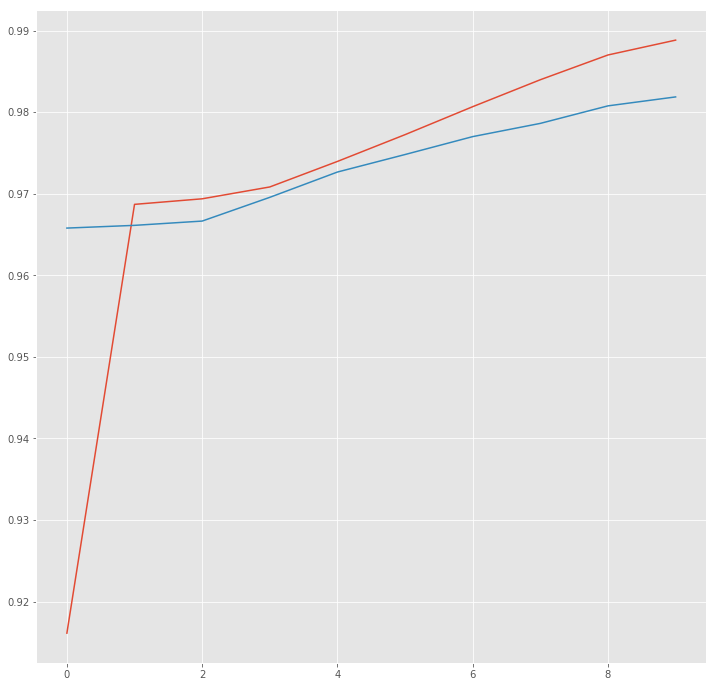

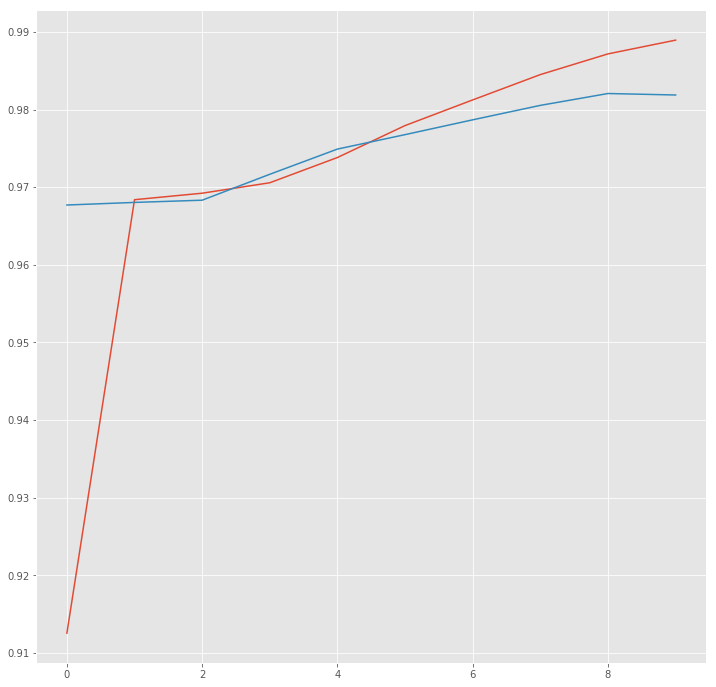

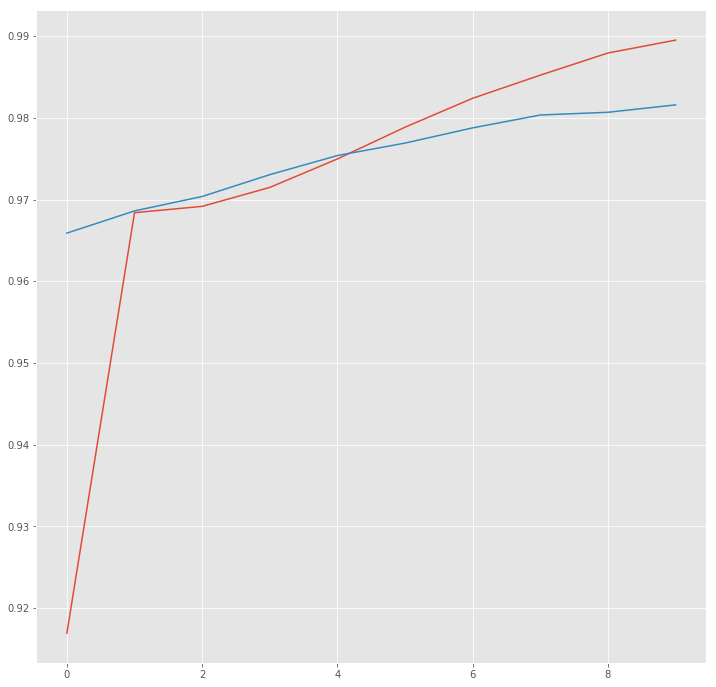

In [117]:
plot_histories(histories)

In [118]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_word=True, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_LOC
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_PERS
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [119]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_word=True, use_pos=False, use_gazet=False, use_char=True)

In [120]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1164 phrases; correct: 599.
accuracy:  55.46%; (non-O)
accuracy:  93.08%; precision:  51.46%; recall:  46.72%; FB1:  48.98
             DATE: precision:  40.40%; recall:  39.22%; FB1:  39.80  99
              LOC: precision:  57.80%; recall:  42.71%; FB1:  49.12  218
        MISC--AFF: precision:  74.64%; recall:  61.68%; FB1:  67.54  138
        MISC--ENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
       MISC-EVENT: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
            MONEY: precision:  58.14%; recall:  53.19%; FB1:  55.56  43
              ORG: precision:  31.73%; recall:  38.98%; FB1:  34.98  312
          PERCENT: precision:  51.06%; recall:  44.44%; FB1:  47.52  47
             PERS: precision:  59.28%; recall:  55.32%; FB1:  57.23  307
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 15256 tokens with 1282 phrases; found: 1218 phrases; correct: 589.
accuracy:  54.23%; (non-O)
acc

### Train - POS + Char

In [ ]:
models, histories = create_models_char(splits, use_word=False, use_pos=True, use_gaz=False, use_char=True, embed_dim=70, epochs=10)

In [ ]:
plot_histories(histories)

In [ ]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_word=False, use_pos=True, use_gazet=False, use_char=True)

In [ ]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_word=False, use_pos=True, use_gazet=False, use_char=True)

In [ ]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

### Train - POS, no pre-trained word embeddings

In [150]:
models, histories = create_models_char(splits, use_pos=True, use_gaz=False, use_char=True, embed_dim=70, epochs=20)

Train on 2349 samples, validate on 262 samples
Epoch 1/20
2349/2349 [==============================] - 49s 21ms/step - loss: 0.4249 - acc: 0.9119 - val_loss: 0.1838 - val_acc: 0.9659
Epoch 2/20
2349/2349 [==============================] - 40s 17ms/step - loss: 0.1546 - acc: 0.9690 - val_loss: 0.1528 - val_acc: 0.9661
Epoch 3/20
2349/2349 [==============================] - 39s 17ms/step - loss: 0.1220 - acc: 0.9698 - val_loss: 0.1180 - val_acc: 0.9702
Epoch 4/20
2349/2349 [==============================] - 39s 16ms/step - loss: 0.0933 - acc: 0.9738 - val_loss: 0.0986 - val_acc: 0.9739
Epoch 5/20
2349/2349 [==============================] - 38s 16ms/step - loss: 0.0781 - acc: 0.9776 - val_loss: 0.0896 - val_acc: 0.9765
Epoch 6/20
2349/2349 [==============================] - 38s 16ms/step - loss: 0.0657 - acc: 0.9817 - val_loss: 0.0820 - val_acc: 0.9792
Epoch 7/20
2349/2349 [==============================] - 40s 17ms/step - loss: 0.0558 - acc: 0.9847 - val_loss: 0.0765 - val_acc: 0.9810
E

Epoch 20/20
2349/2349 [==============================] - 54s 23ms/step - loss: 0.0094 - acc: 0.9974 - val_loss: 0.0684 - val_acc: 0.9846


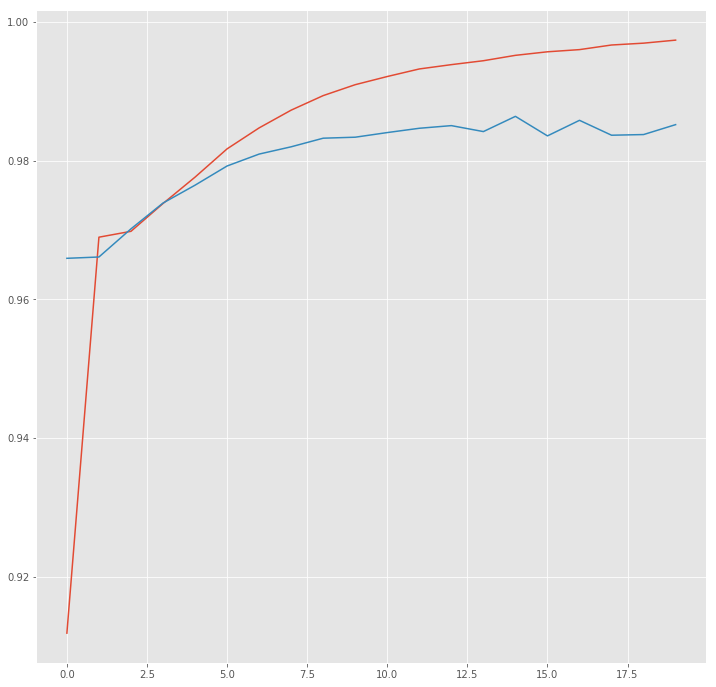

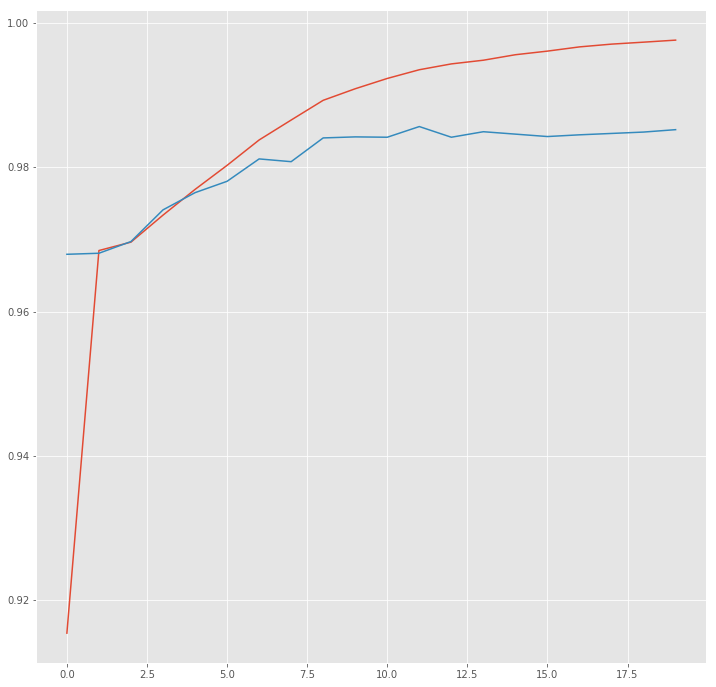

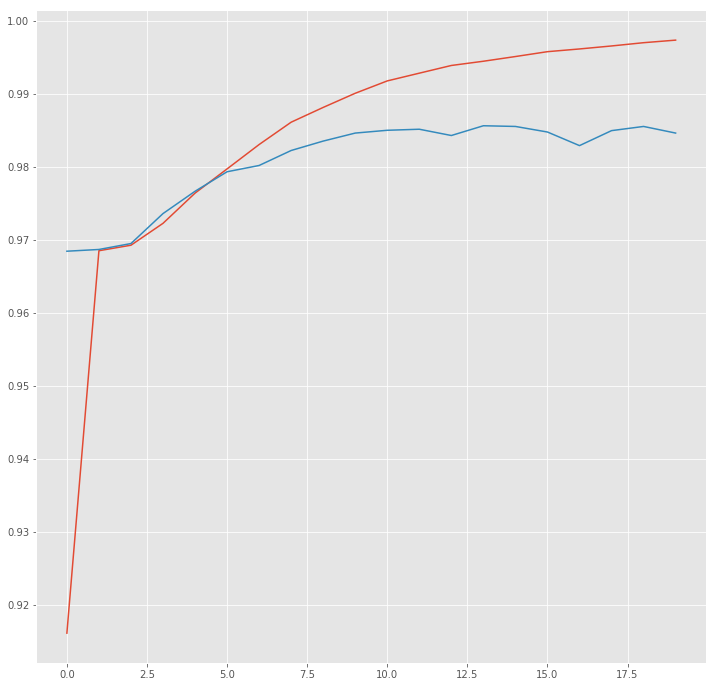

In [151]:
plot_histories(histories)

In [156]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=True, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של   

In [159]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=True, use_gazet=False, use_char=True)

In [160]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1357 phrases; correct: 825.
accuracy:  72.81%; (non-O)
accuracy:  94.42%; precision:  60.80%; recall:  64.35%; FB1:  62.52
             DATE: precision:  60.36%; recall:  65.69%; FB1:  62.91  111
              LOC: precision:  66.31%; recall:  63.39%; FB1:  64.82  282
        MISC--AFF: precision:  69.14%; recall:  72.46%; FB1:  70.76  175
        MISC--ENT: precision:  10.71%; recall:  42.86%; FB1:  17.14  56
       MISC-EVENT: precision:  23.08%; recall:  33.33%; FB1:  27.27  13
            MONEY: precision:  73.58%; recall:  82.98%; FB1:  78.00  53
              ORG: precision:  45.16%; recall:  49.61%; FB1:  47.28  279
          PERCENT: precision:  77.78%; recall:  90.74%; FB1:  83.76  63
             PERS: precision:  70.72%; recall:  69.00%; FB1:  69.85  321
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  4
processed 15256 tokens with 1282 phrases; found: 1296 phrases; correct: 815.
accuracy:  70.00%; (non-O)


### Train - POS, pre-trained embeddings with crf

In [173]:
models, histories = create_models_char(splits, use_pos=True, use_gaz=False, use_char=True, embedding_matrix=embedding_matrix, embed_dim=embed_dim, epochs=12, crf=True)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 176s 75ms/step - loss: 0.3120 - crf_accuracy: 0.9333 - val_loss: 0.1097 - val_crf_accuracy: 0.9695
Epoch 2/12
2349/2349 [==============================] - 153s 65ms/step - loss: 0.0818 - crf_accuracy: 0.9780 - val_loss: 0.0708 - val_crf_accuracy: 0.9817
Epoch 3/12
2349/2349 [==============================] - 152s 65ms/step - loss: 0.0542 - crf_accuracy: 0.9853 - val_loss: 0.0585 - val_crf_accuracy: 0.9844
Epoch 4/12
2349/2349 [==============================] - 151s 64ms/step - loss: 0.0416 - crf_accuracy: 0.9881 - val_loss: 0.0462 - val_crf_accuracy: 0.9875
Epoch 5/12
2349/2349 [==============================] - 152s 65ms/step - loss: 0.0328 - crf_accuracy: 0.9902 - val_loss: 0.0400 - val_crf_accuracy: 0.9889
Epoch 6/12
2349/2349 [==============================] - 150s 64ms/step - loss: 0.0264 - crf_accuracy: 0.9916 - val_loss: 0.0375 - val_crf_accuracy: 0.9893
Epoch 7/12
2349/2349 [=

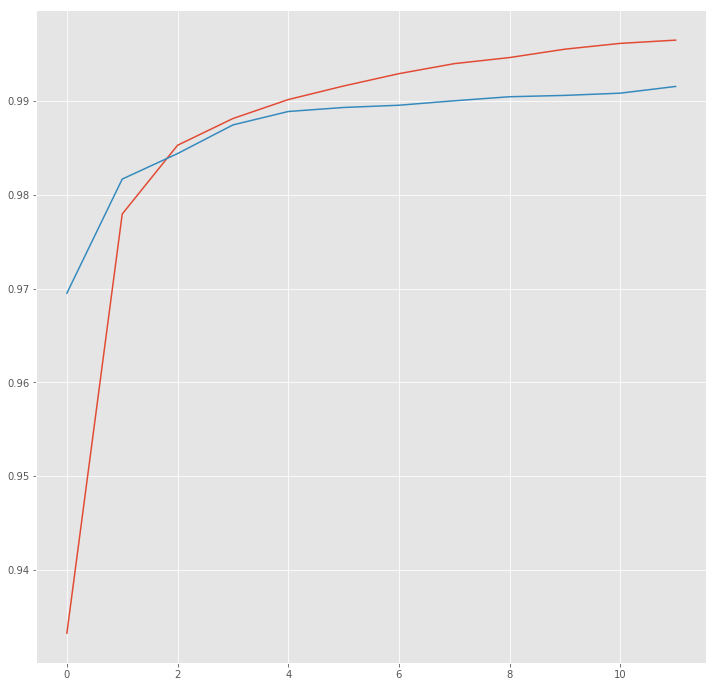

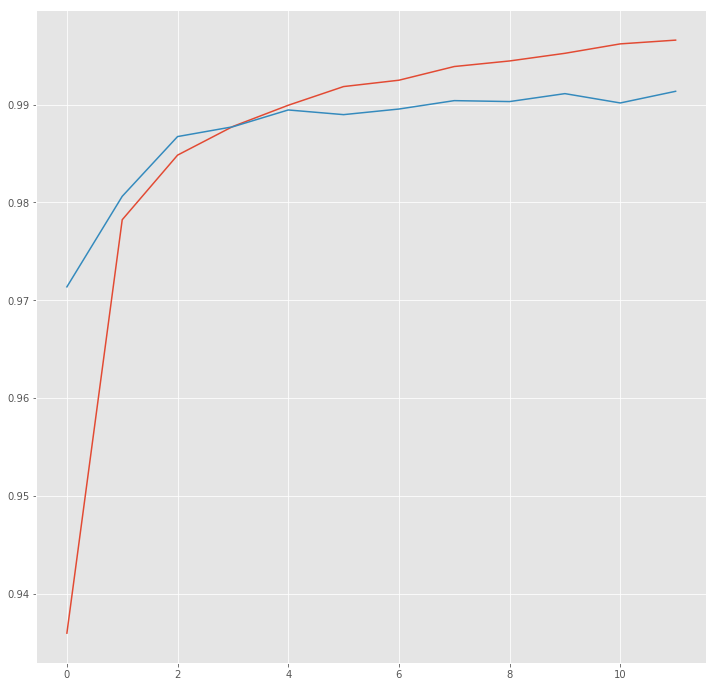

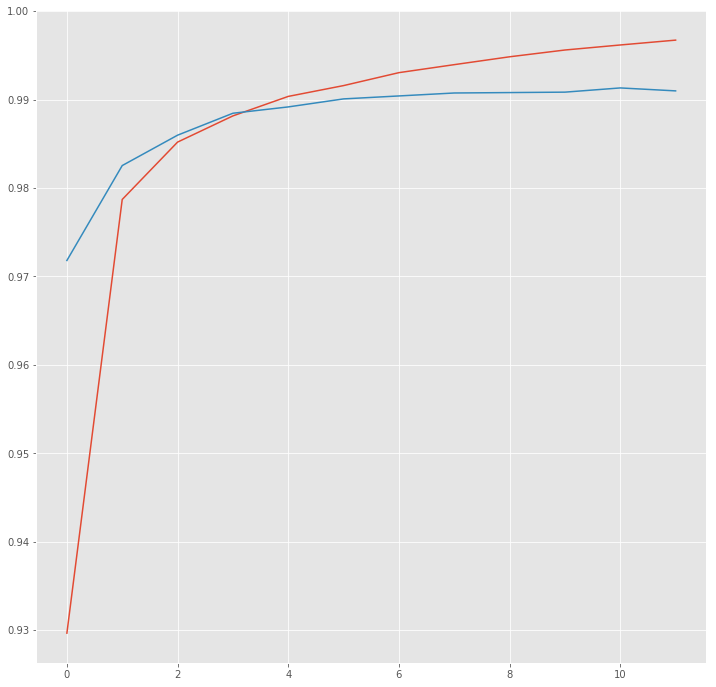

In [178]:
plot_histories_crf(histories)

In [179]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=True, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של        

In [180]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=True, use_gazet=False, use_char=True)

In [181]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1246 phrases; correct: 967.
accuracy:  82.29%; (non-O)
accuracy:  96.99%; precision:  77.61%; recall:  75.43%; FB1:  76.50
             DATE: precision:  71.70%; recall:  74.51%; FB1:  73.08  106
              LOC: precision:  76.51%; recall:  72.88%; FB1:  74.65  281
        MISC--AFF: precision:  90.00%; recall:  91.62%; FB1:  90.80  170
        MISC--ENT: precision:  62.50%; recall:  35.71%; FB1:  45.45  8
       MISC-EVENT: precision:  50.00%; recall:  66.67%; FB1:  57.14  12
            MONEY: precision:  80.77%; recall:  89.36%; FB1:  84.85  52
              ORG: precision:  67.36%; recall:  63.39%; FB1:  65.31  239
          PERCENT: precision:  89.09%; recall:  90.74%; FB1:  89.91  55
             PERS: precision:  80.94%; recall:  78.72%; FB1:  79.82  320
             TIME: precision:  33.33%; recall:   9.09%; FB1:  14.29  3
processed 15256 tokens with 1282 phrases; found: 1360 phrases; correct: 960.
accuracy:  83.25%; (non-O)
a

In [183]:
for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    print(classification_report(cat_y_te, cat_preds))

             precision    recall  f1-score   support

        LOC       0.77      0.73      0.75       295
       DATE       0.72      0.75      0.73       102
        ORG       0.67      0.63      0.65       254
        ENT       0.62      0.36      0.45        14
       PERS       0.81      0.79      0.80       329
      MONEY       0.81      0.89      0.85        47
    PERCENT       0.89      0.91      0.90        54
      EVENT       0.50      0.67      0.57         9
        AFF       0.90      0.92      0.91       167
       TIME       0.33      0.09      0.14        11

avg / total       0.77      0.75      0.76      1282

             precision    recall  f1-score   support

        LOC       0.59      0.72      0.65       288
       PERS       0.80      0.83      0.81       304
        ORG       0.62      0.60      0.61       275
        AFF       0.91      0.86      0.88       172
    PERCENT       0.85      0.93      0.88        54
      MONEY       0.86      0.85      0.85

In [185]:
new_hist = []
for (word_split, char_split), model in zip(zip(splits,splits_char), models):
    X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
    X_char_tr, X_char_te, _, _ = char_split
    history = model.fit([X_tr, pos_tr, np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))], np.array(y_tr), batch_size=32, epochs=2, validation_split=0.1, verbose=1)
    hist = pd.DataFrame(history.history)
    new_hist.append(hist)


Train on 2349 samples, validate on 262 samples
Epoch 1/2
2349/2349 [==============================] - 174s 74ms/step - loss: 0.0010 - crf_accuracy: 0.9971 - val_loss: 0.0264 - val_crf_accuracy: 0.9910
Epoch 2/2
2349/2349 [==============================] - 174s 74ms/step - loss: -0.0011 - crf_accuracy: 0.9975 - val_loss: 0.0256 - val_crf_accuracy: 0.9917
Train on 2349 samples, validate on 262 samples
Epoch 1/2
2349/2349 [==============================] - 172s 73ms/step - loss: -8.9981e-05 - crf_accuracy: 0.9972 - val_loss: 0.0199 - val_crf_accuracy: 0.9914
Epoch 2/2
2349/2349 [==============================] - 172s 73ms/step - loss: -0.0024 - crf_accuracy: 0.9976 - val_loss: 0.0197 - val_crf_accuracy: 0.9917
Train on 2349 samples, validate on 262 samples
Epoch 1/2
2349/2349 [==============================] - 171s 73ms/step - loss: -0.0029 - crf_accuracy: 0.9972 - val_loss: 0.0141 - val_crf_accuracy: 0.9916
Epoch 2/2
2349/2349 [==============================] - 171s 73ms/step - loss: -0.

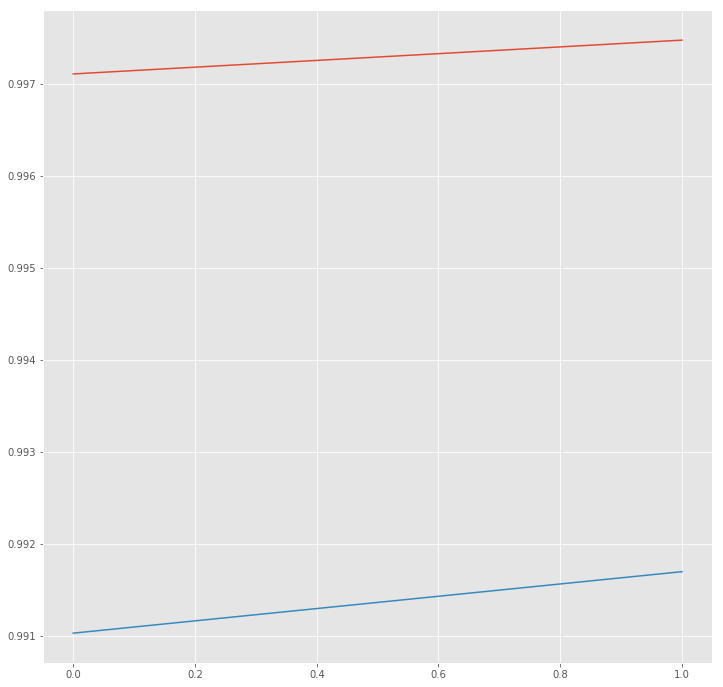

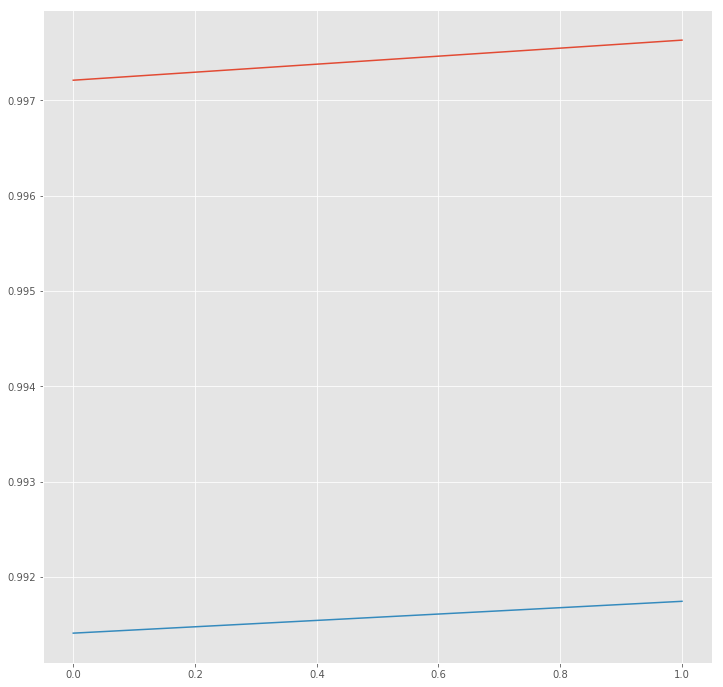

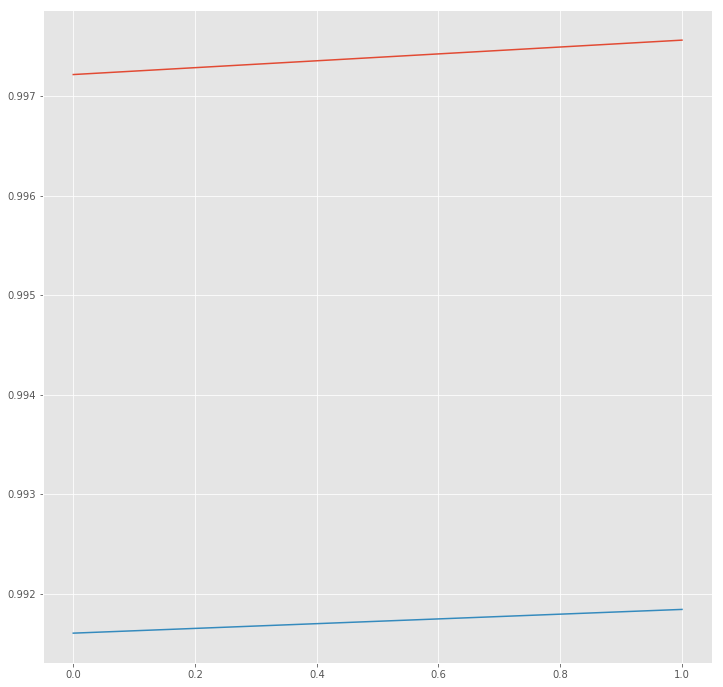

In [186]:
plot_histories_crf(new_hist)

In [187]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=True, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של        

In [188]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=True, use_gazet=False, use_char=True)

In [189]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1223 phrases; correct: 969.
accuracy:  81.00%; (non-O)
accuracy:  97.04%; precision:  79.23%; recall:  75.59%; FB1:  77.37
             DATE: precision:  74.76%; recall:  75.49%; FB1:  75.12  103
              LOC: precision:  75.33%; recall:  76.61%; FB1:  75.97  300
        MISC--AFF: precision:  92.02%; recall:  89.82%; FB1:  90.91  163
        MISC--ENT: precision:  46.15%; recall:  42.86%; FB1:  44.44  13
       MISC-EVENT: precision:  50.00%; recall:  66.67%; FB1:  57.14  12
            MONEY: precision:  89.58%; recall:  91.49%; FB1:  90.53  48
              ORG: precision:  70.67%; recall:  62.60%; FB1:  66.39  225
          PERCENT: precision:  87.27%; recall:  88.89%; FB1:  88.07  55
             PERS: precision:  84.28%; recall:  76.60%; FB1:  80.25  299
             TIME: precision:  40.00%; recall:  18.18%; FB1:  25.00  5
processed 15256 tokens with 1282 phrases; found: 1257 phrases; correct: 975.
accuracy:  81.44%; (non-O)


In [190]:
new_hist = []
for (word_split, char_split), model in zip(zip(splits,splits_char), models):
    X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
    X_char_tr, X_char_te, _, _ = char_split
    history = model.fit([X_tr, pos_tr, np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))], np.array(y_tr), batch_size=32, epochs=2, validation_split=0.1, verbose=1)
    hist = pd.DataFrame(history.history)
    new_hist.append(hist)


Train on 2349 samples, validate on 262 samples
Epoch 1/2
2349/2349 [==============================] - 186s 79ms/step - loss: -0.0031 - crf_accuracy: 0.9978 - val_loss: 0.0228 - val_crf_accuracy: 0.9907
Epoch 2/2
2349/2349 [==============================] - 175s 74ms/step - loss: -0.0049 - crf_accuracy: 0.9981 - val_loss: 0.0229 - val_crf_accuracy: 0.9913
Train on 2349 samples, validate on 262 samples
Epoch 1/2
2349/2349 [==============================] - 188s 80ms/step - loss: -0.0041 - crf_accuracy: 0.9978 - val_loss: 0.0171 - val_crf_accuracy: 0.9918
Epoch 2/2
2349/2349 [==============================] - 195s 83ms/step - loss: -0.0061 - crf_accuracy: 0.9983 - val_loss: 0.0197 - val_crf_accuracy: 0.9918
Train on 2349 samples, validate on 262 samples
Epoch 1/2
2349/2349 [==============================] - 200s 85ms/step - loss: -0.0071 - crf_accuracy: 0.9979 - val_loss: 0.0161 - val_crf_accuracy: 0.9919
Epoch 2/2
2349/2349 [==============================] - 181s 77ms/step - loss: -0.008

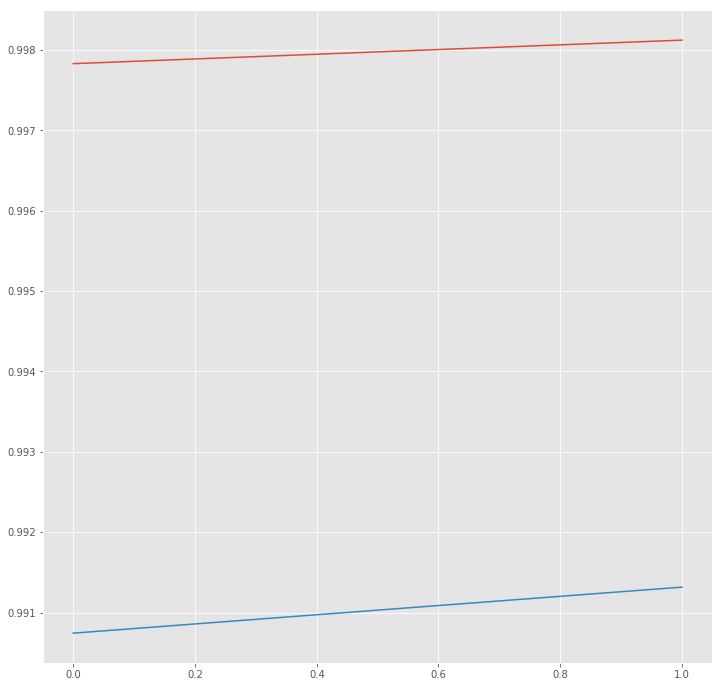

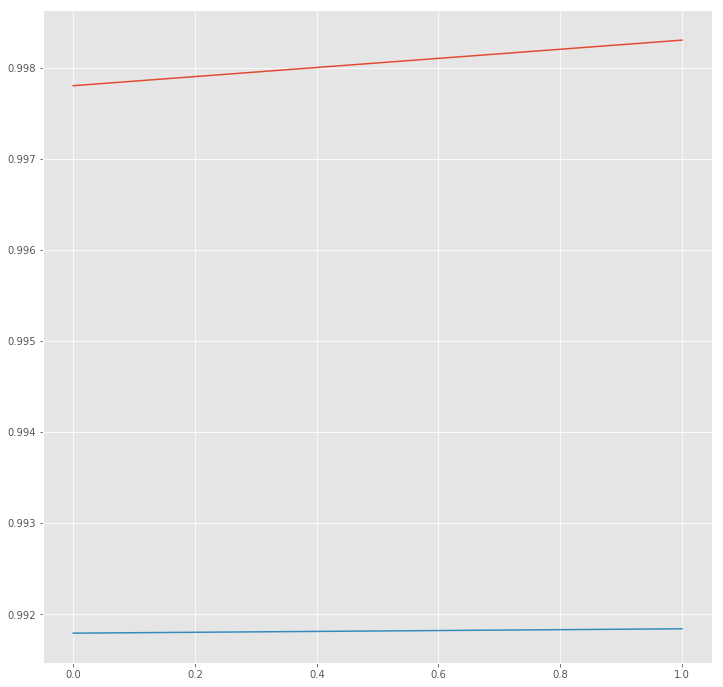

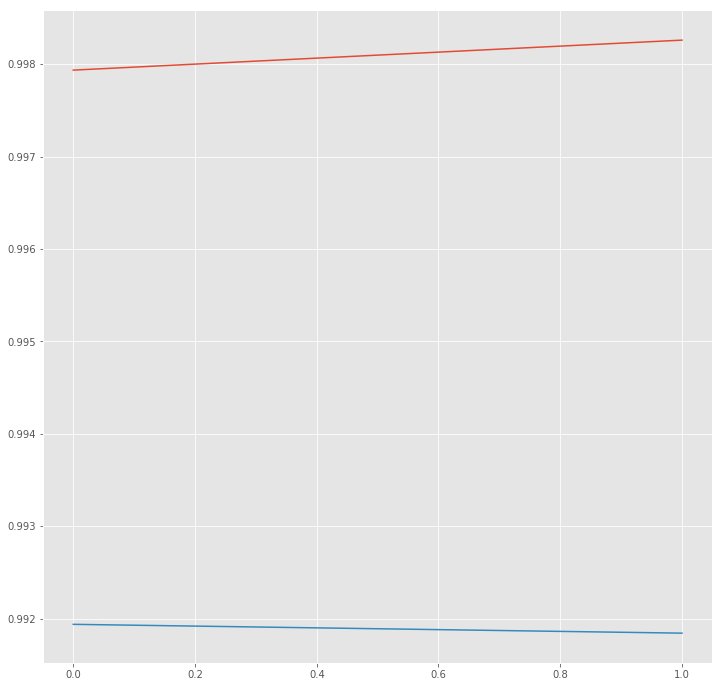

In [191]:
plot_histories_crf(new_hist)

In [192]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=True, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של        

In [193]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=True, use_gazet=False, use_char=True)

In [194]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1303 phrases; correct: 1003.
accuracy:  84.86%; (non-O)
accuracy:  97.01%; precision:  76.98%; recall:  78.24%; FB1:  77.60
             DATE: precision:  74.11%; recall:  81.37%; FB1:  77.57  112
              LOC: precision:  75.16%; recall:  77.97%; FB1:  76.54  306
        MISC--AFF: precision:  93.21%; recall:  90.42%; FB1:  91.79  162
        MISC--ENT: precision:  50.00%; recall:  42.86%; FB1:  46.15  12
       MISC-EVENT: precision:  42.86%; recall:  66.67%; FB1:  52.17  14
            MONEY: precision:  89.80%; recall:  93.62%; FB1:  91.67  49
              ORG: precision:  63.20%; recall:  66.93%; FB1:  65.01  269
          PERCENT: precision:  94.23%; recall:  90.74%; FB1:  92.45  52
             PERS: precision:  81.17%; recall:  79.94%; FB1:  80.55  324
             TIME: precision:  33.33%; recall:   9.09%; FB1:  14.29  3
processed 15256 tokens with 1282 phrases; found: 1230 phrases; correct: 953.
accuracy:  79.48%; (non-O)

### Train - pre-trained embeddings with crf, no POS

In [195]:
models, histories = create_models_char(splits, use_pos=False, use_gaz=False, use_char=True, embedding_matrix=embedding_matrix, embed_dim=embed_dim, epochs=12, crf=True)

Train on 2349 samples, validate on 262 samples
Epoch 1/12
2349/2349 [==============================] - 188s 80ms/step - loss: 0.3171 - crf_accuracy: 0.9335 - val_loss: 0.1145 - val_crf_accuracy: 0.9686
Epoch 2/12
2349/2349 [==============================] - 169s 72ms/step - loss: 0.0819 - crf_accuracy: 0.9777 - val_loss: 0.0767 - val_crf_accuracy: 0.9794
Epoch 3/12
2349/2349 [==============================] - 171s 73ms/step - loss: 0.0541 - crf_accuracy: 0.9847 - val_loss: 0.0537 - val_crf_accuracy: 0.9849
Epoch 4/12
2349/2349 [==============================] - 172s 73ms/step - loss: 0.0411 - crf_accuracy: 0.9877 - val_loss: 0.0460 - val_crf_accuracy: 0.9864
Epoch 5/12
2349/2349 [==============================] - 169s 72ms/step - loss: 0.0324 - crf_accuracy: 0.9892 - val_loss: 0.0411 - val_crf_accuracy: 0.9870
Epoch 6/12
2349/2349 [==============================] - 180s 77ms/step - loss: 0.0252 - crf_accuracy: 0.9911 - val_loss: 0.0398 - val_crf_accuracy: 0.9881
Epoch 7/12
2349/2349 [=

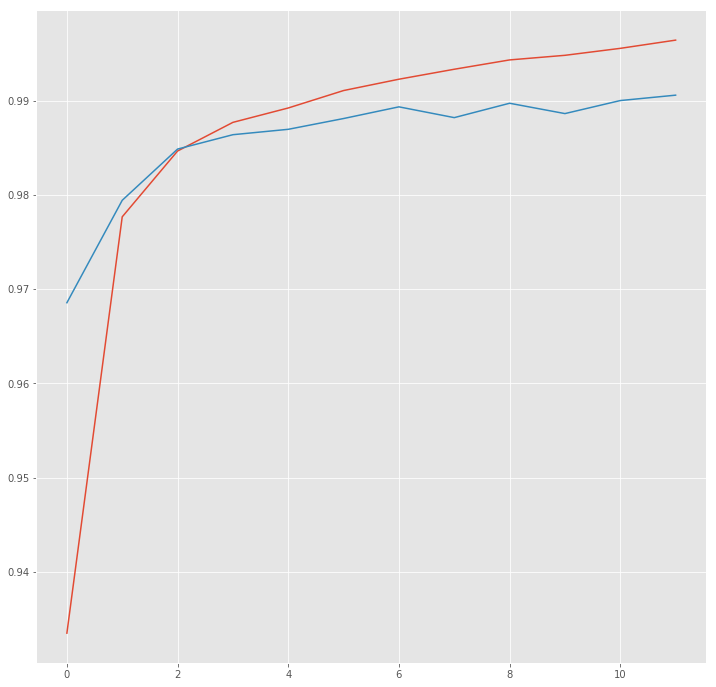

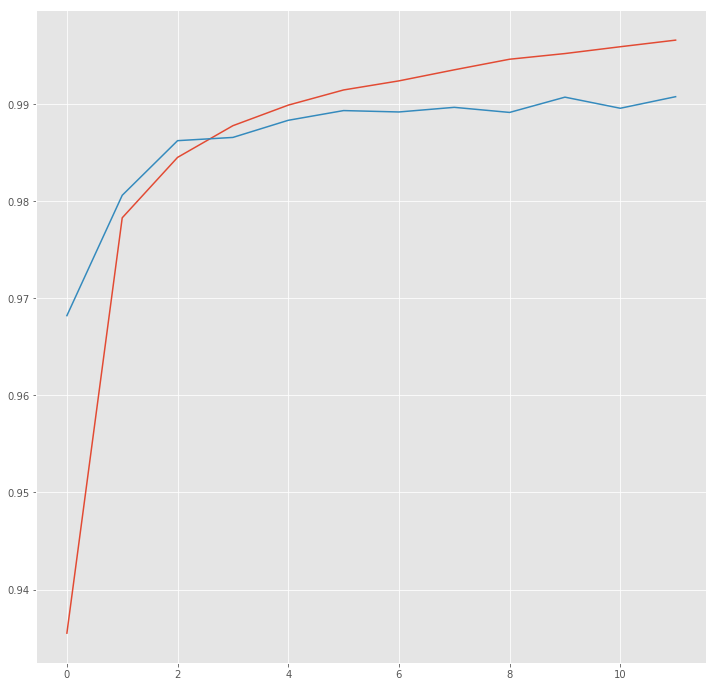

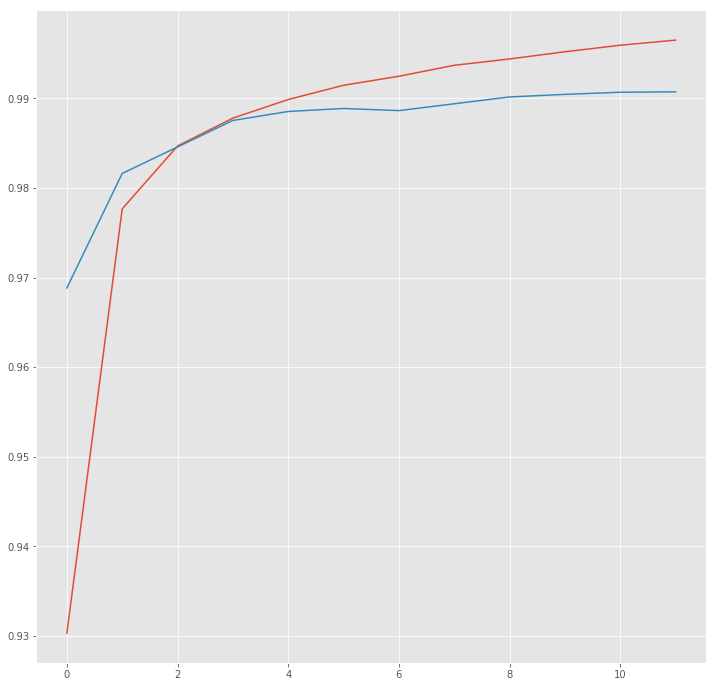

In [196]:
plot_histories_crf(histories)

In [198]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): I_ORG
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
ש

In [199]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [200]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1300 phrases; correct: 963.
accuracy:  83.63%; (non-O)
accuracy:  96.69%; precision:  74.08%; recall:  75.12%; FB1:  74.59
             DATE: precision:  68.32%; recall:  67.65%; FB1:  67.98  101
              LOC: precision:  72.88%; recall:  72.88%; FB1:  72.88  295
        MISC--AFF: precision:  91.67%; recall:  92.22%; FB1:  91.94  168
        MISC--ENT: precision:  28.00%; recall:  50.00%; FB1:  35.90  25
       MISC-EVENT: precision:  40.00%; recall:  66.67%; FB1:  50.00  15
            MONEY: precision:  90.00%; recall:  95.74%; FB1:  92.78  50
              ORG: precision:  64.90%; recall:  62.60%; FB1:  63.73  245
          PERCENT: precision:  81.82%; recall:  83.33%; FB1:  82.57  55
             PERS: precision:  76.76%; recall:  79.33%; FB1:  78.03  340
             TIME: precision:  33.33%; recall:  18.18%; FB1:  23.53  6
processed 15256 tokens with 1282 phrases; found: 1232 phrases; correct: 963.
accuracy:  80.41%; (non-O)


In [201]:
new_hist = []
for (word_split, char_split), model in zip(zip(splits,splits_char), models):
    X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
    X_char_tr, X_char_te, _, _ = char_split
    history = model.fit([X_tr, np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))], np.array(y_tr), batch_size=32, epochs=5, validation_split=0.1, verbose=1)
    hist = pd.DataFrame(history.history)
    new_hist.append(hist)


Train on 2349 samples, validate on 262 samples
Epoch 1/5
2349/2349 [==============================] - 236s 100ms/step - loss: -7.2025e-04 - crf_accuracy: 0.9968 - val_loss: 0.0232 - val_crf_accuracy: 0.9906
Epoch 2/5
2349/2349 [==============================] - 236s 101ms/step - loss: -0.0030 - crf_accuracy: 0.9972 - val_loss: 0.0220 - val_crf_accuracy: 0.9906
Epoch 3/5
2349/2349 [==============================] - 229s 97ms/step - loss: -0.0053 - crf_accuracy: 0.9975 - val_loss: 0.0213 - val_crf_accuracy: 0.9912
Epoch 4/5
2349/2349 [==============================] - 215s 91ms/step - loss: -0.0073 - crf_accuracy: 0.9979 - val_loss: 0.0236 - val_crf_accuracy: 0.9916
Epoch 5/5
2349/2349 [==============================] - 207s 88ms/step - loss: -0.0090 - crf_accuracy: 0.9984 - val_loss: 0.0212 - val_crf_accuracy: 0.9908
Train on 2349 samples, validate on 262 samples
Epoch 1/5
2349/2349 [==============================] - 213s 91ms/step - loss: 9.7378e-04 - crf_accuracy: 0.9969 - val_loss: 0

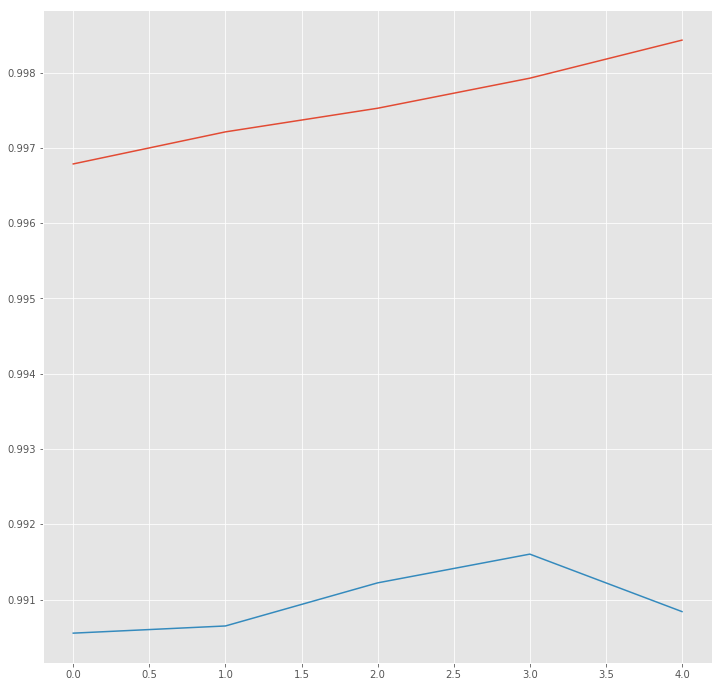

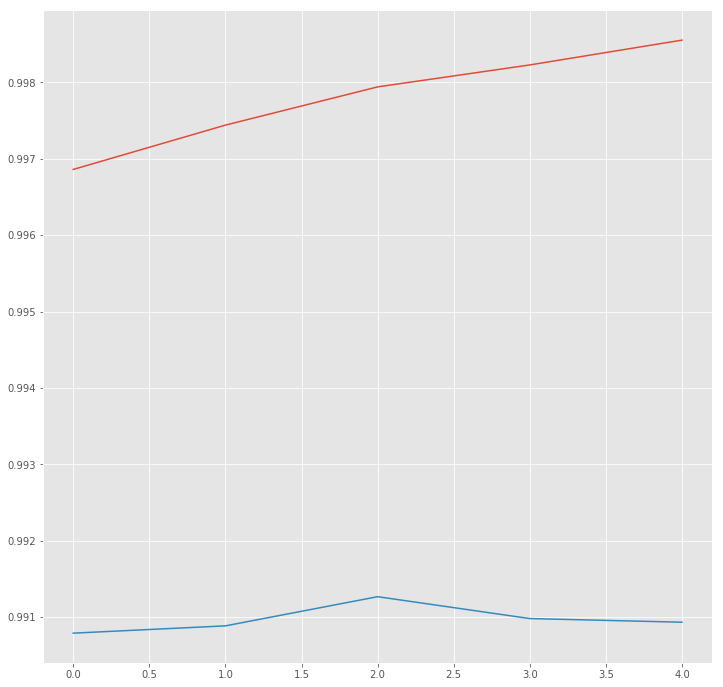

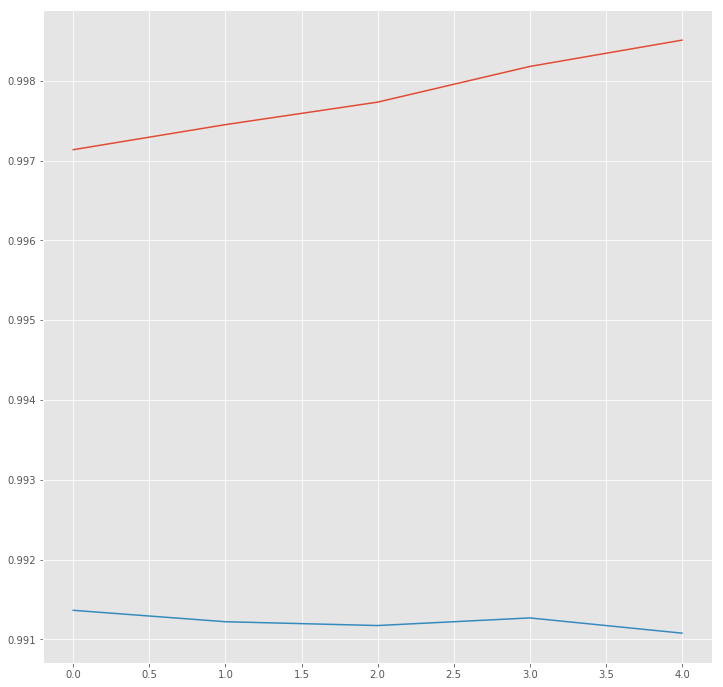

In [202]:
plot_histories_crf(new_hist)

In [204]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [205]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [206]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1323 phrases; correct: 999.
accuracy:  85.27%; (non-O)
accuracy:  96.85%; precision:  75.51%; recall:  77.93%; FB1:  76.70
             DATE: precision:  74.77%; recall:  78.43%; FB1:  76.56  107
              LOC: precision:  72.64%; recall:  78.31%; FB1:  75.37  318
        MISC--AFF: precision:  90.48%; recall:  91.02%; FB1:  90.75  168
        MISC--ENT: precision:  35.71%; recall:  71.43%; FB1:  47.62  28
       MISC-EVENT: precision:  40.00%; recall:  66.67%; FB1:  50.00  15
            MONEY: precision:  86.54%; recall:  95.74%; FB1:  90.91  52
              ORG: precision:  64.92%; recall:  63.39%; FB1:  64.14  248
          PERCENT: precision:  85.19%; recall:  85.19%; FB1:  85.19  54
             PERS: precision:  81.42%; recall:  79.94%; FB1:  80.67  323
             TIME: precision:  50.00%; recall:  45.45%; FB1:  47.62  10
processed 15256 tokens with 1282 phrases; found: 1299 phrases; correct: 1001.
accuracy:  82.68%; (non-O

### Freeze embeddings

In [46]:
models, histories = create_models_char(splits, use_pos=False, use_gaz=False, use_char=True, embedding_matrix=embedding_matrix, trainable=False, embed_dim=embed_dim, epochs=12, crf=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 80, 10)       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 80)           0                                            
__________________________________________________________________________________________________
time_distributed_4 (TimeDistrib (None, 80, 10, 20)   2060        input_4[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 80, 300)      5627100     input_3[0][0]                    
__________________________________________________________________________________________________
time_distr

2349/2349 [==============================] - 36s 15ms/step - loss: 0.0284 - crf_accuracy: 0.9881 - val_loss: 0.0324 - val_crf_accuracy: 0.9863
Epoch 9/12
2349/2349 [==============================] - 35s 15ms/step - loss: 0.0243 - crf_accuracy: 0.9891 - val_loss: 0.0259 - val_crf_accuracy: 0.9880
Epoch 10/12
2349/2349 [==============================] - 34s 14ms/step - loss: 0.0210 - crf_accuracy: 0.9899 - val_loss: 0.0276 - val_crf_accuracy: 0.9877
Epoch 11/12
2349/2349 [==============================] - 34s 14ms/step - loss: 0.0180 - crf_accuracy: 0.9907 - val_loss: 0.0250 - val_crf_accuracy: 0.9885
Epoch 12/12
2349/2349 [==============================] - 29s 12ms/step - loss: 0.0148 - crf_accuracy: 0.9911 - val_loss: 0.0209 - val_crf_accuracy: 0.9895
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 8

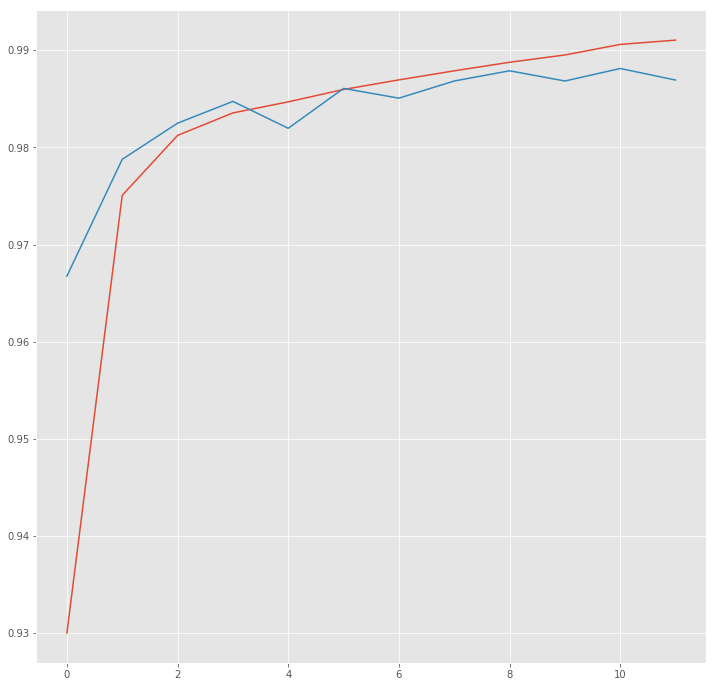

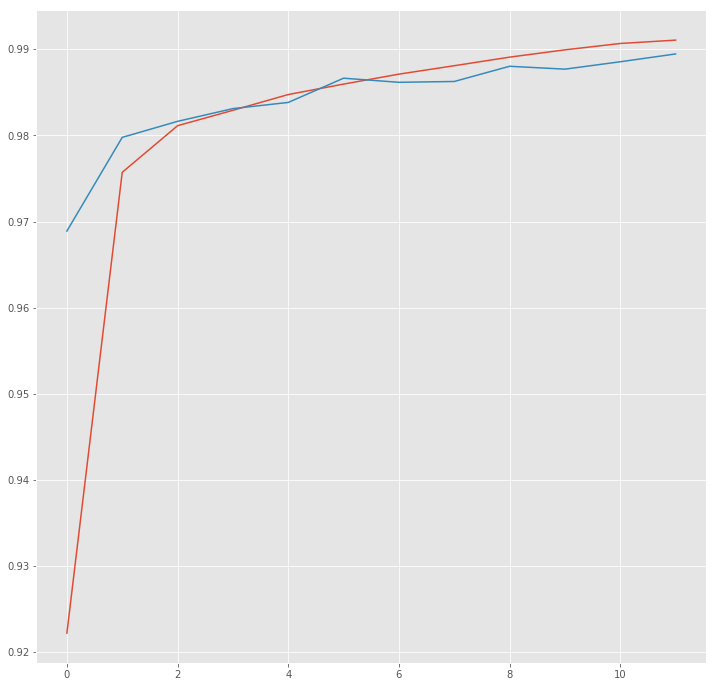

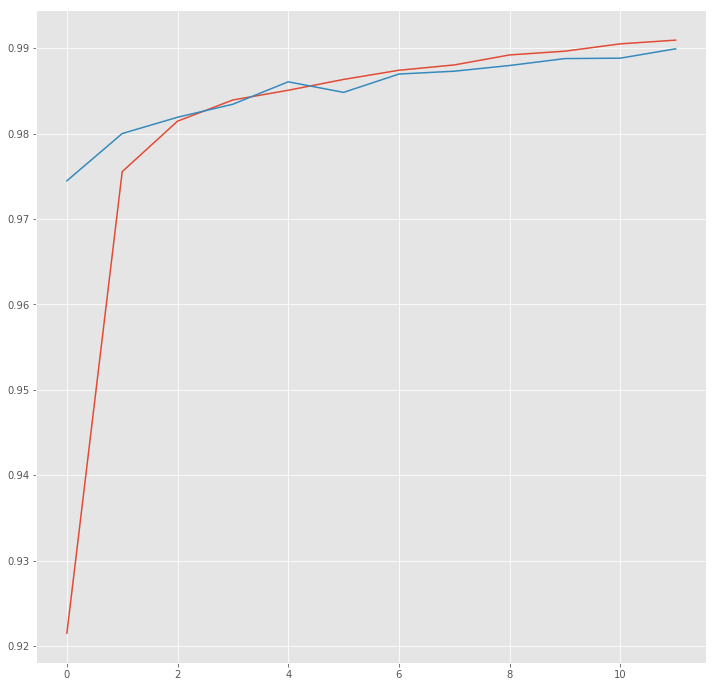

In [52]:
plot_histories_crf(histories)

In [53]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): I_ORG
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [54]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [55]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 977 phrases; correct: 747.
accuracy:  63.95%; (non-O)
accuracy:  95.05%; precision:  76.46%; recall:  58.27%; FB1:  66.14
             DATE: precision:  64.29%; recall:  52.94%; FB1:  58.06  84
              LOC: precision:  72.43%; recall:  59.66%; FB1:  65.43  243
        MISC--AFF: precision:  92.00%; recall:  82.63%; FB1:  87.07  150
        MISC--ENT: precision: 100.00%; recall:  14.29%; FB1:  25.00  2
       MISC-EVENT: precision:  60.00%; recall:  33.33%; FB1:  42.86  5
            MONEY: precision:  82.35%; recall:  89.36%; FB1:  85.71  51
              ORG: precision:  63.04%; recall:  22.83%; FB1:  33.53  92
          PERCENT: precision:  89.13%; recall:  75.93%; FB1:  82.00  46
             PERS: precision:  76.64%; recall:  70.82%; FB1:  73.62  304
             TIME: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
processed 15256 tokens with 1282 phrases; found: 1206 phrases; correct: 864.
accuracy:  77.53%; (non-O)
accur

In [66]:
new_hist = []
for (word_split, char_split), model in zip(zip(splits,splits_char), models):
    X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
    X_char_tr, X_char_te, _, _ = char_split
    history = model.fit([X_tr, np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))], np.array(y_tr), batch_size=32, epochs=10, validation_split=0.1, verbose=1)
    hist = pd.DataFrame(history.history)
    new_hist.append(hist)


Train on 2349 samples, validate on 262 samples
Epoch 1/10
2349/2349 [==============================] - 33s 14ms/step - loss: -0.0176 - crf_accuracy: 0.9978 - val_loss: 0.0126 - val_crf_accuracy: 0.9902
Epoch 2/10
2349/2349 [==============================] - 36s 15ms/step - loss: -0.0188 - crf_accuracy: 0.9979 - val_loss: 0.0105 - val_crf_accuracy: 0.9903
Epoch 3/10
2349/2349 [==============================] - 34s 15ms/step - loss: -0.0199 - crf_accuracy: 0.9978 - val_loss: 0.0108 - val_crf_accuracy: 0.9903
Epoch 4/10
2349/2349 [==============================] - 34s 15ms/step - loss: -0.0215 - crf_accuracy: 0.9982 - val_loss: 0.0118 - val_crf_accuracy: 0.9902
Epoch 5/10
2349/2349 [==============================] - 34s 14ms/step - loss: -0.0229 - crf_accuracy: 0.9983 - val_loss: 0.0133 - val_crf_accuracy: 0.9900
Epoch 6/10
2349/2349 [==============================] - 34s 14ms/step - loss: -0.0240 - crf_accuracy: 0.9984 - val_loss: 0.0122 - val_crf_accuracy: 0.9901
Epoch 7/10
2349/2349 [=

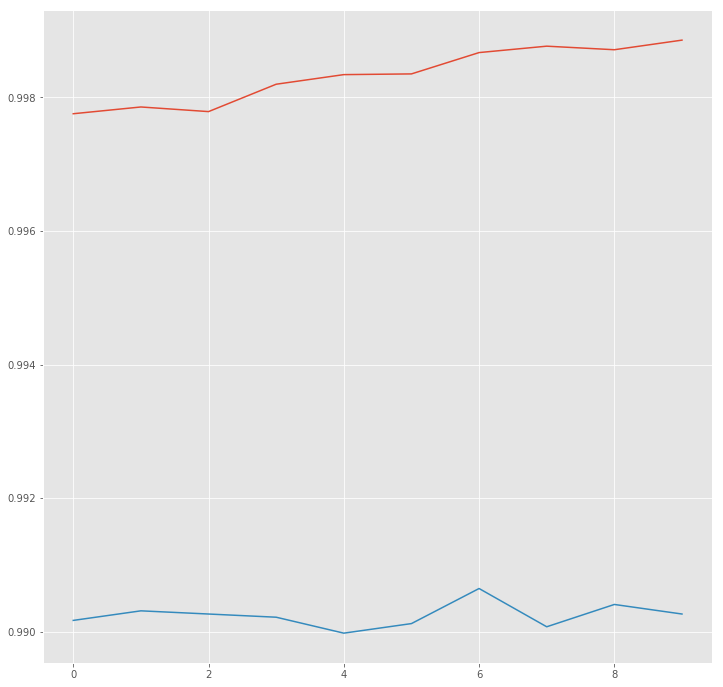

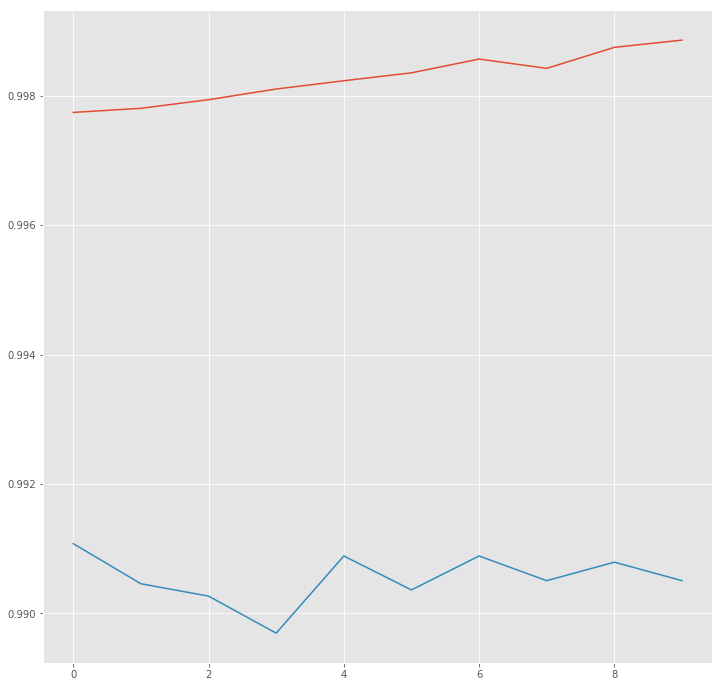

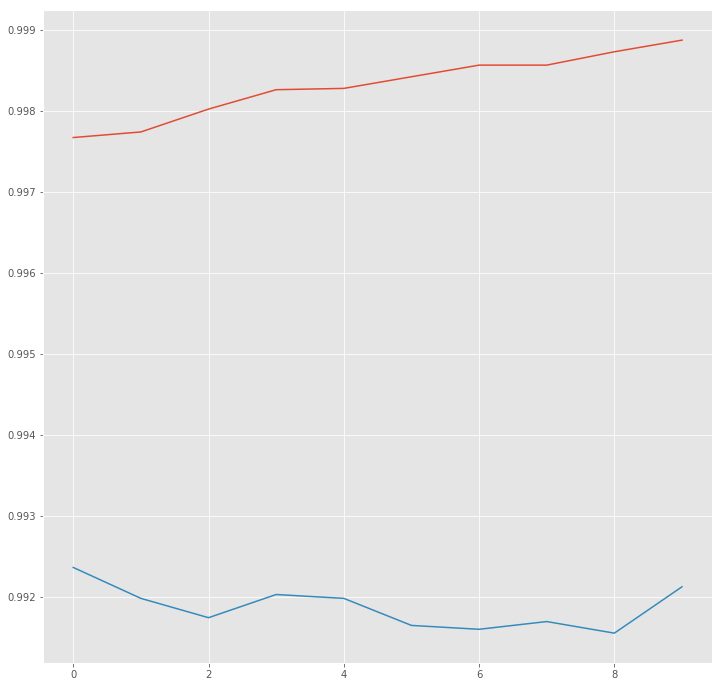

In [67]:
plot_histories_crf(new_hist)

In [68]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): O
הגיוס           (O    ): O
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של            

In [69]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [70]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1273 phrases; correct: 975.
accuracy:  83.11%; (non-O)
accuracy:  96.65%; precision:  76.59%; recall:  76.05%; FB1:  76.32
             DATE: precision:  79.80%; recall:  77.45%; FB1:  78.61  99
              LOC: precision:  78.78%; recall:  74.24%; FB1:  76.44  278
        MISC--AFF: precision:  90.53%; recall:  91.62%; FB1:  91.07  169
        MISC--ENT: precision:  37.93%; recall:  78.57%; FB1:  51.16  29
       MISC-EVENT: precision:  57.14%; recall:  88.89%; FB1:  69.57  14
            MONEY: precision:  86.27%; recall:  93.62%; FB1:  89.80  51
              ORG: precision:  60.77%; recall:  62.20%; FB1:  61.48  260
          PERCENT: precision:  90.74%; recall:  90.74%; FB1:  90.74  54
             PERS: precision:  80.19%; recall:  76.29%; FB1:  78.19  313
             TIME: precision:  50.00%; recall:  27.27%; FB1:  35.29  6
processed 15256 tokens with 1282 phrases; found: 1201 phrases; correct: 957.
accuracy:  79.38%; (non-O)
a

### Cross

In [154]:
models, histories = create_models_char(splits, use_pos=False, use_gaz=False, use_char=True, 
                                       embedding_matrix=embedding_matrix, embed_dim=embed_dim, 
                                       epochs=20, crf=True, stack_cross=True, rec_dropout=0.6)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_49 (InputLayer)           (None, 80, 10)       0                                            
__________________________________________________________________________________________________
input_48 (InputLayer)           (None, 80)           0                                            
__________________________________________________________________________________________________
time_distributed_59 (TimeDistri (None, 80, 10, 20)   2060        input_49[0][0]                   
__________________________________________________________________________________________________
embedding_48 (Embedding)        (None, 80, 300)      5627100     input_48[0][0]                   
__________________________________________________________________________________________________
time_distr

2349/2349 [==============================] - ETA: 3:40 - loss: 0.1249 - crf_accuracy: 0.96 - ETA: 3:37 - loss: 0.1304 - crf_accuracy: 0.96 - ETA: 3:34 - loss: 0.1385 - crf_accuracy: 0.96 - ETA: 3:29 - loss: 0.1422 - crf_accuracy: 0.96 - ETA: 3:26 - loss: 0.1408 - crf_accuracy: 0.96 - ETA: 3:22 - loss: 0.1425 - crf_accuracy: 0.96 - ETA: 3:19 - loss: 0.1428 - crf_accuracy: 0.96 - ETA: 3:15 - loss: 0.1398 - crf_accuracy: 0.96 - ETA: 3:12 - loss: 0.1436 - crf_accuracy: 0.96 - ETA: 3:10 - loss: 0.1435 - crf_accuracy: 0.96 - ETA: 3:07 - loss: 0.1436 - crf_accuracy: 0.96 - ETA: 3:05 - loss: 0.1442 - crf_accuracy: 0.96 - ETA: 3:05 - loss: 0.1434 - crf_accuracy: 0.96 - ETA: 3:05 - loss: 0.1470 - crf_accuracy: 0.96 - ETA: 3:05 - loss: 0.1528 - crf_accuracy: 0.96 - ETA: 3:06 - loss: 0.1526 - crf_accuracy: 0.96 - ETA: 3:06 - loss: 0.1515 - crf_accuracy: 0.96 - ETA: 3:04 - loss: 0.1492 - crf_accuracy: 0.96 - ETA: 3:04 - loss: 0.1484 - crf_accuracy: 0.96 - ETA: 3:02 - loss: 0.1500 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 4:58 - loss: 0.0533 - crf_accuracy: 0.97 - ETA: 4:51 - loss: 0.0699 - crf_accuracy: 0.97 - ETA: 4:49 - loss: 0.0604 - crf_accuracy: 0.97 - ETA: 4:45 - loss: 0.0596 - crf_accuracy: 0.97 - ETA: 4:42 - loss: 0.0649 - crf_accuracy: 0.97 - ETA: 4:37 - loss: 0.0689 - crf_accuracy: 0.97 - ETA: 4:32 - loss: 0.0734 - crf_accuracy: 0.97 - ETA: 4:29 - loss: 0.0724 - crf_accuracy: 0.97 - ETA: 4:25 - loss: 0.0849 - crf_accuracy: 0.97 - ETA: 4:21 - loss: 0.0901 - crf_accuracy: 0.97 - ETA: 4:16 - loss: 0.0910 - crf_accuracy: 0.97 - ETA: 4:12 - loss: 0.0885 - crf_accuracy: 0.97 - ETA: 4:08 - loss: 0.0864 - crf_accuracy: 0.97 - ETA: 4:04 - loss: 0.0851 - crf_accuracy: 0.97 - ETA: 4:00 - loss: 0.0842 - crf_accuracy: 0.97 - ETA: 3:56 - loss: 0.0826 - crf_accuracy: 0.97 - ETA: 3:52 - loss: 0.0838 - crf_accuracy: 0.97 - ETA: 3:47 - loss: 0.0832 - crf_accuracy: 0.97 - ETA: 3:43 - loss: 0.0833 - crf_accuracy: 0.97 - ETA: 3:39 - loss: 0.0837 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:13 - loss: 0.0527 - crf_accuracy: 0.98 - ETA: 5:09 - loss: 0.0535 - crf_accuracy: 0.98 - ETA: 5:07 - loss: 0.0480 - crf_accuracy: 0.98 - ETA: 5:04 - loss: 0.0465 - crf_accuracy: 0.98 - ETA: 4:59 - loss: 0.0428 - crf_accuracy: 0.98 - ETA: 4:53 - loss: 0.0439 - crf_accuracy: 0.98 - ETA: 4:46 - loss: 0.0436 - crf_accuracy: 0.98 - ETA: 4:41 - loss: 0.0445 - crf_accuracy: 0.98 - ETA: 4:36 - loss: 0.0434 - crf_accuracy: 0.98 - ETA: 4:32 - loss: 0.0435 - crf_accuracy: 0.98 - ETA: 4:27 - loss: 0.0423 - crf_accuracy: 0.98 - ETA: 4:22 - loss: 0.0413 - crf_accuracy: 0.98 - ETA: 4:18 - loss: 0.0421 - crf_accuracy: 0.98 - ETA: 4:13 - loss: 0.0420 - crf_accuracy: 0.98 - ETA: 4:09 - loss: 0.0435 - crf_accuracy: 0.98 - ETA: 4:04 - loss: 0.0435 - crf_accuracy: 0.98 - ETA: 4:00 - loss: 0.0440 - crf_accuracy: 0.98 - ETA: 3:56 - loss: 0.0434 - crf_accuracy: 0.98 - ETA: 3:53 - loss: 0.0445 - crf_accuracy: 0.98 - ETA: 3:50 - loss: 0.0453 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:04 - loss: 0.0229 - crf_accuracy: 0.99 - ETA: 5:07 - loss: 0.0223 - crf_accuracy: 0.98 - ETA: 5:04 - loss: 0.0278 - crf_accuracy: 0.98 - ETA: 4:58 - loss: 0.0266 - crf_accuracy: 0.98 - ETA: 4:53 - loss: 0.0280 - crf_accuracy: 0.98 - ETA: 4:50 - loss: 0.0268 - crf_accuracy: 0.98 - ETA: 4:47 - loss: 0.0260 - crf_accuracy: 0.98 - ETA: 4:42 - loss: 0.0251 - crf_accuracy: 0.98 - ETA: 4:38 - loss: 0.0247 - crf_accuracy: 0.98 - ETA: 4:38 - loss: 0.0233 - crf_accuracy: 0.98 - ETA: 4:33 - loss: 0.0233 - crf_accuracy: 0.98 - ETA: 4:28 - loss: 0.0237 - crf_accuracy: 0.98 - ETA: 4:23 - loss: 0.0249 - crf_accuracy: 0.98 - ETA: 4:18 - loss: 0.0254 - crf_accuracy: 0.98 - ETA: 4:13 - loss: 0.0255 - crf_accuracy: 0.98 - ETA: 4:09 - loss: 0.0260 - crf_accuracy: 0.98 - ETA: 4:04 - loss: 0.0261 - crf_accuracy: 0.98 - ETA: 3:59 - loss: 0.0254 - crf_accuracy: 0.98 - ETA: 3:55 - loss: 0.0256 - crf_accuracy: 0.98 - ETA: 3:51 - loss: 0.0250 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:01 - loss: 0.0116 - crf_accuracy: 0.99 - ETA: 4:56 - loss: 0.0139 - crf_accuracy: 0.99 - ETA: 4:54 - loss: 0.0144 - crf_accuracy: 0.99 - ETA: 4:51 - loss: 0.0147 - crf_accuracy: 0.99 - ETA: 4:45 - loss: 0.0148 - crf_accuracy: 0.99 - ETA: 4:41 - loss: 0.0122 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 0.0108 - crf_accuracy: 0.99 - ETA: 4:34 - loss: 0.0101 - crf_accuracy: 0.99 - ETA: 4:30 - loss: 0.0102 - crf_accuracy: 0.99 - ETA: 4:25 - loss: 0.0098 - crf_accuracy: 0.99 - ETA: 4:21 - loss: 0.0090 - crf_accuracy: 0.99 - ETA: 4:16 - loss: 0.0084 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0092 - crf_accuracy: 0.99 - ETA: 4:07 - loss: 0.0098 - crf_accuracy: 0.99 - ETA: 4:03 - loss: 0.0101 - crf_accuracy: 0.99 - ETA: 3:58 - loss: 0.0105 - crf_accuracy: 0.99 - ETA: 3:55 - loss: 0.0104 - crf_accuracy: 0.99 - ETA: 3:51 - loss: 0.0101 - crf_accuracy: 0.99 - ETA: 3:47 - loss: 0.0099 - crf_accuracy: 0.99 - ETA: 3:42 - loss: 0.0097 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 4:39 - loss: -2.9287e-04 - crf_accuracy: 0.996 - ETA: 4:49 - loss: -0.0031 - crf_accuracy: 0.9967    - ETA: 4:48 - loss: 0.0028 - crf_accuracy: 0.995 - ETA: 4:48 - loss: 0.0044 - crf_accuracy: 0.99 - ETA: 4:41 - loss: 0.0072 - crf_accuracy: 0.99 - ETA: 4:36 - loss: 0.0065 - crf_accuracy: 0.99 - ETA: 4:31 - loss: 0.0054 - crf_accuracy: 0.99 - ETA: 4:24 - loss: 0.0060 - crf_accuracy: 0.99 - ETA: 4:21 - loss: 0.0049 - crf_accuracy: 0.99 - ETA: 4:16 - loss: 0.0046 - crf_accuracy: 0.99 - ETA: 4:12 - loss: 0.0048 - crf_accuracy: 0.99 - ETA: 4:06 - loss: 0.0042 - crf_accuracy: 0.99 - ETA: 4:02 - loss: 0.0041 - crf_accuracy: 0.99 - ETA: 3:58 - loss: 0.0040 - crf_accuracy: 0.99 - ETA: 3:53 - loss: 0.0040 - crf_accuracy: 0.99 - ETA: 3:49 - loss: 0.0041 - crf_accuracy: 0.99 - ETA: 3:45 - loss: 0.0038 - crf_accuracy: 0.99 - ETA: 3:41 - loss: 0.0034 - crf_accuracy: 0.99 - ETA: 3:37 - loss: 0.0033 - crf_accuracy: 0.99 - ETA: 3:33 - loss: 0.0040 - crf

2349/2349 [==============================] - ETA: 4:43 - loss: 0.0027 - crf_accuracy: 0.99 - ETA: 4:43 - loss: -0.0022 - crf_accuracy: 0.995 - ETA: 4:36 - loss: 0.0014 - crf_accuracy: 0.993 - ETA: 4:35 - loss: -1.4807e-04 - crf_accuracy: 0.994 - ETA: 4:31 - loss: -3.9244e-04 - crf_accuracy: 0.994 - ETA: 4:24 - loss: -0.0012 - crf_accuracy: 0.9945    - ETA: 4:20 - loss: -9.4024e-04 - crf_accuracy: 0.994 - ETA: 4:19 - loss: -0.0021 - crf_accuracy: 0.9949    - ETA: 4:17 - loss: -0.0023 - crf_accuracy: 0.995 - ETA: 4:14 - loss: -0.0017 - crf_accuracy: 0.994 - ETA: 4:10 - loss: -0.0019 - crf_accuracy: 0.995 - ETA: 4:05 - loss: -0.0024 - crf_accuracy: 0.995 - ETA: 4:01 - loss: -0.0028 - crf_accuracy: 0.995 - ETA: 3:58 - loss: -0.0028 - crf_accuracy: 0.995 - ETA: 3:55 - loss: -0.0022 - crf_accuracy: 0.994 - ETA: 3:53 - loss: -0.0022 - crf_accuracy: 0.994 - ETA: 3:51 - loss: -0.0015 - crf_accuracy: 0.994 - ETA: 3:47 - loss: -0.0016 - crf_accuracy: 0.994 - ETA: 3:41 - loss: -0.0017 - crf_accura

2349/2349 [==============================] - ETA: 5:01 - loss: 0.0075 - crf_accuracy: 0.99 - ETA: 5:02 - loss: -0.0019 - crf_accuracy: 0.994 - ETA: 4:57 - loss: -0.0053 - crf_accuracy: 0.995 - ETA: 4:52 - loss: -0.0066 - crf_accuracy: 0.996 - ETA: 4:45 - loss: -0.0071 - crf_accuracy: 0.996 - ETA: 4:39 - loss: -0.0071 - crf_accuracy: 0.996 - ETA: 4:33 - loss: -0.0077 - crf_accuracy: 0.996 - ETA: 4:29 - loss: -0.0072 - crf_accuracy: 0.996 - ETA: 4:25 - loss: -0.0077 - crf_accuracy: 0.996 - ETA: 4:19 - loss: -0.0082 - crf_accuracy: 0.996 - ETA: 4:15 - loss: -0.0086 - crf_accuracy: 0.996 - ETA: 4:12 - loss: -0.0092 - crf_accuracy: 0.997 - ETA: 4:08 - loss: -0.0092 - crf_accuracy: 0.997 - ETA: 4:04 - loss: -0.0092 - crf_accuracy: 0.997 - ETA: 4:01 - loss: -0.0095 - crf_accuracy: 0.997 - ETA: 3:57 - loss: -0.0092 - crf_accuracy: 0.997 - ETA: 3:52 - loss: -0.0094 - crf_accuracy: 0.997 - ETA: 3:48 - loss: -0.0091 - crf_accuracy: 0.996 - ETA: 3:43 - loss: -0.0086 - crf_accuracy: 0.996 - ETA: 3:

2349/2349 [==============================] - ETA: 5:43 - loss: -0.0164 - crf_accuracy: 0.998 - ETA: 5:28 - loss: -0.0113 - crf_accuracy: 0.997 - ETA: 5:24 - loss: -0.0126 - crf_accuracy: 0.997 - ETA: 5:15 - loss: -0.0136 - crf_accuracy: 0.998 - ETA: 5:18 - loss: -0.0140 - crf_accuracy: 0.998 - ETA: 5:16 - loss: -0.0132 - crf_accuracy: 0.997 - ETA: 5:11 - loss: -0.0128 - crf_accuracy: 0.997 - ETA: 5:06 - loss: -0.0134 - crf_accuracy: 0.997 - ETA: 5:01 - loss: -0.0133 - crf_accuracy: 0.997 - ETA: 4:57 - loss: -0.0123 - crf_accuracy: 0.997 - ETA: 4:52 - loss: -0.0126 - crf_accuracy: 0.997 - ETA: 4:47 - loss: -0.0124 - crf_accuracy: 0.997 - ETA: 4:43 - loss: -0.0122 - crf_accuracy: 0.997 - ETA: 4:39 - loss: -0.0115 - crf_accuracy: 0.997 - ETA: 4:35 - loss: -0.0114 - crf_accuracy: 0.997 - ETA: 4:33 - loss: -0.0118 - crf_accuracy: 0.997 - ETA: 4:28 - loss: -0.0120 - crf_accuracy: 0.997 - ETA: 4:21 - loss: -0.0120 - crf_accuracy: 0.997 - ETA: 4:14 - loss: -0.0118 - crf_accuracy: 0.997 - ETA: 

2349/2349 [==============================] - ETA: 5:01 - loss: -0.0157 - crf_accuracy: 0.998 - ETA: 4:55 - loss: -0.0148 - crf_accuracy: 0.998 - ETA: 5:02 - loss: -0.0150 - crf_accuracy: 0.997 - ETA: 4:58 - loss: -0.0144 - crf_accuracy: 0.997 - ETA: 4:52 - loss: -0.0153 - crf_accuracy: 0.997 - ETA: 4:53 - loss: -0.0159 - crf_accuracy: 0.997 - ETA: 4:53 - loss: -0.0160 - crf_accuracy: 0.997 - ETA: 4:52 - loss: -0.0162 - crf_accuracy: 0.997 - ETA: 4:51 - loss: -0.0165 - crf_accuracy: 0.998 - ETA: 4:47 - loss: -0.0167 - crf_accuracy: 0.998 - ETA: 4:43 - loss: -0.0167 - crf_accuracy: 0.998 - ETA: 4:38 - loss: -0.0166 - crf_accuracy: 0.998 - ETA: 4:34 - loss: -0.0168 - crf_accuracy: 0.998 - ETA: 4:33 - loss: -0.0169 - crf_accuracy: 0.998 - ETA: 4:32 - loss: -0.0170 - crf_accuracy: 0.998 - ETA: 4:28 - loss: -0.0166 - crf_accuracy: 0.998 - ETA: 4:21 - loss: -0.0166 - crf_accuracy: 0.998 - ETA: 4:15 - loss: -0.0166 - crf_accuracy: 0.998 - ETA: 4:11 - loss: -0.0167 - crf_accuracy: 0.998 - ETA: 

2349/2349 [==============================] - ETA: 44:50 - loss: 2.7627 - crf_accuracy: 0.002 - ETA: 25:11 - loss: 2.6479 - crf_accuracy: 0.403 - ETA: 18:36 - loss: 2.2987 - crf_accuracy: 0.576 - ETA: 15:10 - loss: 1.9556 - crf_accuracy: 0.617 - ETA: 13:07 - loss: 1.8515 - crf_accuracy: 0.586 - ETA: 11:46 - loss: 1.6185 - crf_accuracy: 0.638 - ETA: 10:38 - loss: 1.4307 - crf_accuracy: 0.683 - ETA: 9:53 - loss: 1.2852 - crf_accuracy: 0.717 - ETA: 9:15 - loss: 1.1686 - crf_accuracy: 0.74 - ETA: 8:43 - loss: 1.0791 - crf_accuracy: 0.76 - ETA: 8:17 - loss: 1.0017 - crf_accuracy: 0.78 - ETA: 7:54 - loss: 0.9364 - crf_accuracy: 0.79 - ETA: 7:33 - loss: 0.8796 - crf_accuracy: 0.80 - ETA: 7:18 - loss: 0.8362 - crf_accuracy: 0.81 - ETA: 7:01 - loss: 0.7950 - crf_accuracy: 0.82 - ETA: 6:46 - loss: 0.7627 - crf_accuracy: 0.83 - ETA: 6:32 - loss: 0.7334 - crf_accuracy: 0.84 - ETA: 6:19 - loss: 0.7076 - crf_accuracy: 0.84 - ETA: 6:07 - loss: 0.6804 - crf_accuracy: 0.85 - ETA: 5:55 - loss: 0.6568 - c

2349/2349 [==============================] - ETA: 5:03 - loss: 0.1142 - crf_accuracy: 0.97 - ETA: 4:58 - loss: 0.1205 - crf_accuracy: 0.96 - ETA: 4:53 - loss: 0.1310 - crf_accuracy: 0.96 - ETA: 4:46 - loss: 0.1358 - crf_accuracy: 0.96 - ETA: 4:43 - loss: 0.1366 - crf_accuracy: 0.96 - ETA: 4:39 - loss: 0.1366 - crf_accuracy: 0.96 - ETA: 4:35 - loss: 0.1362 - crf_accuracy: 0.96 - ETA: 4:30 - loss: 0.1322 - crf_accuracy: 0.96 - ETA: 4:26 - loss: 0.1289 - crf_accuracy: 0.96 - ETA: 4:22 - loss: 0.1259 - crf_accuracy: 0.96 - ETA: 4:18 - loss: 0.1263 - crf_accuracy: 0.96 - ETA: 4:14 - loss: 0.1234 - crf_accuracy: 0.96 - ETA: 4:13 - loss: 0.1221 - crf_accuracy: 0.96 - ETA: 4:09 - loss: 0.1228 - crf_accuracy: 0.96 - ETA: 4:05 - loss: 0.1229 - crf_accuracy: 0.96 - ETA: 4:00 - loss: 0.1208 - crf_accuracy: 0.96 - ETA: 3:56 - loss: 0.1220 - crf_accuracy: 0.96 - ETA: 3:52 - loss: 0.1202 - crf_accuracy: 0.97 - ETA: 3:48 - loss: 0.1182 - crf_accuracy: 0.97 - ETA: 3:43 - loss: 0.1173 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:00 - loss: 0.0896 - crf_accuracy: 0.97 - ETA: 4:56 - loss: 0.0789 - crf_accuracy: 0.97 - ETA: 4:52 - loss: 0.0710 - crf_accuracy: 0.97 - ETA: 4:48 - loss: 0.0703 - crf_accuracy: 0.97 - ETA: 4:44 - loss: 0.0700 - crf_accuracy: 0.97 - ETA: 4:40 - loss: 0.0724 - crf_accuracy: 0.97 - ETA: 4:36 - loss: 0.0722 - crf_accuracy: 0.97 - ETA: 4:32 - loss: 0.0721 - crf_accuracy: 0.97 - ETA: 4:28 - loss: 0.0723 - crf_accuracy: 0.97 - ETA: 4:24 - loss: 0.0702 - crf_accuracy: 0.97 - ETA: 4:19 - loss: 0.0711 - crf_accuracy: 0.97 - ETA: 4:15 - loss: 0.0714 - crf_accuracy: 0.97 - ETA: 4:11 - loss: 0.0701 - crf_accuracy: 0.97 - ETA: 4:07 - loss: 0.0678 - crf_accuracy: 0.98 - ETA: 4:03 - loss: 0.0669 - crf_accuracy: 0.98 - ETA: 3:58 - loss: 0.0667 - crf_accuracy: 0.98 - ETA: 3:54 - loss: 0.0655 - crf_accuracy: 0.98 - ETA: 3:50 - loss: 0.0660 - crf_accuracy: 0.98 - ETA: 3:46 - loss: 0.0651 - crf_accuracy: 0.98 - ETA: 3:42 - loss: 0.0645 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:03 - loss: 0.0516 - crf_accuracy: 0.98 - ETA: 4:57 - loss: 0.0452 - crf_accuracy: 0.98 - ETA: 4:53 - loss: 0.0410 - crf_accuracy: 0.98 - ETA: 4:49 - loss: 0.0415 - crf_accuracy: 0.98 - ETA: 4:44 - loss: 0.0398 - crf_accuracy: 0.98 - ETA: 4:39 - loss: 0.0397 - crf_accuracy: 0.98 - ETA: 4:35 - loss: 0.0381 - crf_accuracy: 0.98 - ETA: 4:31 - loss: 0.0382 - crf_accuracy: 0.98 - ETA: 4:26 - loss: 0.0381 - crf_accuracy: 0.98 - ETA: 4:23 - loss: 0.0375 - crf_accuracy: 0.98 - ETA: 4:18 - loss: 0.0391 - crf_accuracy: 0.98 - ETA: 4:14 - loss: 0.0408 - crf_accuracy: 0.98 - ETA: 4:10 - loss: 0.0420 - crf_accuracy: 0.98 - ETA: 4:06 - loss: 0.0424 - crf_accuracy: 0.98 - ETA: 4:02 - loss: 0.0421 - crf_accuracy: 0.98 - ETA: 3:57 - loss: 0.0438 - crf_accuracy: 0.98 - ETA: 3:53 - loss: 0.0429 - crf_accuracy: 0.98 - ETA: 3:49 - loss: 0.0439 - crf_accuracy: 0.98 - ETA: 3:45 - loss: 0.0439 - crf_accuracy: 0.98 - ETA: 3:41 - loss: 0.0440 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:01 - loss: 0.0137 - crf_accuracy: 0.99 - ETA: 4:57 - loss: 0.0170 - crf_accuracy: 0.99 - ETA: 4:52 - loss: 0.0224 - crf_accuracy: 0.99 - ETA: 4:49 - loss: 0.0199 - crf_accuracy: 0.99 - ETA: 4:44 - loss: 0.0214 - crf_accuracy: 0.99 - ETA: 4:40 - loss: 0.0221 - crf_accuracy: 0.99 - ETA: 4:36 - loss: 0.0216 - crf_accuracy: 0.99 - ETA: 4:31 - loss: 0.0211 - crf_accuracy: 0.99 - ETA: 4:27 - loss: 0.0213 - crf_accuracy: 0.99 - ETA: 4:23 - loss: 0.0212 - crf_accuracy: 0.99 - ETA: 4:19 - loss: 0.0213 - crf_accuracy: 0.99 - ETA: 4:15 - loss: 0.0214 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0216 - crf_accuracy: 0.99 - ETA: 4:06 - loss: 0.0223 - crf_accuracy: 0.99 - ETA: 4:02 - loss: 0.0234 - crf_accuracy: 0.99 - ETA: 3:58 - loss: 0.0236 - crf_accuracy: 0.99 - ETA: 3:54 - loss: 0.0239 - crf_accuracy: 0.99 - ETA: 3:50 - loss: 0.0250 - crf_accuracy: 0.99 - ETA: 3:45 - loss: 0.0250 - crf_accuracy: 0.99 - ETA: 3:41 - loss: 0.0253 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 4:59 - loss: 0.0163 - crf_accuracy: 0.99 - ETA: 4:56 - loss: 0.0173 - crf_accuracy: 0.99 - ETA: 4:52 - loss: 0.0186 - crf_accuracy: 0.99 - ETA: 4:47 - loss: 0.0176 - crf_accuracy: 0.99 - ETA: 4:43 - loss: 0.0179 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 0.0191 - crf_accuracy: 0.99 - ETA: 4:34 - loss: 0.0183 - crf_accuracy: 0.99 - ETA: 4:30 - loss: 0.0182 - crf_accuracy: 0.99 - ETA: 4:26 - loss: 0.0183 - crf_accuracy: 0.99 - ETA: 4:22 - loss: 0.0183 - crf_accuracy: 0.99 - ETA: 4:18 - loss: 0.0177 - crf_accuracy: 0.99 - ETA: 4:14 - loss: 0.0176 - crf_accuracy: 0.99 - ETA: 4:10 - loss: 0.0167 - crf_accuracy: 0.99 - ETA: 4:06 - loss: 0.0173 - crf_accuracy: 0.99 - ETA: 4:01 - loss: 0.0178 - crf_accuracy: 0.99 - ETA: 3:57 - loss: 0.0180 - crf_accuracy: 0.99 - ETA: 3:54 - loss: 0.0181 - crf_accuracy: 0.99 - ETA: 3:50 - loss: 0.0174 - crf_accuracy: 0.99 - ETA: 3:45 - loss: 0.0172 - crf_accuracy: 0.99 - ETA: 3:41 - loss: 0.0177 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:00 - loss: 0.0024 - crf_accuracy: 0.99 - ETA: 4:54 - loss: 0.0055 - crf_accuracy: 0.99 - ETA: 4:49 - loss: 0.0033 - crf_accuracy: 0.99 - ETA: 4:46 - loss: 0.0055 - crf_accuracy: 0.99 - ETA: 4:43 - loss: 0.0045 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 0.0071 - crf_accuracy: 0.99 - ETA: 4:35 - loss: 0.0073 - crf_accuracy: 0.99 - ETA: 4:31 - loss: 0.0072 - crf_accuracy: 0.99 - ETA: 4:27 - loss: 0.0069 - crf_accuracy: 0.99 - ETA: 4:23 - loss: 0.0066 - crf_accuracy: 0.99 - ETA: 4:19 - loss: 0.0068 - crf_accuracy: 0.99 - ETA: 4:15 - loss: 0.0066 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0068 - crf_accuracy: 0.99 - ETA: 4:07 - loss: 0.0066 - crf_accuracy: 0.99 - ETA: 4:03 - loss: 0.0071 - crf_accuracy: 0.99 - ETA: 3:59 - loss: 0.0078 - crf_accuracy: 0.99 - ETA: 3:55 - loss: 0.0089 - crf_accuracy: 0.99 - ETA: 3:50 - loss: 0.0088 - crf_accuracy: 0.99 - ETA: 3:46 - loss: 0.0093 - crf_accuracy: 0.99 - ETA: 3:42 - loss: 0.0097 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:02 - loss: 0.0031 - crf_accuracy: 0.99 - ETA: 4:59 - loss: 0.0049 - crf_accuracy: 0.99 - ETA: 4:55 - loss: 0.0039 - crf_accuracy: 0.99 - ETA: 4:49 - loss: 0.0039 - crf_accuracy: 0.99 - ETA: 4:45 - loss: 0.0036 - crf_accuracy: 0.99 - ETA: 4:41 - loss: 0.0040 - crf_accuracy: 0.99 - ETA: 4:37 - loss: 0.0047 - crf_accuracy: 0.99 - ETA: 4:33 - loss: 0.0050 - crf_accuracy: 0.99 - ETA: 4:28 - loss: 0.0047 - crf_accuracy: 0.99 - ETA: 4:24 - loss: 0.0040 - crf_accuracy: 0.99 - ETA: 4:20 - loss: 0.0036 - crf_accuracy: 0.99 - ETA: 4:16 - loss: 0.0030 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0033 - crf_accuracy: 0.99 - ETA: 4:07 - loss: 0.0035 - crf_accuracy: 0.99 - ETA: 4:03 - loss: 0.0030 - crf_accuracy: 0.99 - ETA: 3:59 - loss: 0.0031 - crf_accuracy: 0.99 - ETA: 3:55 - loss: 0.0038 - crf_accuracy: 0.99 - ETA: 3:50 - loss: 0.0036 - crf_accuracy: 0.99 - ETA: 3:46 - loss: 0.0035 - crf_accuracy: 0.99 - ETA: 3:42 - loss: 0.0037 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 4:55 - loss: -1.4124e-04 - crf_accuracy: 0.996 - ETA: 4:53 - loss: -0.0022 - crf_accuracy: 0.9967    - ETA: 4:49 - loss: -0.0028 - crf_accuracy: 0.997 - ETA: 4:44 - loss: 2.9592e-04 - crf_accuracy: 0.99 - ETA: 4:40 - loss: -1.4545e-04 - crf_accuracy: 0.997 - ETA: 4:36 - loss: 2.6660e-04 - crf_accuracy: 0.996 - ETA: 4:32 - loss: 3.3773e-04 - crf_accuracy: 0.99 - ETA: 4:28 - loss: 6.7346e-04 - crf_accuracy: 0.99 - ETA: 4:24 - loss: 3.6538e-04 - crf_accuracy: 0.99 - ETA: 4:20 - loss: -7.8485e-05 - crf_accuracy: 0.996 - ETA: 4:16 - loss: -4.7681e-04 - crf_accuracy: 0.996 - ETA: 4:11 - loss: -8.1478e-04 - crf_accuracy: 0.997 - ETA: 4:07 - loss: -7.0544e-04 - crf_accuracy: 0.997 - ETA: 4:03 - loss: -9.3677e-04 - crf_accuracy: 0.997 - ETA: 3:59 - loss: -6.7048e-04 - crf_accuracy: 0.997 - ETA: 3:55 - loss: -9.8442e-04 - crf_accuracy: 0.997 - ETA: 3:51 - loss: -0.0010 - crf_accuracy: 0.9972    - ETA: 3:47 - loss: -8.9665e-04 - crf_accuracy: 0.99

2349/2349 [==============================] - ETA: 4:59 - loss: -0.0060 - crf_accuracy: 0.999 - ETA: 4:54 - loss: -0.0049 - crf_accuracy: 0.998 - ETA: 4:51 - loss: -0.0050 - crf_accuracy: 0.997 - ETA: 4:48 - loss: -0.0052 - crf_accuracy: 0.997 - ETA: 4:43 - loss: -0.0044 - crf_accuracy: 0.997 - ETA: 4:39 - loss: -0.0035 - crf_accuracy: 0.997 - ETA: 4:35 - loss: -0.0037 - crf_accuracy: 0.997 - ETA: 4:30 - loss: -0.0039 - crf_accuracy: 0.997 - ETA: 4:26 - loss: -0.0038 - crf_accuracy: 0.997 - ETA: 4:22 - loss: -0.0041 - crf_accuracy: 0.997 - ETA: 4:18 - loss: -0.0040 - crf_accuracy: 0.997 - ETA: 4:14 - loss: -0.0043 - crf_accuracy: 0.997 - ETA: 4:10 - loss: -0.0047 - crf_accuracy: 0.997 - ETA: 4:06 - loss: -0.0044 - crf_accuracy: 0.997 - ETA: 4:01 - loss: -0.0047 - crf_accuracy: 0.997 - ETA: 3:57 - loss: -0.0047 - crf_accuracy: 0.997 - ETA: 3:53 - loss: -0.0045 - crf_accuracy: 0.997 - ETA: 3:49 - loss: -0.0042 - crf_accuracy: 0.997 - ETA: 3:45 - loss: -0.0039 - crf_accuracy: 0.997 - ETA: 

__________________________________________________________________________________________________
time_distributed_65 (TimeDistri (None, 80, 10, 20)   2060        input_53[0][0]                   
__________________________________________________________________________________________________
embedding_52 (Embedding)        (None, 80, 300)      5627100     input_52[0][0]                   
__________________________________________________________________________________________________
time_distributed_66 (TimeDistri (None, 80, 20)       2480        time_distributed_65[0][0]        
__________________________________________________________________________________________________
concatenate_32 (Concatenate)    (None, 80, 320)      0           embedding_52[0][0]               
                                                                 time_distributed_66[0][0]        
__________________________________________________________________________________________________
spatial_dr

2349/2349 [==============================] - ETA: 5:39 - loss: 0.1699 - crf_accuracy: 0.96 - ETA: 5:32 - loss: 0.1697 - crf_accuracy: 0.96 - ETA: 5:26 - loss: 0.1530 - crf_accuracy: 0.96 - ETA: 5:21 - loss: 0.1481 - crf_accuracy: 0.96 - ETA: 5:16 - loss: 0.1505 - crf_accuracy: 0.96 - ETA: 5:10 - loss: 0.1551 - crf_accuracy: 0.96 - ETA: 5:05 - loss: 0.1533 - crf_accuracy: 0.96 - ETA: 5:00 - loss: 0.1507 - crf_accuracy: 0.96 - ETA: 4:55 - loss: 0.1511 - crf_accuracy: 0.96 - ETA: 4:51 - loss: 0.1510 - crf_accuracy: 0.96 - ETA: 4:49 - loss: 0.1495 - crf_accuracy: 0.96 - ETA: 4:45 - loss: 0.1502 - crf_accuracy: 0.96 - ETA: 4:40 - loss: 0.1485 - crf_accuracy: 0.96 - ETA: 4:35 - loss: 0.1493 - crf_accuracy: 0.96 - ETA: 4:30 - loss: 0.1489 - crf_accuracy: 0.96 - ETA: 4:26 - loss: 0.1511 - crf_accuracy: 0.96 - ETA: 4:21 - loss: 0.1493 - crf_accuracy: 0.96 - ETA: 4:16 - loss: 0.1509 - crf_accuracy: 0.96 - ETA: 4:12 - loss: 0.1519 - crf_accuracy: 0.96 - ETA: 4:07 - loss: 0.1511 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:33 - loss: 0.0807 - crf_accuracy: 0.97 - ETA: 5:26 - loss: 0.0816 - crf_accuracy: 0.97 - ETA: 5:22 - loss: 0.0789 - crf_accuracy: 0.97 - ETA: 5:17 - loss: 0.0735 - crf_accuracy: 0.97 - ETA: 5:12 - loss: 0.0773 - crf_accuracy: 0.97 - ETA: 5:07 - loss: 0.0736 - crf_accuracy: 0.97 - ETA: 5:02 - loss: 0.0751 - crf_accuracy: 0.97 - ETA: 4:58 - loss: 0.0784 - crf_accuracy: 0.97 - ETA: 4:53 - loss: 0.0785 - crf_accuracy: 0.97 - ETA: 4:48 - loss: 0.0796 - crf_accuracy: 0.97 - ETA: 4:44 - loss: 0.0797 - crf_accuracy: 0.97 - ETA: 4:39 - loss: 0.0792 - crf_accuracy: 0.97 - ETA: 4:35 - loss: 0.0787 - crf_accuracy: 0.97 - ETA: 4:29 - loss: 0.0778 - crf_accuracy: 0.97 - ETA: 4:24 - loss: 0.0807 - crf_accuracy: 0.97 - ETA: 4:21 - loss: 0.0815 - crf_accuracy: 0.97 - ETA: 4:17 - loss: 0.0806 - crf_accuracy: 0.97 - ETA: 4:12 - loss: 0.0805 - crf_accuracy: 0.97 - ETA: 4:08 - loss: 0.0813 - crf_accuracy: 0.97 - ETA: 4:03 - loss: 0.0828 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:34 - loss: 0.0400 - crf_accuracy: 0.98 - ETA: 5:29 - loss: 0.0489 - crf_accuracy: 0.98 - ETA: 5:22 - loss: 0.0482 - crf_accuracy: 0.98 - ETA: 5:18 - loss: 0.0453 - crf_accuracy: 0.98 - ETA: 5:13 - loss: 0.0430 - crf_accuracy: 0.98 - ETA: 5:08 - loss: 0.0440 - crf_accuracy: 0.98 - ETA: 5:03 - loss: 0.0426 - crf_accuracy: 0.98 - ETA: 4:58 - loss: 0.0439 - crf_accuracy: 0.98 - ETA: 4:53 - loss: 0.0461 - crf_accuracy: 0.98 - ETA: 4:48 - loss: 0.0450 - crf_accuracy: 0.98 - ETA: 4:44 - loss: 0.0448 - crf_accuracy: 0.98 - ETA: 4:39 - loss: 0.0439 - crf_accuracy: 0.98 - ETA: 4:35 - loss: 0.0431 - crf_accuracy: 0.98 - ETA: 4:30 - loss: 0.0436 - crf_accuracy: 0.98 - ETA: 4:26 - loss: 0.0429 - crf_accuracy: 0.98 - ETA: 4:21 - loss: 0.0425 - crf_accuracy: 0.98 - ETA: 4:17 - loss: 0.0426 - crf_accuracy: 0.98 - ETA: 4:12 - loss: 0.0415 - crf_accuracy: 0.98 - ETA: 4:08 - loss: 0.0410 - crf_accuracy: 0.98 - ETA: 4:03 - loss: 0.0405 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:27 - loss: 0.0168 - crf_accuracy: 0.99 - ETA: 5:23 - loss: 0.0287 - crf_accuracy: 0.99 - ETA: 5:20 - loss: 0.0274 - crf_accuracy: 0.99 - ETA: 5:15 - loss: 0.0231 - crf_accuracy: 0.99 - ETA: 5:11 - loss: 0.0213 - crf_accuracy: 0.99 - ETA: 5:06 - loss: 0.0210 - crf_accuracy: 0.99 - ETA: 5:01 - loss: 0.0215 - crf_accuracy: 0.99 - ETA: 4:56 - loss: 0.0220 - crf_accuracy: 0.99 - ETA: 4:52 - loss: 0.0225 - crf_accuracy: 0.99 - ETA: 4:47 - loss: 0.0229 - crf_accuracy: 0.99 - ETA: 4:43 - loss: 0.0253 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 0.0252 - crf_accuracy: 0.99 - ETA: 4:34 - loss: 0.0251 - crf_accuracy: 0.99 - ETA: 4:29 - loss: 0.0248 - crf_accuracy: 0.99 - ETA: 4:25 - loss: 0.0249 - crf_accuracy: 0.99 - ETA: 4:20 - loss: 0.0246 - crf_accuracy: 0.99 - ETA: 4:16 - loss: 0.0240 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0241 - crf_accuracy: 0.99 - ETA: 4:07 - loss: 0.0237 - crf_accuracy: 0.99 - ETA: 4:02 - loss: 0.0236 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:23 - loss: 0.0206 - crf_accuracy: 0.99 - ETA: 5:22 - loss: 0.0159 - crf_accuracy: 0.99 - ETA: 5:18 - loss: 0.0134 - crf_accuracy: 0.99 - ETA: 5:13 - loss: 0.0154 - crf_accuracy: 0.99 - ETA: 5:09 - loss: 0.0150 - crf_accuracy: 0.99 - ETA: 5:05 - loss: 0.0149 - crf_accuracy: 0.99 - ETA: 5:01 - loss: 0.0162 - crf_accuracy: 0.99 - ETA: 4:56 - loss: 0.0164 - crf_accuracy: 0.99 - ETA: 4:52 - loss: 0.0156 - crf_accuracy: 0.99 - ETA: 4:47 - loss: 0.0145 - crf_accuracy: 0.99 - ETA: 4:43 - loss: 0.0154 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 0.0155 - crf_accuracy: 0.99 - ETA: 4:34 - loss: 0.0160 - crf_accuracy: 0.99 - ETA: 4:29 - loss: 0.0155 - crf_accuracy: 0.99 - ETA: 4:25 - loss: 0.0163 - crf_accuracy: 0.99 - ETA: 4:20 - loss: 0.0160 - crf_accuracy: 0.99 - ETA: 4:15 - loss: 0.0160 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0153 - crf_accuracy: 0.99 - ETA: 4:06 - loss: 0.0153 - crf_accuracy: 0.99 - ETA: 4:02 - loss: 0.0152 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:24 - loss: 0.0106 - crf_accuracy: 0.99 - ETA: 5:21 - loss: 0.0107 - crf_accuracy: 0.99 - ETA: 5:17 - loss: 0.0105 - crf_accuracy: 0.99 - ETA: 5:13 - loss: 0.0074 - crf_accuracy: 0.99 - ETA: 5:09 - loss: 0.0072 - crf_accuracy: 0.99 - ETA: 5:05 - loss: 0.0070 - crf_accuracy: 0.99 - ETA: 5:00 - loss: 0.0062 - crf_accuracy: 0.99 - ETA: 4:56 - loss: 0.0070 - crf_accuracy: 0.99 - ETA: 4:51 - loss: 0.0072 - crf_accuracy: 0.99 - ETA: 4:47 - loss: 0.0074 - crf_accuracy: 0.99 - ETA: 4:43 - loss: 0.0073 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 0.0066 - crf_accuracy: 0.99 - ETA: 4:33 - loss: 0.0059 - crf_accuracy: 0.99 - ETA: 4:29 - loss: 0.0054 - crf_accuracy: 0.99 - ETA: 4:24 - loss: 0.0055 - crf_accuracy: 0.99 - ETA: 4:20 - loss: 0.0052 - crf_accuracy: 0.99 - ETA: 4:15 - loss: 0.0051 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0053 - crf_accuracy: 0.99 - ETA: 4:06 - loss: 0.0055 - crf_accuracy: 0.99 - ETA: 4:02 - loss: 0.0054 - crf_accuracy: 0.

2349/2349 [==============================] - ETA: 5:28 - loss: -4.9651e-04 - crf_accuracy: 0.996 - ETA: 5:23 - loss: -0.0015 - crf_accuracy: 0.9959    - ETA: 5:19 - loss: -1.3718e-04 - crf_accuracy: 0.995 - ETA: 5:14 - loss: -0.0025 - crf_accuracy: 0.9962    - ETA: 5:09 - loss: -0.0015 - crf_accuracy: 0.996 - ETA: 5:05 - loss: 0.0017 - crf_accuracy: 0.995 - ETA: 5:00 - loss: 0.0013 - crf_accuracy: 0.99 - ETA: 4:56 - loss: 5.4665e-04 - crf_accuracy: 0.99 - ETA: 4:52 - loss: 7.3001e-04 - crf_accuracy: 0.99 - ETA: 4:47 - loss: 3.3167e-04 - crf_accuracy: 0.99 - ETA: 4:42 - loss: 2.5754e-04 - crf_accuracy: 0.99 - ETA: 4:38 - loss: 9.5804e-04 - crf_accuracy: 0.99 - ETA: 4:33 - loss: 0.0012 - crf_accuracy: 0.9952   - ETA: 4:29 - loss: 0.0020 - crf_accuracy: 0.99 - ETA: 4:25 - loss: 0.0014 - crf_accuracy: 0.99 - ETA: 4:20 - loss: 0.0011 - crf_accuracy: 0.99 - ETA: 4:15 - loss: 0.0011 - crf_accuracy: 0.99 - ETA: 4:11 - loss: 0.0015 - crf_accuracy: 0.99 - ETA: 4:07 - loss: 0.0016 - crf_accuracy:

2349/2349 [==============================] - ETA: 5:30 - loss: -0.0108 - crf_accuracy: 0.999 - ETA: 5:26 - loss: -0.0034 - crf_accuracy: 0.995 - ETA: 5:20 - loss: -0.0024 - crf_accuracy: 0.994 - ETA: 5:15 - loss: -0.0034 - crf_accuracy: 0.994 - ETA: 5:11 - loss: -0.0044 - crf_accuracy: 0.995 - ETA: 5:06 - loss: -0.0044 - crf_accuracy: 0.995 - ETA: 5:01 - loss: -0.0041 - crf_accuracy: 0.995 - ETA: 4:57 - loss: -0.0048 - crf_accuracy: 0.995 - ETA: 4:52 - loss: -0.0056 - crf_accuracy: 0.996 - ETA: 4:48 - loss: -0.0057 - crf_accuracy: 0.996 - ETA: 4:43 - loss: -0.0056 - crf_accuracy: 0.996 - ETA: 4:39 - loss: -0.0054 - crf_accuracy: 0.996 - ETA: 4:34 - loss: -0.0056 - crf_accuracy: 0.996 - ETA: 4:30 - loss: -0.0057 - crf_accuracy: 0.996 - ETA: 4:25 - loss: -0.0057 - crf_accuracy: 0.996 - ETA: 4:21 - loss: -0.0058 - crf_accuracy: 0.996 - ETA: 4:16 - loss: -0.0056 - crf_accuracy: 0.996 - ETA: 4:11 - loss: -0.0058 - crf_accuracy: 0.996 - ETA: 4:07 - loss: -0.0050 - crf_accuracy: 0.996 - ETA: 

2349/2349 [==============================] - ETA: 5:27 - loss: -0.0111 - crf_accuracy: 0.998 - ETA: 5:23 - loss: -0.0077 - crf_accuracy: 0.996 - ETA: 5:21 - loss: -0.0091 - crf_accuracy: 0.997 - ETA: 5:15 - loss: -0.0098 - crf_accuracy: 0.997 - ETA: 5:10 - loss: -0.0091 - crf_accuracy: 0.997 - ETA: 5:05 - loss: -0.0090 - crf_accuracy: 0.997 - ETA: 5:01 - loss: -0.0097 - crf_accuracy: 0.997 - ETA: 4:56 - loss: -0.0095 - crf_accuracy: 0.997 - ETA: 4:52 - loss: -0.0096 - crf_accuracy: 0.997 - ETA: 4:47 - loss: -0.0098 - crf_accuracy: 0.997 - ETA: 4:43 - loss: -0.0099 - crf_accuracy: 0.997 - ETA: 4:38 - loss: -0.0098 - crf_accuracy: 0.997 - ETA: 4:34 - loss: -0.0101 - crf_accuracy: 0.997 - ETA: 4:29 - loss: -0.0102 - crf_accuracy: 0.997 - ETA: 4:24 - loss: -0.0104 - crf_accuracy: 0.997 - ETA: 4:20 - loss: -0.0103 - crf_accuracy: 0.997 - ETA: 4:15 - loss: -0.0102 - crf_accuracy: 0.997 - ETA: 4:11 - loss: -0.0101 - crf_accuracy: 0.997 - ETA: 4:06 - loss: -0.0098 - crf_accuracy: 0.997 - ETA: 

2349/2349 [==============================] - ETA: 5:28 - loss: -0.0169 - crf_accuracy: 0.999 - ETA: 5:28 - loss: -0.0168 - crf_accuracy: 0.999 - ETA: 5:22 - loss: -0.0163 - crf_accuracy: 0.999 - ETA: 5:17 - loss: -0.0156 - crf_accuracy: 0.999 - ETA: 5:12 - loss: -0.0151 - crf_accuracy: 0.999 - ETA: 5:07 - loss: -0.0152 - crf_accuracy: 0.999 - ETA: 5:02 - loss: -0.0151 - crf_accuracy: 0.998 - ETA: 4:55 - loss: -0.0149 - crf_accuracy: 0.998 - ETA: 4:51 - loss: -0.0147 - crf_accuracy: 0.998 - ETA: 4:46 - loss: -0.0147 - crf_accuracy: 0.998 - ETA: 4:42 - loss: -0.0147 - crf_accuracy: 0.998 - ETA: 4:38 - loss: -0.0147 - crf_accuracy: 0.998 - ETA: 4:33 - loss: -0.0143 - crf_accuracy: 0.998 - ETA: 4:29 - loss: -0.0142 - crf_accuracy: 0.998 - ETA: 4:24 - loss: -0.0142 - crf_accuracy: 0.998 - ETA: 4:20 - loss: -0.0142 - crf_accuracy: 0.998 - ETA: 4:15 - loss: -0.0141 - crf_accuracy: 0.998 - ETA: 4:11 - loss: -0.0141 - crf_accuracy: 0.998 - ETA: 4:07 - loss: -0.0142 - crf_accuracy: 0.998 - ETA: 

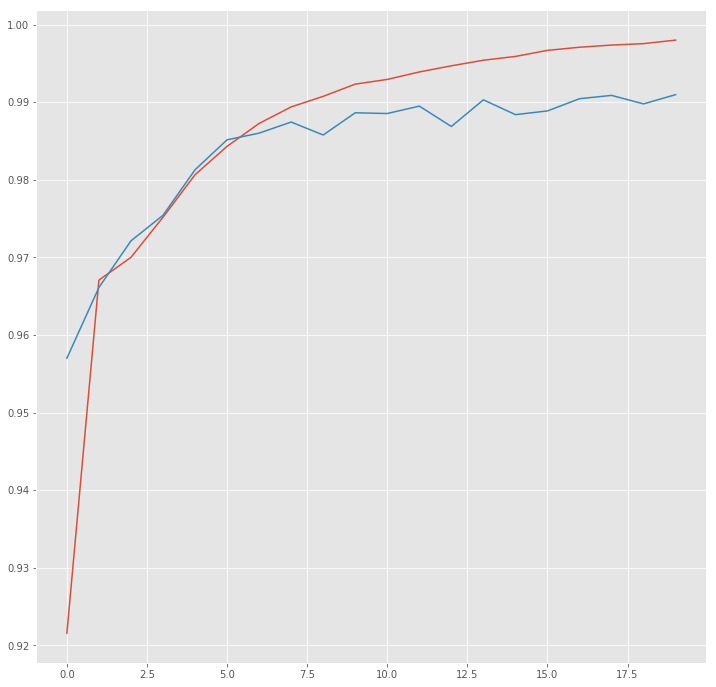

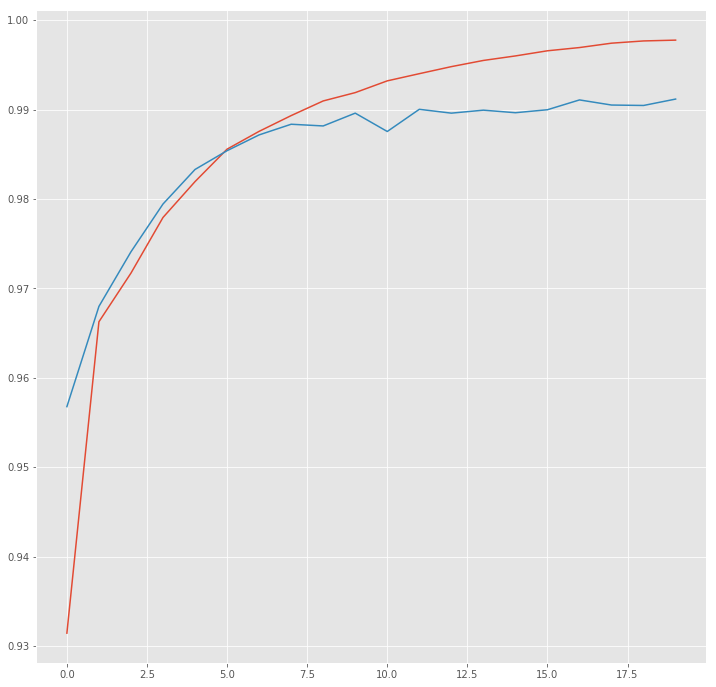

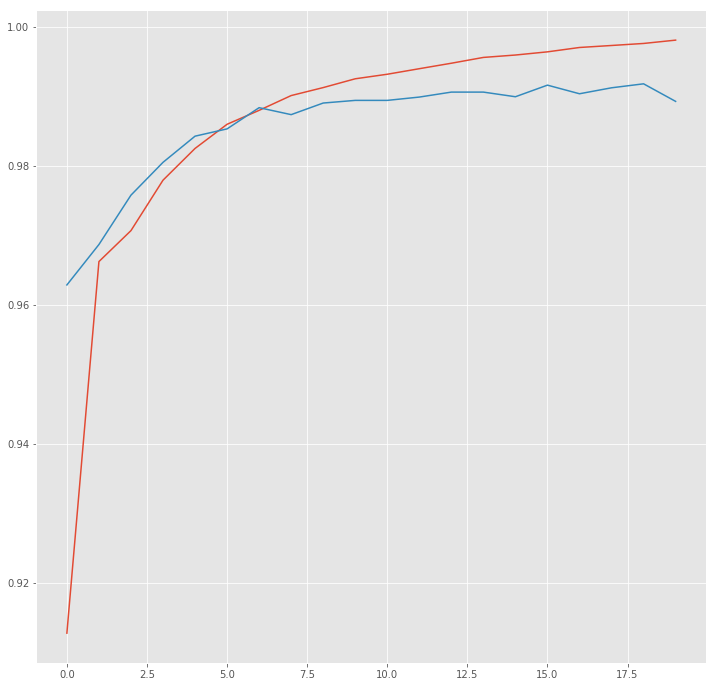

In [157]:
plot_histories_crf(histories)

In [158]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [88]:
x[x.sent.isin(x[x.orig_form=='קבוצת'].sent.values[6:14])]

sent  WORD  orig_form         POS_CONC          NER corpus_form  \
46922  2594     1  הפלשתינים           DEF|JJ  I_MISC__AFF   הפלשתינים   
46923  2594     2       טענו               VB            O        טענו   
46924  2594     3       היום               RB            O        היום   
46925  2594     4          ,             yyCM            O           ,   
46926  2594     5         כי               CC            O          כי   
46927  2594     6      קבוצת              NNT            O       קבוצת   
46928  2594     7    מתישבים               BN            O     מתישבים   
46929  2594     8       סגרה               VB            O        סגרה   
46930  2594     9         את               AT            O          את   
46931  2594    10      הכביש           DEF|NN            O       הכביש   
46932  2594    11     המוביל           DEF|NN            O      המוביל   
46933  2594    12     לעיירה               VB            O      לעיירה   
46934  2594    13     באניזד  PREPOSITION|NNP        I_LOC      באניזד   
46935  2594    14       בנפת  PREPOSITION|NNT            O        בנפת   
46936  2594    15     רמאללה              NNP        I_LOC      רמאללה   
46937  2594    16          .            yyDOT            O           .   
58044  3229     1      קבוצת              NNT        I_ORG       קבוצת   
58045  3229     2    עזריאלי              NNP        I_ORG     עזריאלי   
58046  3229     3     הודיעה               VB            O      הודיעה   
58047  3229     4          (            yyLRB            O           (   
58048  3229     5          א              NNP       I_DATE           א   
58049  3229     6          '              NNP       I_DATE           '   
58050  3229     7          ,             yyCM            O           ,   
58051  3229     8    15.5.05              NCD       I_DATE     15.5.05   
58052  3229     9          )            yyRRB            O           )   
58053  3229    10         כי               CC            O          כי   
58054  3229    11    בכוונתה   PREPOSITION|NN            O     בכוונתה   
58055  3229    12      לגייס               VB            O       לגייס   
58056  3229    13     בישראל  PREPOSITION|NNP        I_LOC      בישראל   
58057  3229    14        500               CD      I_MONEY         500   
...     ...   ...        ...              ...          ...         ...   
58291  3240    16       מניב               BN            O        מניב   
58292  3240    17          .            yyDOT            O           .   
60473  3336     1      קבוצת              NNT            O       קבוצת   
60474  3336     2          "           yyQUOT            O           "   
60475  3336     3     אייפקס              NNP        I_ORG      אייפקס   
60476  3336     4          -           yyDASH        I_ORG           -   
60477  3336     5        סבן               VB        I_ORG         סבן   
60478  3336     6          -           yyDASH        I_ORG           -   
60479  3336     7      ארקין              NNP        I_ORG       ארקין   
60480  3336     8          "           yyQUOT            O           "   
60481  3336     9          ,             yyCM            O           ,   
60482  3336    10      שקנתה           REL|VB            O       שקנתה   
60483  3336    11      אתמול               RB            O       אתמול   
60484  3336    12         את               AT            O          את   
60485  3336    13      גרעין               NN            O       גרעין   
60486  3336    14     השליטה               VB            O      השליטה   
60487  3336    15          ב              NNP            O           ב   
60488  3336    16          "           yyQUOT            O           "   
60489  3336    17        בזק  PREPOSITION|NNP        I_ORG         בזק   
60490  3336    18          "           yyQUOT            O           "   
60491  3336    19          ,             yyCM            O           ,   
60492  3336    20      הגיעה               VB            O       הגיעה   
60493  3336

In [159]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [160]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1266 phrases; correct: 983.
accuracy:  81.93%; (non-O)
accuracy:  96.81%; precision:  77.65%; recall:  76.68%; FB1:  77.16
             DATE: precision:  75.24%; recall:  77.45%; FB1:  76.33  105
              LOC: precision:  81.40%; recall:  78.64%; FB1:  80.00  285
        MISC--AFF: precision:  88.44%; recall:  91.62%; FB1:  90.00  173
        MISC--ENT: precision:  33.33%; recall:  42.86%; FB1:  37.50  18
       MISC-EVENT: precision:  55.56%; recall:  55.56%; FB1:  55.56  9
            MONEY: precision:  87.76%; recall:  91.49%; FB1:  89.58  49
              ORG: precision:  67.08%; recall:  63.39%; FB1:  65.18  240
          PERCENT: precision:  78.69%; recall:  88.89%; FB1:  83.48  61
             PERS: precision:  79.19%; recall:  77.51%; FB1:  78.34  322
             TIME: precision:  25.00%; recall:   9.09%; FB1:  13.33  4
processed 15256 tokens with 1282 phrases; found: 1360 phrases; correct: 1003.
accuracy:  82.01%; (non-O)


In [161]:
new_hist = []
for (word_split, char_split), model in zip(zip(splits,splits_char), models):
    X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
    X_char_tr, X_char_te, _, _ = char_split
    history = model.fit([X_tr, np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))], np.array(y_tr), batch_size=32, epochs=5, validation_split=0.1, verbose=1)
    hist = pd.DataFrame(history.history)
    new_hist.append(hist)


Train on 2349 samples, validate on 262 samples
Epoch 1/5
2349/2349 [==============================] - ETA: 6:35 - loss: -0.0131 - crf_accuracy: 0.996 - ETA: 6:24 - loss: -0.0160 - crf_accuracy: 0.997 - ETA: 6:20 - loss: -0.0156 - crf_accuracy: 0.998 - ETA: 6:13 - loss: -0.0168 - crf_accuracy: 0.998 - ETA: 6:07 - loss: -0.0172 - crf_accuracy: 0.998 - ETA: 6:02 - loss: -0.0175 - crf_accuracy: 0.998 - ETA: 5:55 - loss: -0.0178 - crf_accuracy: 0.998 - ETA: 5:48 - loss: -0.0181 - crf_accuracy: 0.998 - ETA: 5:42 - loss: -0.0182 - crf_accuracy: 0.998 - ETA: 5:36 - loss: -0.0186 - crf_accuracy: 0.998 - ETA: 5:30 - loss: -0.0185 - crf_accuracy: 0.998 - ETA: 5:25 - loss: -0.0183 - crf_accuracy: 0.998 - ETA: 5:19 - loss: -0.0185 - crf_accuracy: 0.998 - ETA: 5:13 - loss: -0.0183 - crf_accuracy: 0.998 - ETA: 5:07 - loss: -0.0182 - crf_accuracy: 0.998 - ETA: 5:02 - loss: -0.0182 - crf_accuracy: 0.998 - ETA: 4:56 - loss: -0.0183 - crf_accuracy: 0.998 - ETA: 4:51 - loss: -0.0183 - crf_accuracy: 0.998 

2349/2349 [==============================] - ETA: 6:29 - loss: -0.0234 - crf_accuracy: 0.999 - ETA: 6:38 - loss: -0.0187 - crf_accuracy: 0.999 - ETA: 6:40 - loss: -0.0193 - crf_accuracy: 0.998 - ETA: 6:35 - loss: -0.0195 - crf_accuracy: 0.998 - ETA: 6:33 - loss: -0.0200 - crf_accuracy: 0.999 - ETA: 6:23 - loss: -0.0201 - crf_accuracy: 0.999 - ETA: 6:18 - loss: -0.0205 - crf_accuracy: 0.999 - ETA: 6:11 - loss: -0.0206 - crf_accuracy: 0.999 - ETA: 6:05 - loss: -0.0207 - crf_accuracy: 0.999 - ETA: 5:59 - loss: -0.0208 - crf_accuracy: 0.999 - ETA: 5:54 - loss: -0.0207 - crf_accuracy: 0.999 - ETA: 5:48 - loss: -0.0207 - crf_accuracy: 0.999 - ETA: 5:47 - loss: -0.0206 - crf_accuracy: 0.999 - ETA: 5:41 - loss: -0.0206 - crf_accuracy: 0.998 - ETA: 5:35 - loss: -0.0208 - crf_accuracy: 0.999 - ETA: 5:30 - loss: -0.0206 - crf_accuracy: 0.998 - ETA: 5:24 - loss: -0.0207 - crf_accuracy: 0.998 - ETA: 5:19 - loss: -0.0207 - crf_accuracy: 0.998 - ETA: 5:14 - loss: -0.0208 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 6:44 - loss: -0.0224 - crf_accuracy: 0.998 - ETA: 6:41 - loss: -0.0234 - crf_accuracy: 0.998 - ETA: 6:31 - loss: -0.0214 - crf_accuracy: 0.998 - ETA: 6:28 - loss: -0.0222 - crf_accuracy: 0.998 - ETA: 6:23 - loss: -0.0222 - crf_accuracy: 0.998 - ETA: 6:16 - loss: -0.0225 - crf_accuracy: 0.998 - ETA: 6:09 - loss: -0.0226 - crf_accuracy: 0.998 - ETA: 6:04 - loss: -0.0225 - crf_accuracy: 0.998 - ETA: 5:57 - loss: -0.0220 - crf_accuracy: 0.998 - ETA: 5:51 - loss: -0.0218 - crf_accuracy: 0.998 - ETA: 5:45 - loss: -0.0221 - crf_accuracy: 0.998 - ETA: 5:39 - loss: -0.0223 - crf_accuracy: 0.998 - ETA: 5:34 - loss: -0.0223 - crf_accuracy: 0.998 - ETA: 5:29 - loss: -0.0226 - crf_accuracy: 0.998 - ETA: 5:23 - loss: -0.0226 - crf_accuracy: 0.998 - ETA: 5:18 - loss: -0.0224 - crf_accuracy: 0.998 - ETA: 5:13 - loss: -0.0224 - crf_accuracy: 0.998 - ETA: 5:07 - loss: -0.0224 - crf_accuracy: 0.998 - ETA: 5:03 - loss: -0.0226 - crf_accuracy: 0.998 - ETA: 

2349/2349 [==============================] - ETA: 11:07 - loss: -0.0121 - crf_accuracy: 0.99 - ETA: 11:27 - loss: -0.0106 - crf_accuracy: 0.99 - ETA: 10:52 - loss: -0.0106 - crf_accuracy: 0.99 - ETA: 10:31 - loss: -0.0094 - crf_accuracy: 0.99 - ETA: 10:27 - loss: -0.0100 - crf_accuracy: 0.99 - ETA: 10:15 - loss: -0.0099 - crf_accuracy: 0.99 - ETA: 10:26 - loss: -0.0100 - crf_accuracy: 0.99 - ETA: 10:14 - loss: -0.0098 - crf_accuracy: 0.99 - ETA: 10:02 - loss: -0.0092 - crf_accuracy: 0.99 - ETA: 9:51 - loss: -0.0089 - crf_accuracy: 0.9980 - ETA: 9:33 - loss: -0.0091 - crf_accuracy: 0.998 - ETA: 9:19 - loss: -0.0092 - crf_accuracy: 0.998 - ETA: 9:02 - loss: -0.0093 - crf_accuracy: 0.998 - ETA: 8:49 - loss: -0.0093 - crf_accuracy: 0.998 - ETA: 8:37 - loss: -0.0094 - crf_accuracy: 0.998 - ETA: 8:25 - loss: -0.0095 - crf_accuracy: 0.998 - ETA: 8:13 - loss: -0.0096 - crf_accuracy: 0.998 - ETA: 8:02 - loss: -0.0096 - crf_accuracy: 0.998 - ETA: 7:51 - loss: -0.0095 - crf_accuracy: 0.998 - ETA:

2349/2349 [==============================] - ETA: 10:39 - loss: -0.0117 - crf_accuracy: 0.99 - ETA: 11:31 - loss: -0.0128 - crf_accuracy: 0.99 - ETA: 11:26 - loss: -0.0127 - crf_accuracy: 0.99 - ETA: 11:03 - loss: -0.0109 - crf_accuracy: 0.99 - ETA: 10:50 - loss: -0.0106 - crf_accuracy: 0.99 - ETA: 10:52 - loss: -0.0108 - crf_accuracy: 0.99 - ETA: 10:49 - loss: -0.0108 - crf_accuracy: 0.99 - ETA: 10:33 - loss: -0.0108 - crf_accuracy: 0.99 - ETA: 10:12 - loss: -0.0108 - crf_accuracy: 0.99 - ETA: 9:53 - loss: -0.0110 - crf_accuracy: 0.9982 - ETA: 9:35 - loss: -0.0114 - crf_accuracy: 0.998 - ETA: 9:22 - loss: -0.0116 - crf_accuracy: 0.998 - ETA: 9:08 - loss: -0.0116 - crf_accuracy: 0.998 - ETA: 8:54 - loss: -0.0118 - crf_accuracy: 0.998 - ETA: 8:41 - loss: -0.0120 - crf_accuracy: 0.998 - ETA: 8:33 - loss: -0.0121 - crf_accuracy: 0.998 - ETA: 8:23 - loss: -0.0122 - crf_accuracy: 0.998 - ETA: 8:13 - loss: -0.0123 - crf_accuracy: 0.998 - ETA: 8:15 - loss: -0.0124 - crf_accuracy: 0.998 - ETA:

2349/2349 [==============================] - ETA: 11:11 - loss: -0.0126 - crf_accuracy: 0.99 - ETA: 10:53 - loss: -0.0108 - crf_accuracy: 0.99 - ETA: 10:43 - loss: -0.0128 - crf_accuracy: 0.99 - ETA: 10:38 - loss: -0.0121 - crf_accuracy: 0.99 - ETA: 10:49 - loss: -0.0117 - crf_accuracy: 0.99 - ETA: 10:53 - loss: -0.0126 - crf_accuracy: 0.99 - ETA: 10:41 - loss: -0.0130 - crf_accuracy: 0.99 - ETA: 10:26 - loss: -0.0135 - crf_accuracy: 0.99 - ETA: 10:15 - loss: -0.0140 - crf_accuracy: 0.99 - ETA: 10:04 - loss: -0.0141 - crf_accuracy: 0.99 - ETA: 9:54 - loss: -0.0143 - crf_accuracy: 0.9980 - ETA: 9:48 - loss: -0.0146 - crf_accuracy: 0.998 - ETA: 9:45 - loss: -0.0148 - crf_accuracy: 0.998 - ETA: 9:34 - loss: -0.0148 - crf_accuracy: 0.998 - ETA: 9:25 - loss: -0.0150 - crf_accuracy: 0.998 - ETA: 9:11 - loss: -0.0149 - crf_accuracy: 0.998 - ETA: 8:56 - loss: -0.0148 - crf_accuracy: 0.998 - ETA: 8:42 - loss: -0.0146 - crf_accuracy: 0.998 - ETA: 8:22 - loss: -0.0145 - crf_accuracy: 0.998 - ETA:

2349/2349 [==============================] - ETA: 6:36 - loss: -0.0182 - crf_accuracy: 0.998 - ETA: 6:39 - loss: -0.0182 - crf_accuracy: 0.998 - ETA: 6:41 - loss: -0.0181 - crf_accuracy: 0.999 - ETA: 6:42 - loss: -0.0186 - crf_accuracy: 0.999 - ETA: 6:39 - loss: -0.0190 - crf_accuracy: 0.999 - ETA: 6:33 - loss: -0.0191 - crf_accuracy: 0.999 - ETA: 6:25 - loss: -0.0191 - crf_accuracy: 0.999 - ETA: 6:20 - loss: -0.0181 - crf_accuracy: 0.998 - ETA: 6:15 - loss: -0.0176 - crf_accuracy: 0.998 - ETA: 6:10 - loss: -0.0175 - crf_accuracy: 0.998 - ETA: 6:06 - loss: -0.0176 - crf_accuracy: 0.998 - ETA: 6:00 - loss: -0.0177 - crf_accuracy: 0.998 - ETA: 5:56 - loss: -0.0177 - crf_accuracy: 0.998 - ETA: 5:51 - loss: -0.0177 - crf_accuracy: 0.998 - ETA: 5:45 - loss: -0.0179 - crf_accuracy: 0.998 - ETA: 5:43 - loss: -0.0179 - crf_accuracy: 0.998 - ETA: 5:36 - loss: -0.0181 - crf_accuracy: 0.998 - ETA: 5:31 - loss: -0.0181 - crf_accuracy: 0.998 - ETA: 5:26 - loss: -0.0180 - crf_accuracy: 0.998 - ETA: 

2349/2349 [==============================] - ETA: 7:07 - loss: -0.0144 - crf_accuracy: 0.996 - ETA: 6:40 - loss: -0.0174 - crf_accuracy: 0.997 - ETA: 6:35 - loss: -0.0181 - crf_accuracy: 0.997 - ETA: 6:46 - loss: -0.0193 - crf_accuracy: 0.998 - ETA: 6:49 - loss: -0.0192 - crf_accuracy: 0.998 - ETA: 6:45 - loss: -0.0188 - crf_accuracy: 0.998 - ETA: 6:39 - loss: -0.0191 - crf_accuracy: 0.998 - ETA: 6:36 - loss: -0.0194 - crf_accuracy: 0.998 - ETA: 6:25 - loss: -0.0190 - crf_accuracy: 0.998 - ETA: 6:15 - loss: -0.0187 - crf_accuracy: 0.998 - ETA: 6:05 - loss: -0.0190 - crf_accuracy: 0.998 - ETA: 5:57 - loss: -0.0192 - crf_accuracy: 0.998 - ETA: 5:48 - loss: -0.0194 - crf_accuracy: 0.998 - ETA: 5:43 - loss: -0.0194 - crf_accuracy: 0.998 - ETA: 5:36 - loss: -0.0191 - crf_accuracy: 0.998 - ETA: 5:29 - loss: -0.0193 - crf_accuracy: 0.998 - ETA: 5:22 - loss: -0.0190 - crf_accuracy: 0.998 - ETA: 5:17 - loss: -0.0191 - crf_accuracy: 0.998 - ETA: 5:10 - loss: -0.0191 - crf_accuracy: 0.998 - ETA: 

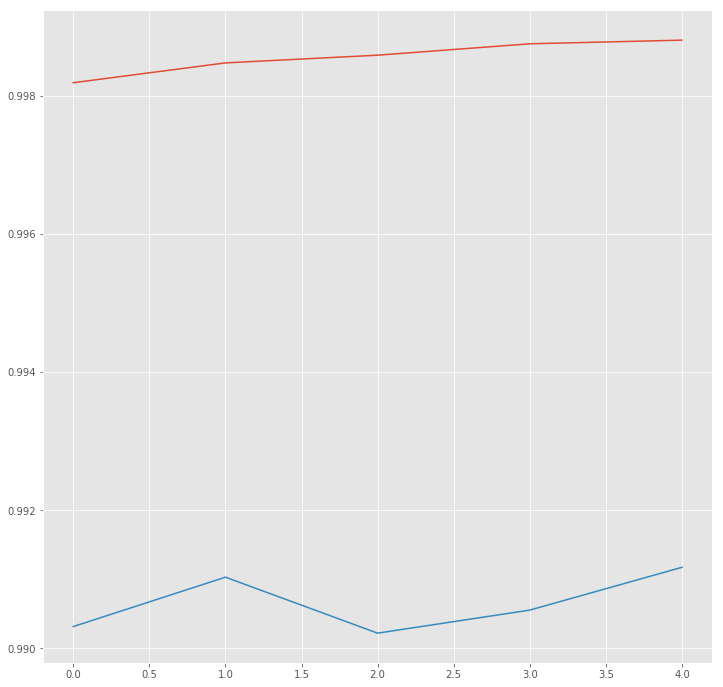

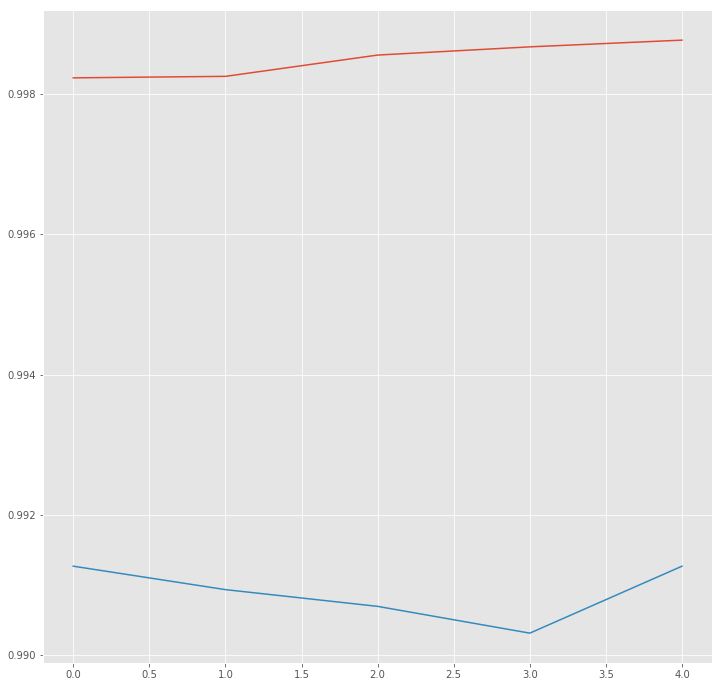

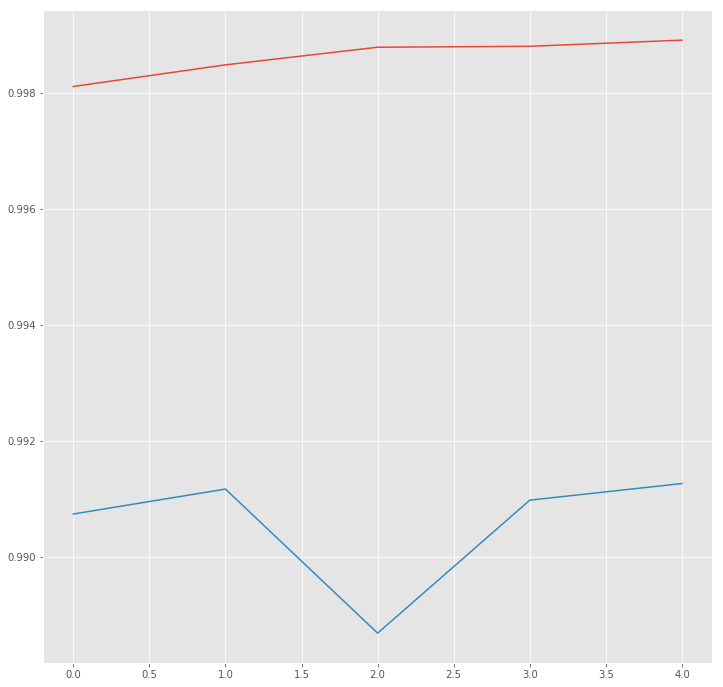

In [162]:
plot_histories_crf(new_hist)

In [163]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): O
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
של    

In [164]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [166]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1290 phrases; correct: 994.
accuracy:  82.39%; (non-O)
accuracy:  96.72%; precision:  77.05%; recall:  77.54%; FB1:  77.29
             DATE: precision:  74.76%; recall:  75.49%; FB1:  75.12  103
              LOC: precision:  78.48%; recall:  80.34%; FB1:  79.40  302
        MISC--AFF: precision:  90.80%; recall:  88.62%; FB1:  89.70  163
        MISC--ENT: precision:  46.67%; recall:  50.00%; FB1:  48.28  15
       MISC-EVENT: precision:  50.00%; recall:  55.56%; FB1:  52.63  10
            MONEY: precision:  90.00%; recall:  95.74%; FB1:  92.78  50
              ORG: precision:  65.98%; recall:  63.39%; FB1:  64.66  244
          PERCENT: precision:  84.21%; recall:  88.89%; FB1:  86.49  57
             PERS: precision:  77.58%; recall:  79.94%; FB1:  78.74  339
             TIME: precision:  42.86%; recall:  27.27%; FB1:  33.33  7
processed 15256 tokens with 1282 phrases; found: 1317 phrases; correct: 978.
accuracy:  81.34%; (non-O)


In [167]:
new_hist = []
for (word_split, char_split), model in zip(zip(splits,splits_char), models):
    X_tr, X_te, y_tr, y_te, pos_tr, pos_te, gazet_tr, gazet_te = word_split
    X_char_tr, X_char_te, _, _ = char_split
    history = model.fit([X_tr, np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))], np.array(y_tr), batch_size=32, epochs=5, validation_split=0.1, verbose=1)
    hist = pd.DataFrame(history.history)
    new_hist.append(hist)


Train on 2349 samples, validate on 262 samples
Epoch 1/5
2349/2349 [==============================] - ETA: 5:59 - loss: -0.0249 - crf_accuracy: 0.999 - ETA: 5:57 - loss: -0.0250 - crf_accuracy: 0.999 - ETA: 5:55 - loss: -0.0250 - crf_accuracy: 0.999 - ETA: 5:43 - loss: -0.0245 - crf_accuracy: 0.999 - ETA: 5:38 - loss: -0.0247 - crf_accuracy: 0.999 - ETA: 5:33 - loss: -0.0249 - crf_accuracy: 0.999 - ETA: 5:29 - loss: -0.0250 - crf_accuracy: 0.999 - ETA: 5:26 - loss: -0.0251 - crf_accuracy: 0.999 - ETA: 5:22 - loss: -0.0253 - crf_accuracy: 0.999 - ETA: 5:27 - loss: -0.0252 - crf_accuracy: 0.999 - ETA: 5:29 - loss: -0.0252 - crf_accuracy: 0.999 - ETA: 5:26 - loss: -0.0252 - crf_accuracy: 0.999 - ETA: 5:24 - loss: -0.0253 - crf_accuracy: 0.999 - ETA: 5:18 - loss: -0.0252 - crf_accuracy: 0.999 - ETA: 5:12 - loss: -0.0252 - crf_accuracy: 0.999 - ETA: 5:07 - loss: -0.0253 - crf_accuracy: 0.999 - ETA: 5:03 - loss: -0.0252 - crf_accuracy: 0.999 - ETA: 4:56 - loss: -0.0252 - crf_accuracy: 0.999 

2349/2349 [==============================] - ETA: 6:52 - loss: -0.0268 - crf_accuracy: 0.998 - ETA: 7:11 - loss: -0.0277 - crf_accuracy: 0.999 - ETA: 6:42 - loss: -0.0274 - crf_accuracy: 0.999 - ETA: 6:23 - loss: -0.0278 - crf_accuracy: 0.999 - ETA: 6:12 - loss: -0.0266 - crf_accuracy: 0.998 - ETA: 6:02 - loss: -0.0260 - crf_accuracy: 0.998 - ETA: 5:54 - loss: -0.0263 - crf_accuracy: 0.998 - ETA: 5:46 - loss: -0.0262 - crf_accuracy: 0.998 - ETA: 5:38 - loss: -0.0264 - crf_accuracy: 0.998 - ETA: 5:31 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 5:24 - loss: -0.0268 - crf_accuracy: 0.999 - ETA: 5:19 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 5:13 - loss: -0.0268 - crf_accuracy: 0.999 - ETA: 5:07 - loss: -0.0269 - crf_accuracy: 0.999 - ETA: 5:01 - loss: -0.0268 - crf_accuracy: 0.999 - ETA: 4:55 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 4:49 - loss: -0.0268 - crf_accuracy: 0.999 - ETA: 4:43 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 4:39 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 6:02 - loss: -0.0297 - crf_accuracy: 0.999 - ETA: 5:59 - loss: -0.0296 - crf_accuracy: 0.999 - ETA: 5:54 - loss: -0.0296 - crf_accuracy: 0.999 - ETA: 5:49 - loss: -0.0299 - crf_accuracy: 0.999 - ETA: 5:45 - loss: -0.0297 - crf_accuracy: 0.999 - ETA: 5:38 - loss: -0.0298 - crf_accuracy: 0.999 - ETA: 5:33 - loss: -0.0299 - crf_accuracy: 0.999 - ETA: 5:27 - loss: -0.0300 - crf_accuracy: 0.999 - ETA: 5:24 - loss: -0.0301 - crf_accuracy: 0.999 - ETA: 5:19 - loss: -0.0302 - crf_accuracy: 0.999 - ETA: 5:14 - loss: -0.0300 - crf_accuracy: 0.999 - ETA: 5:09 - loss: -0.0300 - crf_accuracy: 0.999 - ETA: 5:04 - loss: -0.0300 - crf_accuracy: 0.999 - ETA: 4:59 - loss: -0.0301 - crf_accuracy: 0.999 - ETA: 4:54 - loss: -0.0301 - crf_accuracy: 0.999 - ETA: 4:48 - loss: -0.0301 - crf_accuracy: 0.999 - ETA: 4:43 - loss: -0.0301 - crf_accuracy: 0.999 - ETA: 4:38 - loss: -0.0301 - crf_accuracy: 0.999 - ETA: 4:33 - loss: -0.0302 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 5:58 - loss: -0.0137 - crf_accuracy: 0.997 - ETA: 5:53 - loss: -0.0153 - crf_accuracy: 0.998 - ETA: 5:48 - loss: -0.0151 - crf_accuracy: 0.998 - ETA: 5:44 - loss: -0.0159 - crf_accuracy: 0.999 - ETA: 5:39 - loss: -0.0163 - crf_accuracy: 0.999 - ETA: 5:34 - loss: -0.0165 - crf_accuracy: 0.999 - ETA: 5:28 - loss: -0.0167 - crf_accuracy: 0.999 - ETA: 5:23 - loss: -0.0167 - crf_accuracy: 0.999 - ETA: 5:17 - loss: -0.0166 - crf_accuracy: 0.999 - ETA: 5:12 - loss: -0.0166 - crf_accuracy: 0.999 - ETA: 5:08 - loss: -0.0163 - crf_accuracy: 0.999 - ETA: 5:03 - loss: -0.0162 - crf_accuracy: 0.999 - ETA: 4:58 - loss: -0.0162 - crf_accuracy: 0.999 - ETA: 4:53 - loss: -0.0163 - crf_accuracy: 0.999 - ETA: 4:47 - loss: -0.0163 - crf_accuracy: 0.999 - ETA: 4:42 - loss: -0.0164 - crf_accuracy: 0.999 - ETA: 4:38 - loss: -0.0163 - crf_accuracy: 0.999 - ETA: 4:34 - loss: -0.0160 - crf_accuracy: 0.999 - ETA: 4:29 - loss: -0.0159 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 5:59 - loss: -0.0156 - crf_accuracy: 0.998 - ETA: 5:52 - loss: -0.0169 - crf_accuracy: 0.998 - ETA: 5:45 - loss: -0.0165 - crf_accuracy: 0.998 - ETA: 5:40 - loss: -0.0172 - crf_accuracy: 0.998 - ETA: 5:34 - loss: -0.0171 - crf_accuracy: 0.998 - ETA: 5:29 - loss: -0.0176 - crf_accuracy: 0.999 - ETA: 5:24 - loss: -0.0180 - crf_accuracy: 0.999 - ETA: 5:19 - loss: -0.0180 - crf_accuracy: 0.999 - ETA: 5:14 - loss: -0.0180 - crf_accuracy: 0.999 - ETA: 5:08 - loss: -0.0182 - crf_accuracy: 0.999 - ETA: 5:03 - loss: -0.0183 - crf_accuracy: 0.999 - ETA: 4:58 - loss: -0.0184 - crf_accuracy: 0.999 - ETA: 4:53 - loss: -0.0185 - crf_accuracy: 0.999 - ETA: 4:48 - loss: -0.0182 - crf_accuracy: 0.999 - ETA: 4:43 - loss: -0.0182 - crf_accuracy: 0.999 - ETA: 4:38 - loss: -0.0182 - crf_accuracy: 0.999 - ETA: 4:34 - loss: -0.0184 - crf_accuracy: 0.999 - ETA: 4:29 - loss: -0.0184 - crf_accuracy: 0.999 - ETA: 4:24 - loss: -0.0185 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 6:06 - loss: -0.0228 - crf_accuracy: 1.000 - ETA: 5:58 - loss: -0.0221 - crf_accuracy: 0.999 - ETA: 5:52 - loss: -0.0223 - crf_accuracy: 0.999 - ETA: 5:45 - loss: -0.0210 - crf_accuracy: 0.999 - ETA: 5:41 - loss: -0.0210 - crf_accuracy: 0.999 - ETA: 5:36 - loss: -0.0213 - crf_accuracy: 0.999 - ETA: 5:31 - loss: -0.0215 - crf_accuracy: 0.999 - ETA: 5:26 - loss: -0.0213 - crf_accuracy: 0.999 - ETA: 5:22 - loss: -0.0214 - crf_accuracy: 0.999 - ETA: 5:17 - loss: -0.0212 - crf_accuracy: 0.999 - ETA: 5:11 - loss: -0.0213 - crf_accuracy: 0.999 - ETA: 5:06 - loss: -0.0214 - crf_accuracy: 0.999 - ETA: 5:01 - loss: -0.0214 - crf_accuracy: 0.999 - ETA: 4:56 - loss: -0.0214 - crf_accuracy: 0.999 - ETA: 4:51 - loss: -0.0207 - crf_accuracy: 0.998 - ETA: 4:46 - loss: -0.0208 - crf_accuracy: 0.998 - ETA: 4:40 - loss: -0.0208 - crf_accuracy: 0.998 - ETA: 4:36 - loss: -0.0209 - crf_accuracy: 0.998 - ETA: 4:32 - loss: -0.0210 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 6:08 - loss: -0.0210 - crf_accuracy: 0.997 - ETA: 5:55 - loss: -0.0231 - crf_accuracy: 0.998 - ETA: 5:52 - loss: -0.0216 - crf_accuracy: 0.998 - ETA: 5:48 - loss: -0.0225 - crf_accuracy: 0.998 - ETA: 5:44 - loss: -0.0231 - crf_accuracy: 0.998 - ETA: 5:40 - loss: -0.0232 - crf_accuracy: 0.998 - ETA: 5:35 - loss: -0.0234 - crf_accuracy: 0.998 - ETA: 5:30 - loss: -0.0237 - crf_accuracy: 0.999 - ETA: 5:24 - loss: -0.0237 - crf_accuracy: 0.999 - ETA: 5:19 - loss: -0.0235 - crf_accuracy: 0.999 - ETA: 5:13 - loss: -0.0236 - crf_accuracy: 0.999 - ETA: 5:08 - loss: -0.0237 - crf_accuracy: 0.999 - ETA: 5:02 - loss: -0.0239 - crf_accuracy: 0.999 - ETA: 4:57 - loss: -0.0239 - crf_accuracy: 0.999 - ETA: 4:52 - loss: -0.0240 - crf_accuracy: 0.999 - ETA: 4:47 - loss: -0.0239 - crf_accuracy: 0.999 - ETA: 4:42 - loss: -0.0237 - crf_accuracy: 0.999 - ETA: 4:38 - loss: -0.0237 - crf_accuracy: 0.999 - ETA: 4:33 - loss: -0.0238 - crf_accuracy: 0.999 - ETA: 

2349/2349 [==============================] - ETA: 5:55 - loss: -0.0259 - crf_accuracy: 0.998 - ETA: 5:53 - loss: -0.0266 - crf_accuracy: 0.999 - ETA: 5:48 - loss: -0.0264 - crf_accuracy: 0.999 - ETA: 5:43 - loss: -0.0264 - crf_accuracy: 0.999 - ETA: 5:38 - loss: -0.0262 - crf_accuracy: 0.999 - ETA: 5:33 - loss: -0.0265 - crf_accuracy: 0.999 - ETA: 5:27 - loss: -0.0266 - crf_accuracy: 0.999 - ETA: 5:22 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 5:17 - loss: -0.0266 - crf_accuracy: 0.999 - ETA: 5:12 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 5:08 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 5:03 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 5:00 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 4:55 - loss: -0.0267 - crf_accuracy: 0.999 - ETA: 4:51 - loss: -0.0265 - crf_accuracy: 0.999 - ETA: 4:46 - loss: -0.0266 - crf_accuracy: 0.999 - ETA: 4:41 - loss: -0.0265 - crf_accuracy: 0.999 - ETA: 4:36 - loss: -0.0265 - crf_accuracy: 0.999 - ETA: 4:31 - loss: -0.0265 - crf_accuracy: 0.999 - ETA: 

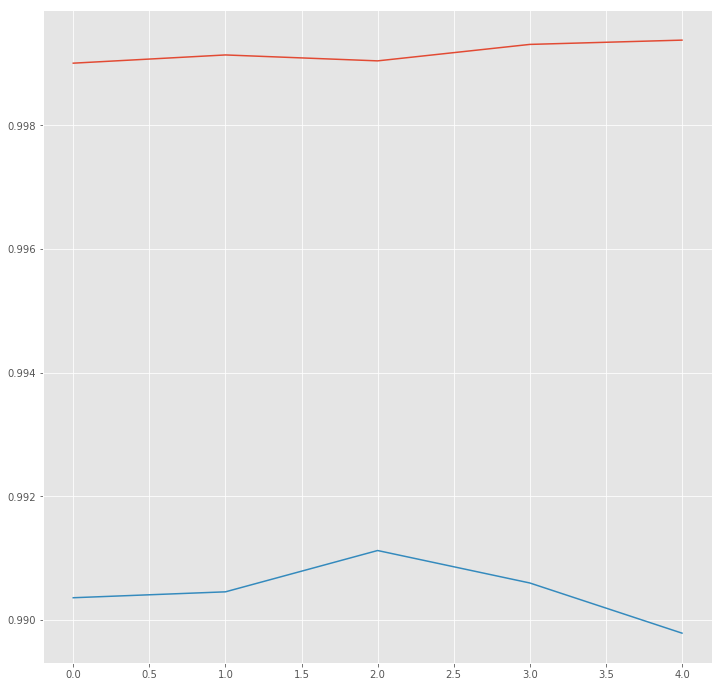

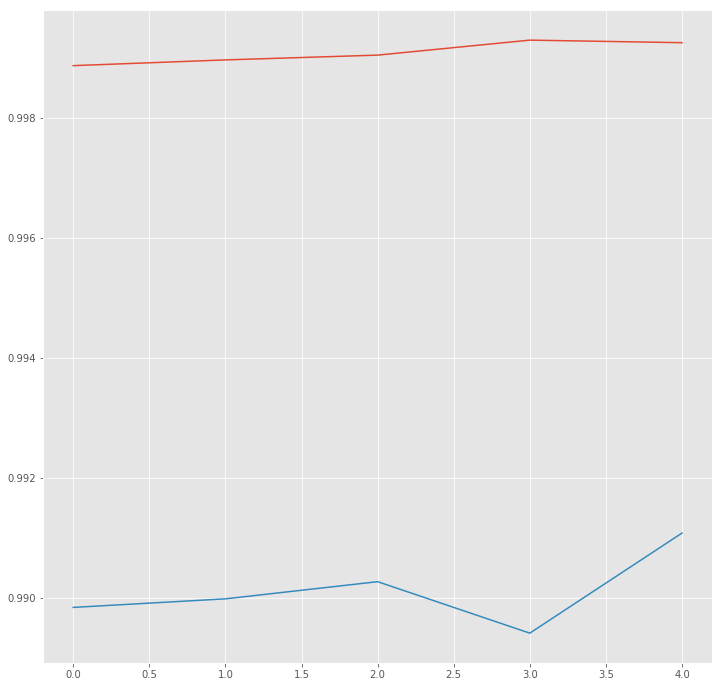

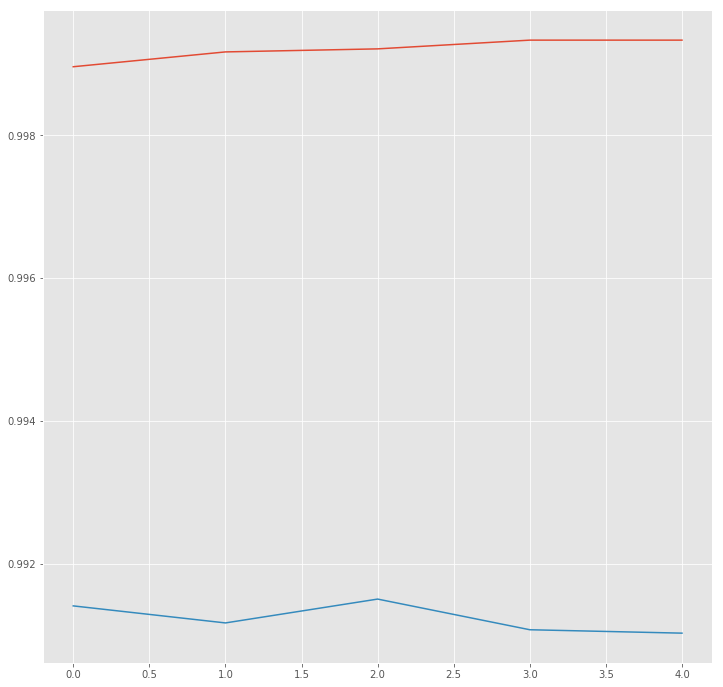

In [168]:
plot_histories_crf(new_hist)

In [169]:
predict_test_sentence(zip(splits, splits_char), models, words, 33, use_pos=False, use_gazet=False, use_char=True)

Word            (True ): Pred
הדולר           (I_MONEY): I_MONEY
של              (O    ): O
פרס             (O    ): I_PERS
נובל            (O    ): O
לשלום           (O    ): O
,               (O    ): O
שהוא            (O    ): O
אולי            (O    ): O
הפרס            (O    ): O
הבעייתי         (O    ): O
מכל             (O    ): O
הפרסים          (O    ): O
שהורה           (O    ): O
ממציא           (O    ): O
הדינמיט         (O    ): O
להעניק          (O    ): O
מתוך            (O    ): O
קרן             (O    ): O
על              (O    ): O
שמו             (O    ): O
?               (O    ): O
Word            (True ): Pred
לדברי           (O    ): O
קבוצת           (I_ORG): O
עזריאלי         (I_ORG): I_ORG
הגיוס           (O    ): I_ORG
נועד            (O    ): O
לגוון           (O    ): O
את              (O    ): O
מקורות          (O    ): O
המימון          (O    ): O
ולהגדיל         (O    ): O
את              (O    ): O
ההון            (O    ): O
הזמין           (O    ): O
ש

In [170]:
all_cat_preds, all_cat_y_te, all_words_flat = predict_on_splits(zip(splits, splits_char), models, words, use_pos=False, use_gazet=False, use_char=True)

In [171]:
all_cat_preds = [replace_pad_with_o(ll) for ll in all_cat_preds]

for cat_y_te, cat_preds in zip(all_cat_y_te, all_cat_preds):
    evaluate(cat_y_te, cat_preds)

processed 15603 tokens with 1282 phrases; found: 1434 phrases; correct: 1019.
accuracy:  85.12%; (non-O)
accuracy:  96.24%; precision:  71.06%; recall:  79.49%; FB1:  75.04
             DATE: precision:  74.29%; recall:  76.47%; FB1:  75.36  105
              LOC: precision:  75.00%; recall:  83.39%; FB1:  78.97  328
        MISC--AFF: precision:  82.72%; recall:  94.61%; FB1:  88.27  191
        MISC--ENT: precision:  31.03%; recall:  64.29%; FB1:  41.86  29
       MISC-EVENT: precision:  54.55%; recall:  66.67%; FB1:  60.00  11
            MONEY: precision:  82.00%; recall:  87.23%; FB1:  84.54  50
              ORG: precision:  61.85%; recall:  65.75%; FB1:  63.74  270
          PERCENT: precision:  74.19%; recall:  85.19%; FB1:  79.31  62
             PERS: precision:  69.37%; recall:  80.55%; FB1:  74.54  382
             TIME: precision:  50.00%; recall:  27.27%; FB1:  35.29  6
processed 15256 tokens with 1282 phrases; found: 1383 phrases; correct: 995.
accuracy:  83.25%; (non-O)

## BERT

In [23]:
import torch
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertForTokenClassification, BertAdam

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [24]:
MAX_LEN = max_len
bs = 32

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [26]:
device

device(type='cpu')

In [27]:
sentences = [" ".join([s[0] for s in sent]) for sent in sents]

In [28]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

In [32]:
sentences[0]

'נראה שאביטל אברג\'יל ( לשעבר אוז ) , אוהבת לא רק לשחק אצל דן תורג\'מן ( בסרט " משהו מתוק " ) , אלא גם איתו .'

In [29]:
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print(tokenized_texts[0])

['נראה', 'ש', '##אב', '##יט', '##ל', 'א', '##בר', '##ג', "'", 'י', '##ל', '(', 'לשעבר', 'או', '##ז', ')', ',', 'או', '##ה', '##בת', 'לא', 'רק', 'לשחק', 'אצל', 'דן', 'ת', '##ורג', "'", 'מן', '(', 'בסרט', '"', 'משה', '##ו', 'מת', '##וק', '"', ')', ',', 'אלא', 'גם', 'אי', '##תו', '.']


In [34]:
tokenizer.tokenize("Colorless green ideas dream splendidly")

['color', '##less', 'green', 'ideas', 'dream', 'sp', '##lendi', '##dly']

In [30]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [31]:
labels = [[s[2] for s in sent] for sent in sents]
print(labels[0])

['O', 'I_PERS', 'I_PERS', 'O', 'O', 'I_PERS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I_PERS', 'I_PERS', 'O', 'O', 'O', 'I_MISC__ENT', 'I_MISC__ENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [32]:
tags_vals = list(set(x["NER"].values))
tag2idx = {t: i for i, t in enumerate(tags_vals)}

In [33]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["O"], padding="post",
                     dtype="long", truncating="post")

In [34]:
attention_masks = [[float(i>0) for i in ii] for ii in input_ids]

In [35]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags, 
                                                            random_state=42, test_size=0.25)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=42, test_size=0.25)

In [36]:
tr_inputs = torch.tensor(tr_inputs, dtype=torch.long)
val_inputs = torch.tensor(val_inputs, dtype=torch.long)
tr_tags = torch.tensor(tr_tags, dtype=torch.long)
val_tags = torch.tensor(val_tags, dtype=torch.long)
tr_masks = torch.tensor(tr_masks, dtype=torch.long)
val_masks = torch.tensor(val_masks, dtype=torch.long)

In [37]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [ ]:
model = BertForTokenClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(tag2idx))

In [39]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters()) 
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = Adam(optimizer_grouped_parameters, lr=3e-5)

In [40]:
from seqeval.metrics import f1_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [41]:
from tqdm import trange

In [45]:
epochs = 5
max_grad_norm = 1.0

for _ in trange(epochs, desc="Epoch"):
    # TRAIN loop
    model.train()
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # forward pass
        loss = model(b_input_ids, token_type_ids=None,
                     attention_mask=b_input_mask, labels=b_labels)
        # backward pass
        loss.backward()
        # track train loss
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        model.zero_grad()
    # print train loss per epoch
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    # VALIDATION on validation set
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        
        with torch.no_grad():
            tmp_eval_loss = model(b_input_ids, token_type_ids=None,
                                  attention_mask=b_input_mask, labels=b_labels)
            logits = model(b_input_ids, token_type_ids=None,
                           attention_mask=b_input_mask)
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.append(label_ids)
        
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        eval_loss += tmp_eval_loss.mean().item()
        eval_accuracy += tmp_eval_accuracy
        
        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1
    eval_loss = eval_loss/nb_eval_steps
    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
    pred_tags = [tags_vals[p_i].replace('_', '-') for p in predictions for p_i in p]
    valid_tags = [tags_vals[l_ii].replace('_', '-') for l in true_labels for l_i in l for l_ii in l_i]
    print("F1-Score: {}".format(f1_score(pred_tags, valid_tags)))


Epoch:   0%|                                                                                     | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [44]:
model.eval()
predictions = []
true_labels = []
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
for batch in valid_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        tmp_eval_loss = model(b_input_ids, token_type_ids=None,
                              attention_mask=b_input_mask, labels=b_labels)
        logits = model(b_input_ids, token_type_ids=None,
                       attention_mask=b_input_mask)
        
    logits = logits.detach().cpu().numpy()
    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    label_ids = b_labels.to('cpu').numpy()
    true_labels.append(label_ids)
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_loss += tmp_eval_loss.mean().item()
    eval_accuracy += tmp_eval_accuracy

    nb_eval_examples += b_input_ids.size(0)
    nb_eval_steps += 1

pred_tags = [[tags_vals[p_i].replace('_', '-') for p_i in p] for p in predictions]
valid_tags = [[tags_vals[l_ii].replace('_', '-') for l_ii in l_i] for l in true_labels for l_i in l ]
print("Validation loss: {}".format(eval_loss/nb_eval_steps))
print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))

Validation loss: 0.1202245040663651
Validation Accuracy: 0.9720603475765307
Validation F1-Score: 0


In [48]:
pred_tags

[['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'

## ELMo

## Flair

In [89]:
from flair.data import TaggedCorpus
from flair.data_fetcher import NLPTaskDataFetcher


ModuleNotFoundError: No module named 'flair'

In [ ]:

# define columns
columns = {0: 'text', 1: 'pos', 2: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = '/path/to/data/folder'

# retrieve corpus using column format, data folder and the names of the train, dev and test files
corpus: TaggedCorpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                              train_file='train.txt',
                                                              test_file='test.txt',
                                                              dev_file='dev.txt')